# Polystyrene Fits

This notebook will fit the pure, fully detuerated polystyrene control samples that were measured in both August and December SANS/USANS trips. We will utilize a Guinier-Porod fit, as defined in the SasView documentation at http://www.sasview.org/docs/user/models/guinier_porod.html.

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from bumps.names import *
from bumps.fitters import fit

import sasmodels

from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.data import load_data, plot_data, empty_data1D
from sasmodels.direct_model import DirectModel

import sys
# set the following path to the sasview source code if needed for your os
# sys.path.append(r'C:path\to\sasview\src')
import sas

Loading compiled, reduced USANS and SANS data generated in the `Smeared Data Reduction` Jupyter notebook.  

In [ ]:
data_dir = '../../data/sans/Smeared_Data_20200629'
files = [file for file in os.listdir(data_dir) if 'CMW' in file]

sans_data = {} # key will be sample key, value is [USANS data, SANS data]

for file in files:
    key = int(file.split('_')[0][3:])
    if key not in sans_data.keys():
        sans_data[key] = [None, None]
    if 'USANS' in file:
        data = load_data(data_dir + '/' + file)
        sans_data[key][0] = data
    elif 'SANS' in file:
        data = load_data(data_dir + '/' + file)
        sans_data[key][1] = data

Loading sample meta data.

In [3]:
# sample meta-data
sample_info = pd.read_csv('../../data/sans/Sample_Info.csv')

# helpful meta-data dictionaries
names = dict(zip(sample_info['Sample'], sample_info['Name']))
cps = dict(zip(sample_info['Sample'], sample_info['Conjugated Polymer']))
matrix = dict(zip(sample_info['Sample'], sample_info['Commodity Polymer']))
solvent_names = dict(zip(sample_info['Sample'], sample_info['Solvent']))

# target weight fraction of conjugated polymer
target = dict(zip(sample_info['Sample'], sample_info['Target Fraction']))


We will select only the deuterated polystyrene samples.

In [4]:
ps_keys = [key for key, value in target.items() if value == 0 and matrix[key] == 'Polystyrene-D8' and key in sans_data.keys()]
ps_keys


[21, 28, 35, 113, 114, 309, 310, 409, 506]

Initial fitting of the SANS data only (no USANS). Each sample will be fit individually with the Porod model (SasView power_law to enable flexible exponent values) to extract the scale, exponent and background value. Then all samples will be fit simultaneously with a fixed background to determine a common Porod exponent.

# steps: 3334, # draws: 100020
step 1 cost 12911.535(14)
                           21 background |.........  0.0699915 in (0,10)
                                21 power ........|.        3.8 in (2.5,4)
                                21 scale |......... 9.99062e-07 in (0,0.001)
step 34 cost 2.825(14)
step 69 cost 2.499(14)
step 103 cost 2.472(14)
step 138 cost 2.466(14)
step 173 cost 2.460(14)
step 209 cost 2.457(14)
step 244 cost 2.455(14)
step 279 cost 2.453(14)
step 314 cost 2.452(14)
step 350 cost 2.452(14)
step 385 cost 2.452(14)
step 421 cost 2.452(14)
step 455 cost 2.452(14)
step 491 cost 2.452(14)
step 523 cost 2.452(14)
step 558 cost 2.452(14)
step 593 cost 2.452(14)
step 630 cost 2.452(14)
step 665 cost 2.452(14)
step 702 cost 2.452(14)
step 738 cost 2.452(14)
step 774 cost 2.452(14)
step 807 cost 2.452(14)
step 843 cost 2.452(14)
step 877 cost 2.452(14)
step 913 cost 2.452(14)
step 949 cost 2.452(14)
step 986 cost 2.452(14)
step 1021 cost 2.452(14)
                        

# steps: 3334, # draws: 100020
step 1 cost 34794.861(14)
                           35 background |.........  0.0699951 in (0,10)
                                35 power ........|.        3.8 in (2.5,4)
                                35 scale |......... 9.99081e-07 in (0,0.001)
step 32 cost 11.579(14)
step 67 cost 3.138(14)
step 101 cost 3.138(14)
step 136 cost 3.138(14)
step 173 cost 3.138(14)
step 207 cost 3.062(14)
step 241 cost 3.062(14)
step 277 cost 3.062(14)
step 313 cost 3.040(14)
step 347 cost 3.039(14)
step 383 cost 3.039(14)
step 418 cost 3.039(14)
step 455 cost 3.033(14)
step 490 cost 3.033(14)
step 527 cost 3.032(14)
step 564 cost 3.032(14)
step 602 cost 3.031(14)
step 638 cost 3.031(14)
step 674 cost 3.031(14)
step 709 cost 3.031(14)
step 745 cost 3.031(14)
step 781 cost 3.031(14)
step 818 cost 3.030(14)
step 854 cost 3.030(14)
step 890 cost 3.030(14)
step 926 cost 3.030(14)
step 963 cost 3.030(14)
step 998 cost 3.030(14)
step 1035 cost 3.030(14)
                       

# steps: 3334, # draws: 100020
step 1 cost 8057.989(20)
                          114 background |.........  0.0700025 in (0,10)
                               114 power ........|.        3.8 in (2.5,4)
                               114 scale |......... 9.99056e-07 in (0,0.001)
step 26 cost 55.283(20)
step 60 cost 13.787(20)
step 93 cost 4.228(20)
step 126 cost 4.134(20)
step 158 cost 3.631(20)
step 193 cost 3.586(20)
step 226 cost 3.586(20)
step 261 cost 3.562(20)
step 294 cost 3.552(20)
step 326 cost 3.552(20)
step 356 cost 3.552(20)
step 394 cost 3.552(20)
step 432 cost 3.552(20)
step 471 cost 3.552(20)
step 502 cost 3.552(20)
step 539 cost 3.552(20)
step 577 cost 3.552(20)
step 612 cost 3.552(20)
step 643 cost 3.552(20)
step 673 cost 3.552(20)
step 703 cost 3.552(20)
step 735 cost 3.552(20)
step 766 cost 3.552(20)
step 799 cost 3.552(20)
step 831 cost 3.552(20)
step 863 cost 3.552(20)
step 897 cost 3.552(20)
step 929 cost 3.552(20)
step 964 cost 3.552(20)
                         

# steps: 3334, # draws: 100020
step 1 cost 14839.930(20)
                          310 background |.........  0.0699933 in (0,10)
                               310 power ........|.        3.8 in (2.5,4)
                               310 scale |......... 9.99061e-07 in (0,0.001)
step 38 cost 23.946(20)
step 74 cost 5.848(20)
step 112 cost 2.044(20)
step 145 cost 2.044(20)
step 175 cost 2.044(20)
step 212 cost 1.927(20)
step 248 cost 1.927(20)
step 286 cost 1.927(20)
step 325 cost 1.920(20)
step 358 cost 1.917(20)
step 394 cost 1.915(20)
step 426 cost 1.914(20)
step 464 cost 1.914(20)
step 501 cost 1.914(20)
step 539 cost 1.914(20)
step 576 cost 1.914(20)
step 615 cost 1.914(20)
step 654 cost 1.914(20)
step 693 cost 1.914(20)
step 730 cost 1.914(20)
step 768 cost 1.914(20)
step 807 cost 1.914(20)
step 847 cost 1.914(20)
step 886 cost 1.914(20)
step 925 cost 1.914(20)
step 964 cost 1.914(20)
step 1001 cost 1.914(20)
step 1040 cost 1.914(20)
step 1079 cost 1.914(20)
                     

C:\Users\sages\.conda\envs\sasmodels\lib\site-packages\bumps\dream\views.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure()
C:\Users\sages\.conda\envs\sasmodels\lib\site-packages\bumps\dream\views.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure()


# steps: 3334, # draws: 100020
step 1 cost 9155.353(20)
                          409 background |.........  0.0700082 in (0,10)
                               409 power ........|.        3.8 in (2.5,4)
                               409 scale |......... 9.9902e-07 in (0,0.001)
step 98 cost 3.695(20)
step 191 cost 3.056(20)
step 260 cost 3.054(20)
                          409 background |.........   0.130985 in (0,10)
                               409 power .......|..    3.64328 in (2.5,4)
                               409 scale |......... 2.04672e-07 in (0,0.001)
step 299 cost 3.041(20)
step 348 cost 3.041(20)
step 401 cost 3.041(20)
step 430 cost 3.041(20)
step 463 cost 3.040(20)
step 496 cost 3.040(20)
step 547 cost 3.040(20)
step 608 cost 3.040(20)
step 662 cost 3.040(20)
step 723 cost 3.040(20)
step 766 cost 3.040(20)
step 807 cost 3.040(20)
step 865 cost 3.040(20)
step 914 cost 3.040(20)
step 983 cost 3.040(20)
step 1060 cost 3.040(20)
step 1146 cost 3.040(20)
step 1224 cost 3

C:\Users\sages\.conda\envs\sasmodels\lib\site-packages\bumps\dream\views.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=varplot.var_plot_size(len(all_vstats)))
C:\Users\sages\.conda\envs\sasmodels\lib\site-packages\bumps\dream\views.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure()
C:\Users\sages\.conda\envs\sasmodels\lib\site-packages\bumps\dream\views.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explic

# steps: 3334, # draws: 100020
step 1 cost 4636.954(20)
                          506 background |.........  0.0700031 in (0,10)
                               506 power ........|.        3.8 in (2.5,4)
                               506 scale |......... 9.99059e-07 in (0,0.001)
step 88 cost 3.472(20)
step 177 cost 3.144(20)
step 268 cost 3.132(20)
step 359 cost 3.131(20)
step 451 cost 3.130(20)
step 542 cost 3.130(20)
step 634 cost 3.130(20)
step 724 cost 3.130(20)
step 815 cost 3.130(20)
step 905 cost 3.130(20)
step 996 cost 3.130(20)
step 1075 cost 3.130(20)
step 1166 cost 3.130(20)
step 1257 cost 3.130(20)
step 1347 cost 3.130(20)
step 1437 cost 3.130(20)
step 1526 cost 3.130(20)
step 1617 cost 3.130(20)
step 1709 cost 3.130(20)
step 1799 cost 3.130(20)
step 1887 cost 3.130(20)
step 1971 cost 3.130(20)
step 2056 cost 3.129(20)
step 2144 cost 3.129(20)
step 2231 cost 3.129(20)
step 2321 cost 3.129(20)
step 2412 cost 3.129(20)
step 2503 cost 3.129(20)
step 2596 cost 3.129(20)
       

C:\Users\sages\.conda\envs\sasmodels\lib\site-packages\bumps\dream\views.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=varplot.var_plot_size(len(all_vstats)))
C:\Users\sages\.conda\envs\sasmodels\lib\site-packages\bumps\dream\views.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure()
C:\Users\sages\.conda\envs\sasmodels\lib\site-packages\bumps\dream\views.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explic

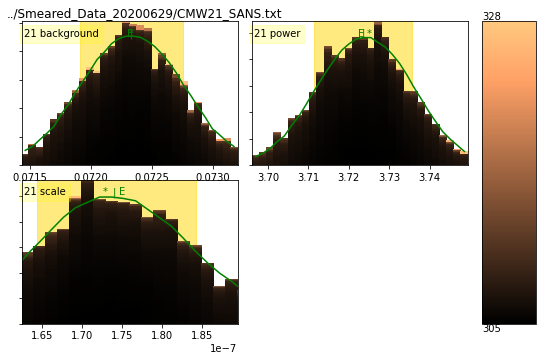

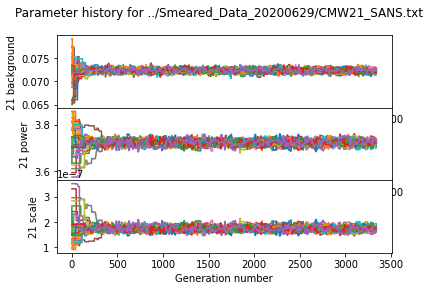

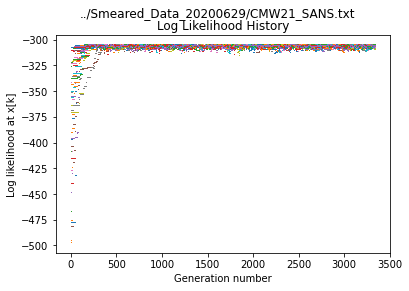

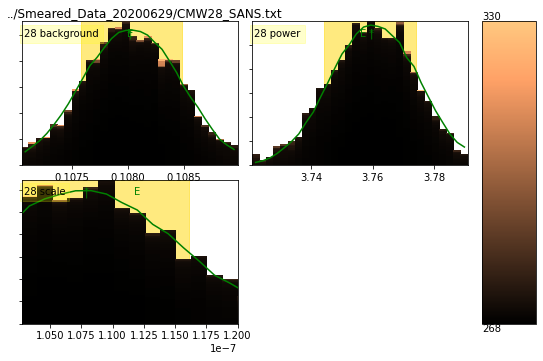

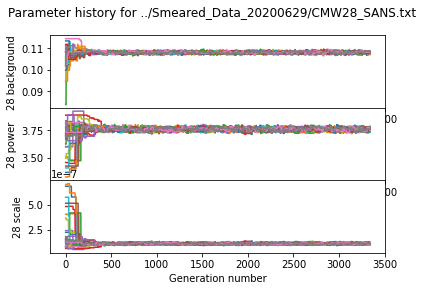

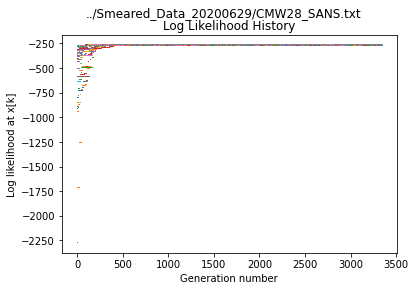

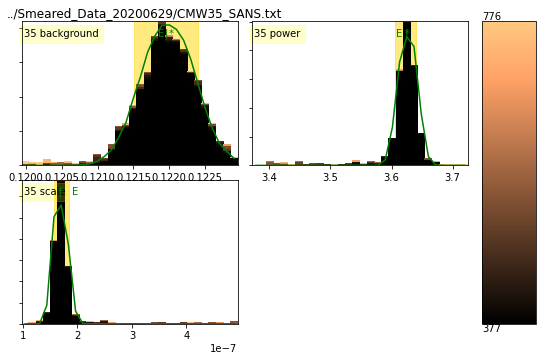

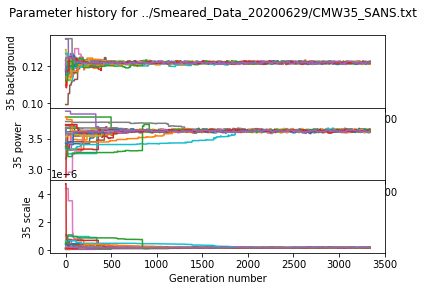

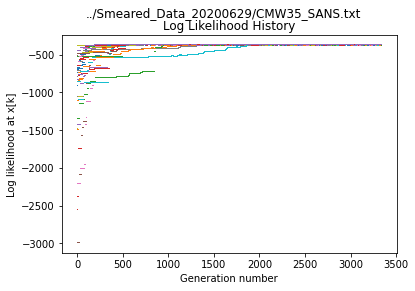

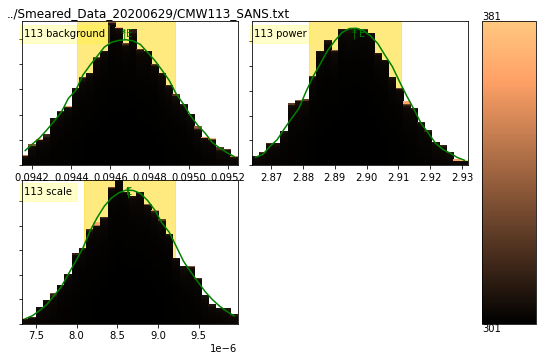

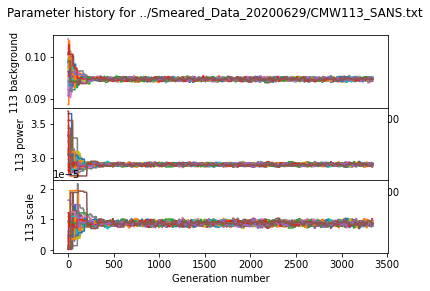

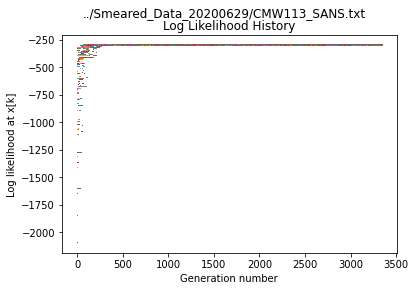

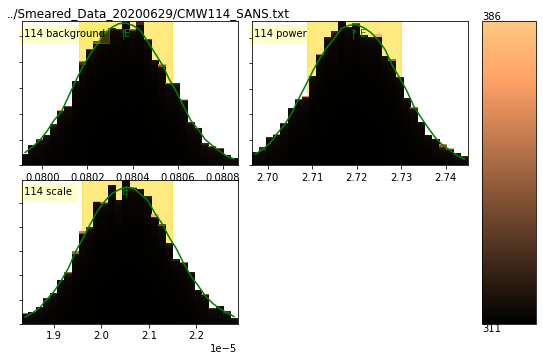

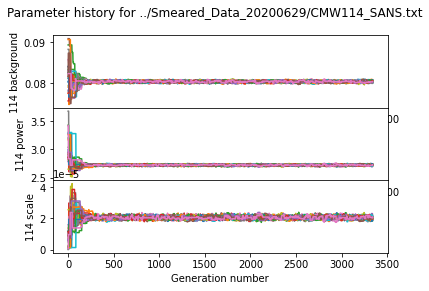

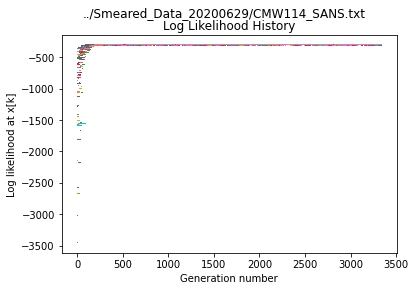

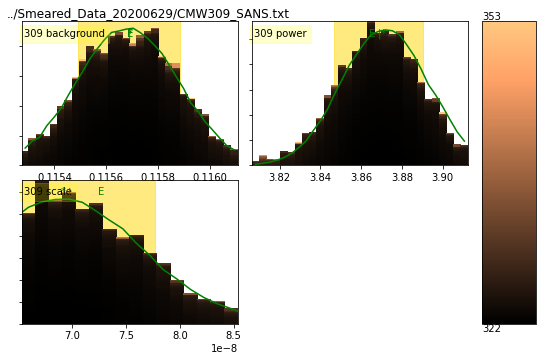

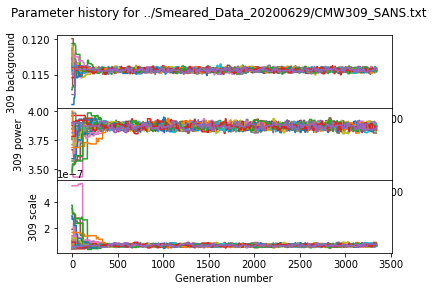

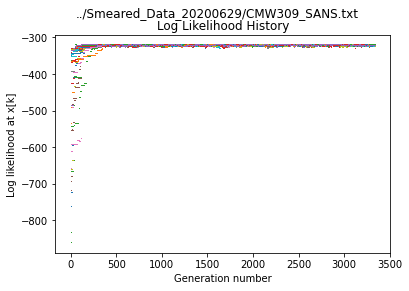

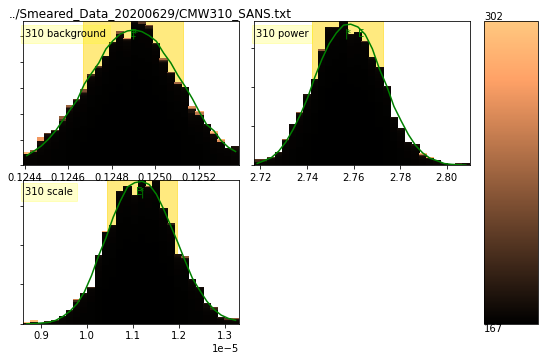

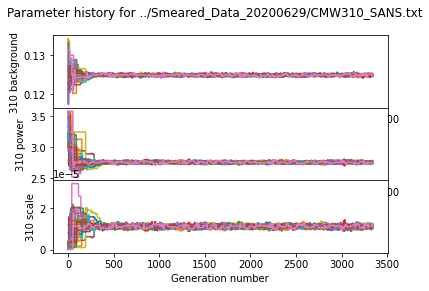

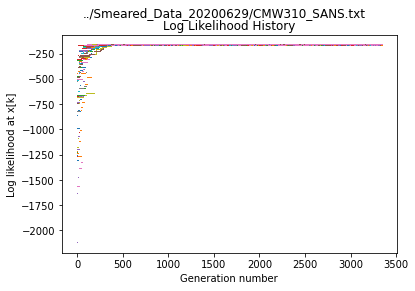

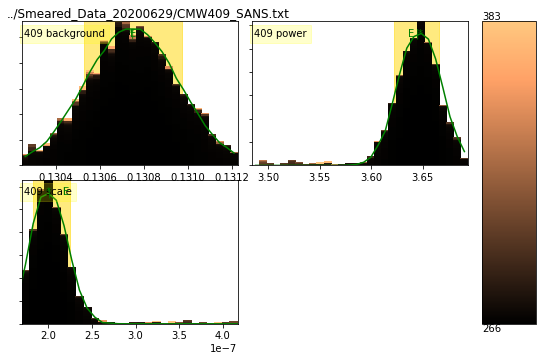

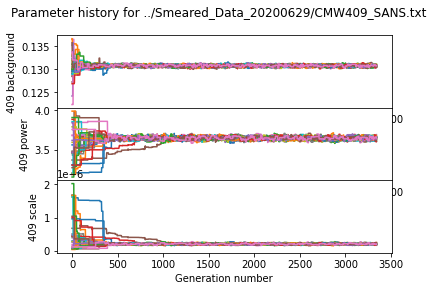

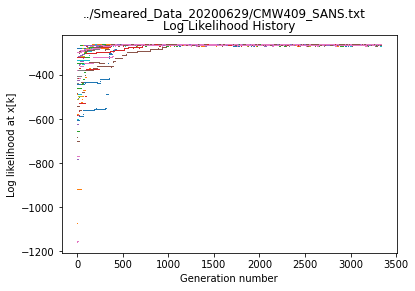

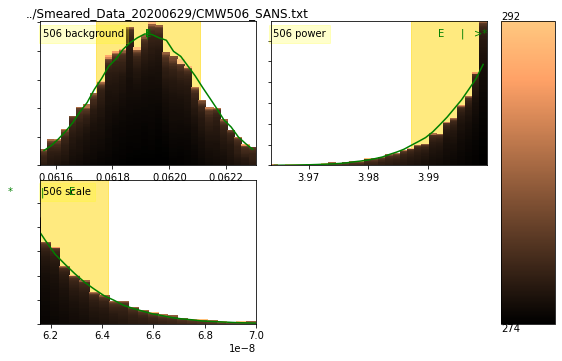

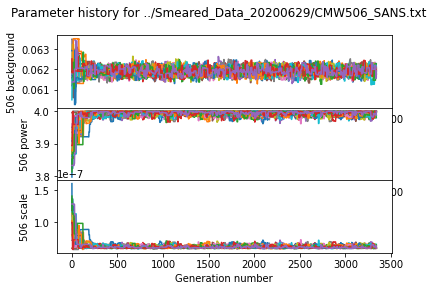

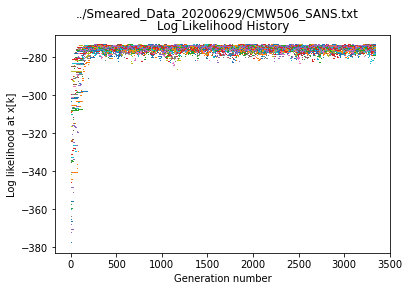

In [5]:
# temporarily store the initial parameters before finding common Porod exponent
temp_params = {}
# temporarily storing the fitting problems
temp_results = {}

# will utilize the power_law model in SasView
# the porod model automatically enforces an exponent of 4
kernel=load_model("power_law")

for key in ps_keys:
    
    # loading the data
    sans = sans_data[key][1]
    
    # initial parameter values
    scale = Parameter(0.000001, name = str(key) + ' scale')
    background = Parameter(0.07, name = str(key) + ' background')
    power = Parameter(3.8, name = str(key) + ' power')
    
    # storing the fit parameters
    temp_params[key] = {}
    temp_params[key]['scale'] = scale
    temp_params[key]['background'] = background
    temp_params[key]['power'] = power

    # setting up the power_law model for fitting
    sans_model = Model(kernel, scale=scale, background=background,  power=power)

    # setting parameter ranges as needed
    sans_model.scale.range(0,0.001)
    sans_model.power.range(2.5,4)
    sans_model.background.range(0,10)

    # common minimum q for the porod analysis
    sans.qmin = 5e-3
    mask = np.where(sans.x > sans.qmin)
    sans.x = sans.x[mask]
    sans.y = sans.y[mask]
    sans.dx = sans.dx[mask]
    sans.dy = sans.dy[mask]
    sans.mask = sans.mask[mask]
    
    sans.dx = sans.dx-sans.dx # removing any smeared contributions for the sans contribution

    experiment=Experiment(data=sans, model=sans_model)
    problem=FitProblem(experiment)
    result=fit(problem,method='dream', samples=1e5, verbose=True)
    result.state.show(figfile='../data/sans/PS_Fitting/ps_fit_results/power_law_background/CWM' + str(key) + '_background')
    plt.close()
    
    temp_results[key] = problem


21


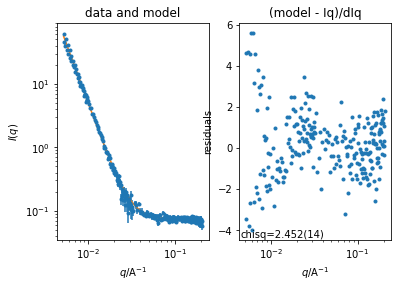

28


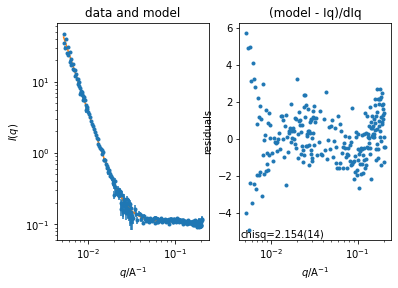

35


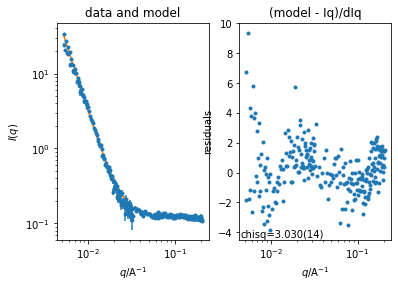

113


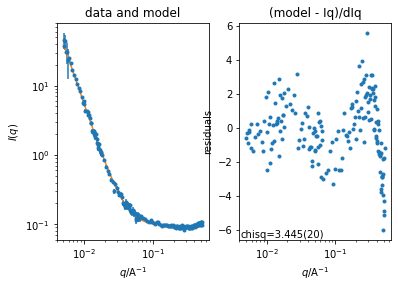

114


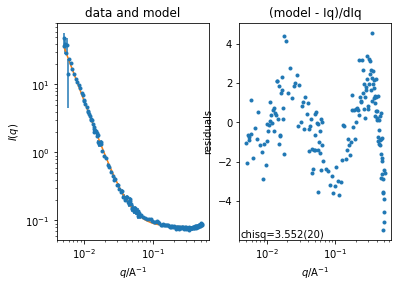

309


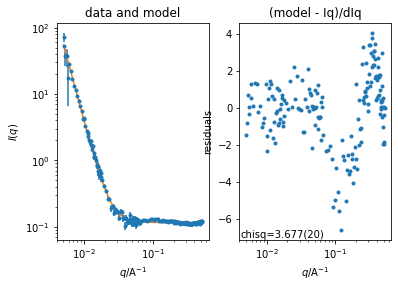

310


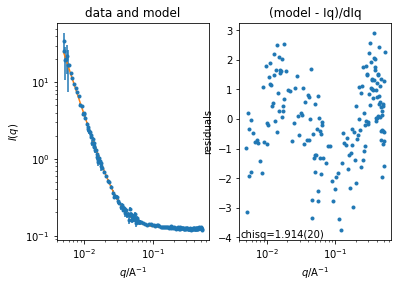

409


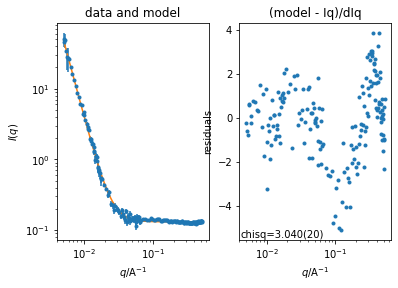

506


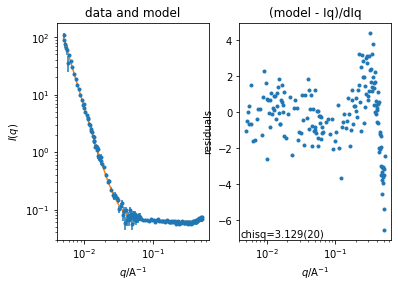

In [6]:
for key, problem in temp_results.items():
    print(key)
    problem.plot()
    plt.show()
    plt.close()

In [7]:
ps_backgrounds = {}
for key, params in temp_params.items():
    ps_backgrounds[key] = params['background'].value


Fitting an overall Porod exponent to all polystyrene data, constraining the backgrounds.

# steps: 10000, # draws: 1000000
step 1 cost 34931.9792(64)
                            ps porod_exp ......|...        3.5 in (2.5,4)
                                21 scale |......... 1.73873e-07 in (0,0.001)
                                28 scale |......... 1.08062e-07 in (0,0.001)
                                35 scale |......... 1.68517e-07 in (0,0.001)
                               113 scale |......... 8.63117e-06 in (0,0.001)
                               114 scale |......... 2.05263e-05 in (0,0.001)
                               309 scale |......... 6.97058e-08 in (0,0.001)
                               310 scale |......... 1.11708e-05 in (0,0.001)
                               409 scale |......... 2.00034e-07 in (0,0.001)
                               506 scale |......... 6.10746e-08 in (0,0.001)
step 3 cost 34882.2440(64)
step 5 cost 34868.6869(64)
step 7 cost 34640.6965(64)
step 9 cost 34525.3023(64)
step 11 cost 33407.7855(64)
step 13 cost 29315.3644(64)
step 15 c

step 277 cost 29.1079(64)
step 279 cost 29.1079(64)
step 281 cost 29.1079(64)
step 283 cost 29.1079(64)
step 285 cost 29.1079(64)
step 287 cost 29.1079(64)
step 289 cost 29.1079(64)
step 291 cost 29.1079(64)
step 293 cost 29.1079(64)
step 295 cost 29.0976(64)
step 297 cost 29.0976(64)
step 299 cost 29.0976(64)
step 301 cost 29.0976(64)
step 303 cost 29.0976(64)
step 305 cost 29.0976(64)
step 307 cost 29.0976(64)
                            ps porod_exp .|........    2.65596 in (2.5,4)
                                21 scale |......... 1.88304e-05 in (0,0.001)
                                28 scale |......... 1.52571e-05 in (0,0.001)
                                35 scale |......... 1.30726e-05 in (0,0.001)
                               113 scale |......... 1.81739e-05 in (0,0.001)
                               114 scale |......... 2.63039e-05 in (0,0.001)
                               309 scale |......... 1.1829e-05 in (0,0.001)
                               310 scale |.......

step 573 cost 23.2412(64)
step 575 cost 23.2412(64)
step 577 cost 23.2412(64)
step 579 cost 23.2412(64)
step 581 cost 23.2412(64)
step 583 cost 23.2412(64)
step 585 cost 23.2412(64)
step 587 cost 23.2412(64)
step 589 cost 23.2412(64)
step 591 cost 23.2412(64)
step 593 cost 23.2412(64)
step 595 cost 23.2412(64)
step 597 cost 23.2412(64)
step 599 cost 23.2412(64)
step 601 cost 23.2412(64)
step 603 cost 23.2412(64)
step 605 cost 23.2412(64)
step 607 cost 23.2412(64)
step 609 cost 23.2412(64)
step 611 cost 23.2412(64)
step 613 cost 23.2412(64)
step 615 cost 23.2412(64)
step 617 cost 23.2412(64)
step 619 cost 23.2412(64)
step 621 cost 23.2412(64)
step 623 cost 23.2412(64)
step 625 cost 23.2412(64)
                            ps porod_exp .|........    2.76299 in (2.5,4)
                                21 scale |......... 1.29085e-05 in (0,0.001)
                                28 scale |......... 9.47295e-06 in (0,0.001)
                                35 scale |......... 8.52403e-06 in (0,

step 881 cost 21.5860(64)
step 883 cost 21.5860(64)
step 885 cost 21.5860(64)
step 887 cost 21.5860(64)
step 889 cost 21.5860(64)
step 891 cost 21.5860(64)
step 893 cost 21.5860(64)
step 895 cost 21.5860(64)
step 897 cost 21.5860(64)
step 899 cost 21.5860(64)
step 901 cost 21.5860(64)
step 903 cost 21.5860(64)
step 905 cost 21.5860(64)
step 907 cost 21.5860(64)
step 909 cost 21.5860(64)
step 911 cost 21.5860(64)
step 913 cost 21.5860(64)
step 915 cost 21.5860(64)
step 917 cost 21.5398(64)
step 919 cost 21.5398(64)
step 921 cost 21.5398(64)
step 923 cost 21.5398(64)
step 925 cost 21.5398(64)
step 927 cost 21.5398(64)
step 929 cost 21.5398(64)
step 931 cost 21.5398(64)
                            ps porod_exp ..|.......    2.81956 in (2.5,4)
                                21 scale |......... 1.01591e-05 in (0,0.001)
                                28 scale |......... 6.8924e-06 in (0,0.001)
                                35 scale |......... 5.90897e-06 in (0,0.001)
                    

step 1194 cost 19.6365(64)
step 1196 cost 19.6365(64)
step 1198 cost 19.6365(64)
step 1200 cost 19.6365(64)
step 1202 cost 19.6365(64)
step 1204 cost 19.6365(64)
step 1206 cost 19.5321(64)
step 1208 cost 19.5321(64)
step 1210 cost 19.5321(64)
step 1212 cost 19.5321(64)
step 1214 cost 19.5321(64)
step 1216 cost 19.5321(64)
step 1218 cost 19.5321(64)
step 1220 cost 19.5321(64)
step 1222 cost 19.4158(64)
step 1224 cost 19.4158(64)
step 1226 cost 19.4158(64)
step 1228 cost 19.4158(64)
step 1230 cost 19.4158(64)
step 1232 cost 19.4158(64)
step 1234 cost 19.4158(64)
step 1236 cost 19.4158(64)
step 1238 cost 19.4158(64)
step 1240 cost 19.4158(64)
step 1242 cost 19.4158(64)
step 1244 cost 19.4158(64)
step 1246 cost 19.4158(64)
                            ps porod_exp ..|.......    2.93071 in (2.5,4)
                                21 scale |......... 5.89142e-06 in (0,0.001)
                                28 scale |......... 5.00049e-06 in (0,0.001)
                                35 scale |.

step 1485 cost 17.6470(64)
step 1487 cost 17.6470(64)
step 1489 cost 17.6470(64)
step 1491 cost 17.6470(64)
step 1493 cost 17.6470(64)
step 1495 cost 17.6470(64)
step 1497 cost 17.6470(64)
step 1499 cost 17.6470(64)
step 1501 cost 17.6470(64)
step 1503 cost 17.6470(64)
step 1505 cost 17.6470(64)
step 1507 cost 17.6470(64)
step 1509 cost 17.6470(64)
step 1511 cost 17.6470(64)
step 1513 cost 17.6470(64)
step 1515 cost 17.6470(64)
step 1517 cost 17.6470(64)
step 1519 cost 17.6470(64)
step 1521 cost 17.5500(64)
step 1523 cost 17.5500(64)
step 1525 cost 17.5500(64)
step 1527 cost 17.5500(64)
step 1529 cost 17.5500(64)
step 1531 cost 17.5500(64)
                            ps porod_exp ..|.......    2.91008 in (2.5,4)
                                21 scale |......... 6.36545e-06 in (0,0.001)
                                28 scale |......... 5.44825e-06 in (0,0.001)
                                35 scale |......... 4.54261e-06 in (0,0.001)
                               113 scale |.....

step 1799 cost 15.5535(64)
step 1801 cost 15.5535(64)
step 1803 cost 15.5535(64)
step 1805 cost 15.5535(64)
step 1807 cost 15.5535(64)
step 1809 cost 15.5535(64)
step 1811 cost 15.5535(64)
step 1813 cost 15.5535(64)
step 1815 cost 15.5535(64)
step 1817 cost 15.5535(64)
step 1819 cost 15.5535(64)
step 1821 cost 15.5535(64)
step 1823 cost 15.5535(64)
step 1825 cost 15.5535(64)
step 1827 cost 15.5535(64)
step 1829 cost 15.5535(64)
step 1831 cost 15.5535(64)
step 1833 cost 15.5535(64)
step 1835 cost 15.5535(64)
step 1837 cost 15.5535(64)
step 1839 cost 15.5535(64)
step 1841 cost 15.5535(64)
step 1843 cost 15.5535(64)
step 1845 cost 15.5535(64)
step 1847 cost 15.5535(64)
                            ps porod_exp ...|......     3.0077 in (2.5,4)
                                21 scale |......... 4.58987e-06 in (0,0.001)
                                28 scale |......... 2.79464e-06 in (0,0.001)
                                35 scale |......... 2.81013e-06 in (0,0.001)
                    

step 2491 cost 12.3019(64)
step 2496 cost 12.3019(64)
step 2501 cost 12.3019(64)
step 2505 cost 12.3019(64)
step 2509 cost 12.3019(64)
step 2514 cost 12.3019(64)
step 2518 cost 12.3019(64)
step 2522 cost 12.3019(64)
step 2526 cost 12.3019(64)
step 2530 cost 12.1629(64)
step 2534 cost 12.1629(64)
step 2538 cost 12.1629(64)
step 2543 cost 12.1629(64)
step 2548 cost 12.1629(64)
step 2553 cost 12.1629(64)
step 2558 cost 12.1629(64)
step 2563 cost 12.1629(64)
step 2568 cost 12.1629(64)
step 2573 cost 12.1629(64)
step 2578 cost 12.1629(64)
step 2583 cost 12.1629(64)
step 2588 cost 12.1629(64)
step 2593 cost 12.1629(64)
step 2598 cost 12.1629(64)
step 2603 cost 12.1629(64)
                            ps porod_exp ....|.....    3.16086 in (2.5,4)
                                21 scale |......... 2.40495e-06 in (0,0.001)
                                28 scale |......... 1.54443e-06 in (0,0.001)
                                35 scale |......... 1.57932e-06 in (0,0.001)
                    

step 3270 cost 10.2238(64)
step 3274 cost 10.2238(64)
step 3278 cost 10.2238(64)
step 3282 cost 10.0396(64)
step 3287 cost 10.0396(64)
step 3292 cost 10.0396(64)
step 3297 cost 10.0396(64)
step 3302 cost 10.0396(64)
step 3307 cost 10.0396(64)
step 3312 cost 10.0396(64)
step 3317 cost 10.0396(64)
step 3322 cost 10.0396(64)
step 3327 cost 10.0396(64)
step 3332 cost 10.0396(64)
step 3337 cost 10.0396(64)
step 3342 cost 10.0396(64)
step 3347 cost 10.0396(64)
step 3352 cost 10.0144(64)
step 3357 cost 10.0144(64)
step 3362 cost 10.0144(64)
step 3367 cost 10.0144(64)
step 3372 cost 10.0144(64)
step 3377 cost 10.0144(64)
step 3382 cost 10.0144(64)
step 3387 cost 10.0144(64)
step 3392 cost 10.0144(64)
step 3397 cost 10.0144(64)
                            ps porod_exp .....|....    3.28013 in (2.5,4)
                                21 scale |.........  1.278e-06 in (0,0.001)
                                28 scale |......... 9.61296e-07 in (0,0.001)
                                35 scale |..

step 3999 cost 9.2746(64)
step 4004 cost 9.2746(64)
step 4008 cost 9.2732(64)
step 4013 cost 9.2732(64)
step 4017 cost 9.2732(64)
step 4022 cost 9.2732(64)
step 4027 cost 9.2597(64)
step 4032 cost 9.2597(64)
step 4037 cost 9.2597(64)
step 4041 cost 9.0698(64)
step 4045 cost 9.0698(64)
step 4049 cost 9.0698(64)
step 4053 cost 9.0698(64)
step 4057 cost 9.0698(64)
step 4062 cost 9.0336(64)
step 4066 cost 9.0336(64)
step 4071 cost 9.0336(64)
step 4076 cost 9.0336(64)
step 4081 cost 9.0336(64)
step 4086 cost 9.0336(64)
step 4090 cost 9.0336(64)
step 4094 cost 9.0336(64)
step 4098 cost 9.0336(64)
step 4103 cost 9.0336(64)
step 4108 cost 9.0336(64)
step 4113 cost 9.0336(64)
                            ps porod_exp ......|...    3.42564 in (2.5,4)
                                21 scale |......... 6.55798e-07 in (0,0.001)
                                28 scale |......... 5.26461e-07 in (0,0.001)
                                35 scale |......... 4.28273e-07 in (0,0.001)
                   

step 4738 cost 8.7681(64)
step 4743 cost 8.7681(64)
step 4748 cost 8.7681(64)
step 4753 cost 8.7681(64)
step 4758 cost 8.7681(64)
step 4763 cost 8.7681(64)
step 4767 cost 8.7681(64)
step 4772 cost 8.7681(64)
step 4777 cost 8.7681(64)
step 4781 cost 8.7681(64)
step 4786 cost 8.7681(64)
step 4790 cost 8.7681(64)
step 4794 cost 8.7681(64)
step 4798 cost 8.7681(64)
step 4802 cost 8.7681(64)
step 4806 cost 8.7507(64)
step 4810 cost 8.7507(64)
step 4813 cost 8.7507(64)
step 4817 cost 8.7507(64)
step 4821 cost 8.7507(64)
step 4825 cost 8.7507(64)
step 4829 cost 8.7507(64)
step 4833 cost 8.7507(64)
step 4838 cost 8.7507(64)
step 4843 cost 8.7507(64)
step 4848 cost 8.7507(64)
                            ps porod_exp ......|...     3.4349 in (2.5,4)
                                21 scale |......... 6.57259e-07 in (0,0.001)
                                28 scale |......... 5.05569e-07 in (0,0.001)
                                35 scale |......... 4.14699e-07 in (0,0.001)
                   

step 5476 cost 8.6430(64)
step 5481 cost 8.6430(64)
step 5486 cost 8.6430(64)
step 5491 cost 8.6430(64)
step 5496 cost 8.6430(64)
step 5501 cost 8.6430(64)
step 5506 cost 8.6430(64)
step 5510 cost 8.6430(64)
step 5515 cost 8.6430(64)
step 5520 cost 8.6430(64)
step 5525 cost 8.6430(64)
step 5530 cost 8.6430(64)
step 5535 cost 8.6430(64)
step 5540 cost 8.6430(64)
step 5545 cost 8.6430(64)
step 5549 cost 8.6430(64)
step 5554 cost 8.6430(64)
step 5559 cost 8.6430(64)
step 5564 cost 8.6430(64)
step 5569 cost 8.6430(64)
step 5573 cost 8.6430(64)
step 5578 cost 8.6430(64)
step 5583 cost 8.6430(64)
step 5588 cost 8.6430(64)
step 5593 cost 8.6430(64)
step 5598 cost 8.6430(64)
step 5603 cost 8.6430(64)
                            ps porod_exp ......|...    3.47921 in (2.5,4)
                                21 scale |......... 5.42315e-07 in (0,0.001)
                                28 scale |......... 3.99663e-07 in (0,0.001)
                                35 scale |......... 3.34212e-07 in (0,

step 6244 cost 8.6333(64)
step 6249 cost 8.6333(64)
step 6254 cost 8.6333(64)
step 6259 cost 8.6333(64)
step 6264 cost 8.6333(64)
step 6269 cost 8.6333(64)
step 6274 cost 8.6333(64)
step 6279 cost 8.6333(64)
step 6284 cost 8.6333(64)
step 6289 cost 8.6333(64)
step 6294 cost 8.6333(64)
step 6299 cost 8.6333(64)
step 6304 cost 8.6333(64)
step 6309 cost 8.6333(64)
step 6314 cost 8.6333(64)
step 6319 cost 8.6333(64)
step 6324 cost 8.6333(64)
step 6329 cost 8.6333(64)
step 6334 cost 8.6326(64)
step 6339 cost 8.6326(64)
step 6344 cost 8.6326(64)
step 6349 cost 8.6326(64)
step 6354 cost 8.6326(64)
step 6359 cost 8.6326(64)
step 6364 cost 8.6326(64)
step 6369 cost 8.6326(64)
                            ps porod_exp ......|...    3.49382 in (2.5,4)
                                21 scale |......... 5.06782e-07 in (0,0.001)
                                28 scale |......... 3.77576e-07 in (0,0.001)
                                35 scale |......... 3.13885e-07 in (0,0.001)
                   

step 7012 cost 8.6315(64)
step 7016 cost 8.6315(64)
step 7020 cost 8.6315(64)
step 7025 cost 8.6315(64)
step 7030 cost 8.6315(64)
step 7035 cost 8.6315(64)
step 7040 cost 8.6313(64)
step 7045 cost 8.6313(64)
step 7050 cost 8.6313(64)
step 7055 cost 8.6313(64)
step 7060 cost 8.6313(64)
step 7065 cost 8.6313(64)
step 7070 cost 8.6313(64)
step 7075 cost 8.6313(64)
step 7080 cost 8.6313(64)
step 7085 cost 8.6313(64)
step 7090 cost 8.6313(64)
step 7095 cost 8.6313(64)
step 7100 cost 8.6313(64)
step 7105 cost 8.6313(64)
step 7110 cost 8.6313(64)
step 7115 cost 8.6312(64)
step 7120 cost 8.6312(64)
step 7125 cost 8.6312(64)
step 7130 cost 8.6312(64)
step 7135 cost 8.6312(64)
step 7140 cost 8.6312(64)
                            ps porod_exp ......|...    3.49458 in (2.5,4)
                                21 scale |......... 5.0368e-07 in (0,0.001)
                                28 scale |......... 3.73971e-07 in (0,0.001)
                                35 scale |......... 3.12164e-07 in (0,0

step 7782 cost 8.6309(64)
step 7787 cost 8.6309(64)
step 7792 cost 8.6309(64)
step 7797 cost 8.6309(64)
step 7802 cost 8.6309(64)
step 7807 cost 8.6309(64)
step 7812 cost 8.6309(64)
step 7817 cost 8.6309(64)
step 7822 cost 8.6309(64)
step 7826 cost 8.6309(64)
step 7830 cost 8.6309(64)
step 7835 cost 8.6309(64)
step 7840 cost 8.6309(64)
step 7845 cost 8.6309(64)
step 7850 cost 8.6309(64)
step 7855 cost 8.6309(64)
step 7860 cost 8.6309(64)
step 7864 cost 8.6309(64)
step 7868 cost 8.6309(64)
step 7873 cost 8.6309(64)
step 7878 cost 8.6309(64)
step 7883 cost 8.6309(64)
step 7888 cost 8.6309(64)
step 7893 cost 8.6309(64)
step 7898 cost 8.6309(64)
step 7903 cost 8.6309(64)
                            ps porod_exp ......|...    3.49454 in (2.5,4)
                                21 scale |......... 5.05087e-07 in (0,0.001)
                                28 scale |......... 3.7435e-07 in (0,0.001)
                                35 scale |......... 3.12187e-07 in (0,0.001)
                    

step 8532 cost 8.6309(64)
step 8537 cost 8.6309(64)
step 8542 cost 8.6309(64)
step 8547 cost 8.6309(64)
step 8552 cost 8.6309(64)
step 8557 cost 8.6309(64)
step 8562 cost 8.6309(64)
step 8567 cost 8.6309(64)
step 8572 cost 8.6309(64)
step 8577 cost 8.6309(64)
step 8582 cost 8.6309(64)
step 8587 cost 8.6309(64)
step 8592 cost 8.6309(64)
step 8597 cost 8.6309(64)
step 8602 cost 8.6309(64)
step 8607 cost 8.6309(64)
step 8612 cost 8.6309(64)
step 8617 cost 8.6309(64)
step 8622 cost 8.6309(64)
step 8627 cost 8.6309(64)
step 8632 cost 8.6309(64)
step 8637 cost 8.6309(64)
step 8642 cost 8.6309(64)
step 8647 cost 8.6309(64)
step 8652 cost 8.6309(64)
step 8657 cost 8.6309(64)
                            ps porod_exp ......|...    3.49454 in (2.5,4)
                                21 scale |......... 5.05087e-07 in (0,0.001)
                                28 scale |......... 3.7435e-07 in (0,0.001)
                                35 scale |......... 3.12187e-07 in (0,0.001)
                    

step 9298 cost 8.6309(64)
step 9303 cost 8.6309(64)
step 9308 cost 8.6309(64)
step 9313 cost 8.6309(64)
step 9318 cost 8.6309(64)
step 9323 cost 8.6309(64)
step 9328 cost 8.6309(64)
step 9333 cost 8.6309(64)
step 9338 cost 8.6309(64)
step 9343 cost 8.6309(64)
step 9348 cost 8.6309(64)
step 9353 cost 8.6309(64)
step 9358 cost 8.6309(64)
step 9363 cost 8.6309(64)
step 9368 cost 8.6309(64)
step 9373 cost 8.6309(64)
step 9378 cost 8.6309(64)
step 9382 cost 8.6309(64)
step 9386 cost 8.6309(64)
step 9391 cost 8.6309(64)
step 9396 cost 8.6309(64)
step 9401 cost 8.6309(64)
step 9406 cost 8.6309(64)
step 9411 cost 8.6309(64)
step 9416 cost 8.6309(64)
step 9421 cost 8.6309(64)
step 9426 cost 8.6309(64)
                            ps porod_exp ......|...    3.49454 in (2.5,4)
                                21 scale |......... 5.05087e-07 in (0,0.001)
                                28 scale |......... 3.7435e-07 in (0,0.001)
                                35 scale |......... 3.12187e-07 in (0,0

step 10029 cost 8.6309(64)
step 10034 cost 8.6309(64)
step 10038 cost 8.6309(64)
step 10042 cost 8.6309(64)
step 10046 cost 8.6309(64)
step 10051 cost 8.6309(64)
step 10056 cost 8.6309(64)
step 10061 cost 8.6309(64)
step 10066 cost 8.6309(64)
step 10071 cost 8.6309(64)
step 10076 cost 8.6309(64)
step 10081 cost 8.6309(64)
step 10086 cost 8.6309(64)
step 10091 cost 8.6309(64)
step 10096 cost 8.6309(64)
step 10101 cost 8.6309(64)
final chisq 8.6309(64)
=== Uncertainty from curvature:     name value(unc.)     value(unc./chi)) ===
                            ps porod_exp 3.4954(48)      3.4954(16)     
                                21 scale 503(11)e-9      503.1(39)e-9   
                                28 scale 373.4(86)e-9    373.4(29)e-9   
                                35 scale 310.5(71)e-9    310.5(24)e-9   
                               113 scale 504(12)e-9      503.6(42)e-9   
                               114 scale 535(13)e-9      535.3(43)e-9   
                             

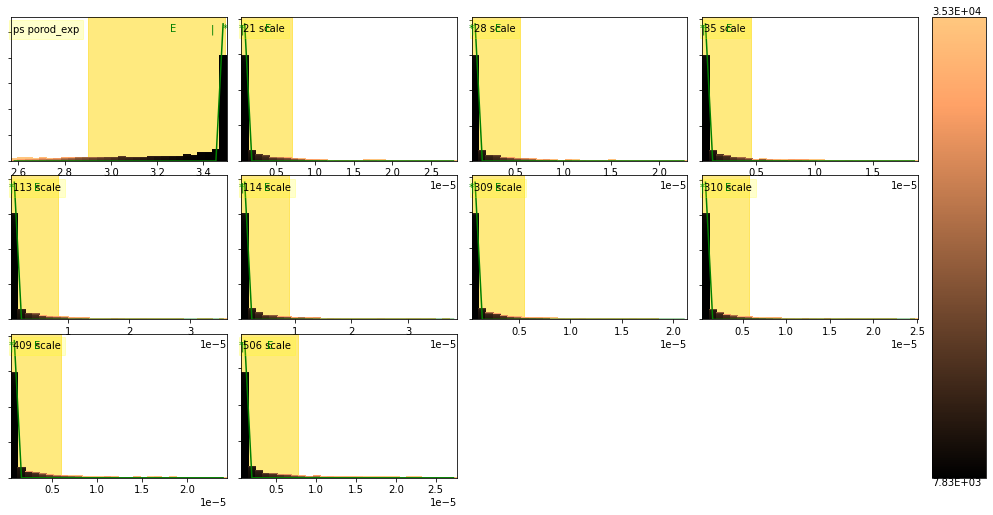

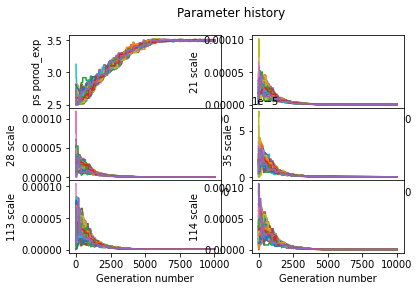

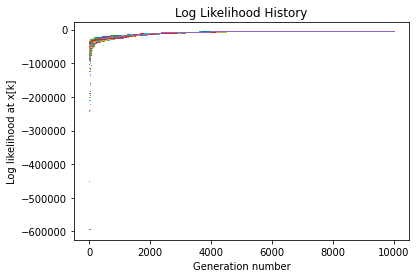

In [8]:
# temporarily storing the fitting problems
temp_results = {}

# will utilize the power_law model in SasView
# the porod model automatically enforces an exponent of 4
kernel=load_model("power_law")

# single porod exponent parameter for all ps data
ps_porod_exp = Parameter(3.5, name = 'ps porod_exp')

# setting up list of fitting experiments for simultaneous fits
exp_list = []

for key in ps_keys:
    
    # loading the data
    sans = sans_data[key][1]
    
    # initial parameter values
    scale = Parameter(temp_params[key]['scale'], name = str(key) + ' scale')
    background = Parameter(ps_backgrounds[key], name = str(key) + ' background')
    power = ps_porod_exp
    
    # setting up the power_law model for fitting
    sans_model = Model(kernel, scale=scale, background=background,  power=power)

    # setting parameter ranges as needed
    sans_model.scale.range(0,0.001)
    sans_model.power.range(2.5,4)

    # common minimum q for the porod analysis
    sans.qmin = 5e-3
    mask = np.where(sans.x > sans.qmin)
    sans.x = sans.x[mask]
    sans.y = sans.y[mask]
    sans.dx = sans.dx[mask]
    sans.dy = sans.dy[mask]
    sans.mask = sans.mask[mask]
    
    sans.dx = sans.dx-sans.dx # removing any smeared contributions for the sans contribution

    experiment=Experiment(data=sans, model=sans_model)
    
    exp_list.append(experiment)

problem=FitProblem(exp_list)
result=fit(problem,method='dream', samples=1e6, verbose=True)
result.state.show(figfile='../data/sans/PS_Fitting/ps_fit_results/power_law_porod_exp_scale/PS_porod_exp_scale')
plt.close()


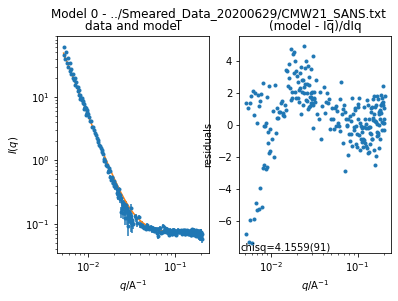

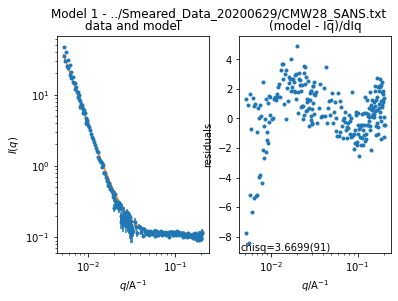

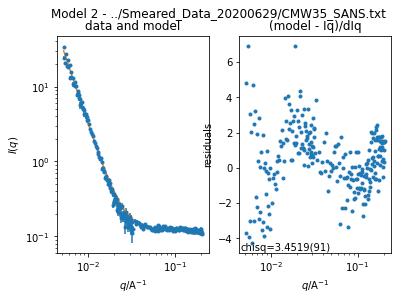

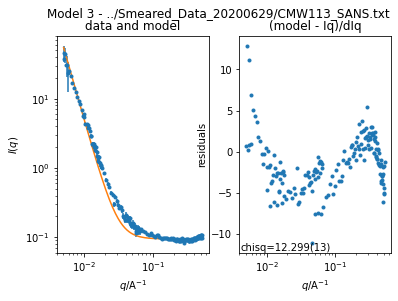

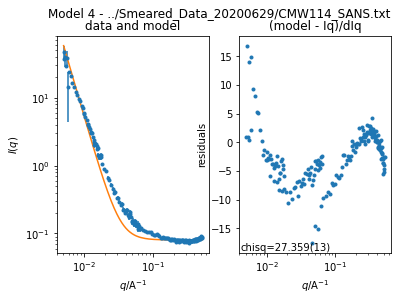

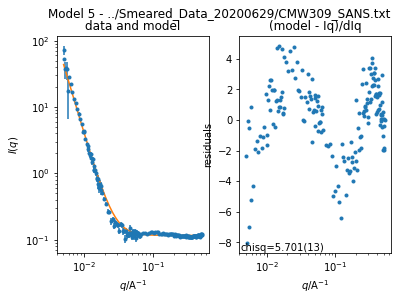

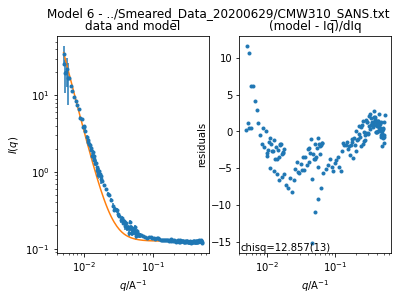

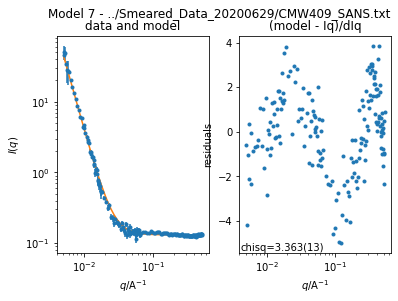

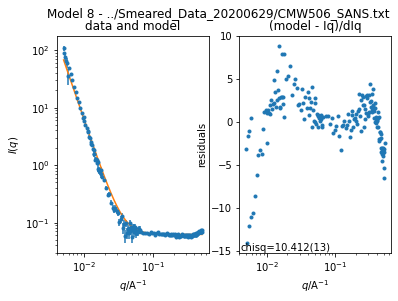

In [9]:
problem.plot()

In [10]:
ps_porod_exp = round(ps_porod_exp.value,2)
#np.savetxt('ps_porod_exp.csv', np.array([ps_porod_exp]), fmt='%s', header='polystyrene porod exponent', delimiter=',')


In [11]:
ps_porod_exp

3.5

In [12]:
ps_scales = {}
for model, key in zip(problem.models, ps_keys):
    ps_scales[key] = model.fitness.model.state()['scale']

Fitting the Rg of the guinier_porod for all datasets separately to gather an initial fit value.

# steps: 3334, # draws: 100020
step 1 cost 199.861(12)
                                   21 rg .|........    100.001 in (0,1000)
                                    21 s ........|.        2.9 in (2,3)
                                21 scale |......... 1.48329e-06 in (0,1)
step 41 cost 4.371(12)
step 86 cost 4.005(12)
step 132 cost 3.920(12)
step 181 cost 3.920(12)
step 229 cost 3.912(12)
step 277 cost 3.912(12)
step 327 cost 3.912(12)
step 377 cost 3.912(12)
step 425 cost 3.910(12)
step 462 cost 3.910(12)
step 496 cost 3.910(12)
step 542 cost 3.910(12)
step 575 cost 3.908(12)
step 616 cost 3.908(12)
step 655 cost 3.908(12)
step 701 cost 3.908(12)
step 748 cost 3.908(12)
step 796 cost 3.908(12)
step 836 cost 3.908(12)
step 885 cost 3.908(12)
step 927 cost 3.908(12)
step 970 cost 3.908(12)
step 1018 cost 3.907(12)
step 1067 cost 3.907(12)
step 1106 cost 3.907(12)
step 1151 cost 3.907(12)
step 1195 cost 3.907(12)
step 1233 cost 3.907(12)
step 1276 cost 3.907(12)
                        

step 1620 cost 3.244(13)
step 1643 cost 3.244(13)
step 1672 cost 3.244(13)
step 1707 cost 3.244(13)
step 1744 cost 3.244(13)
step 1785 cost 3.244(13)
step 1830 cost 3.244(13)
step 1873 cost 3.244(13)
step 1911 cost 3.244(13)
step 1953 cost 3.244(13)
step 1998 cost 3.244(13)
step 2041 cost 3.244(13)
step 2076 cost 3.244(13)
step 2107 cost 3.244(13)
step 2138 cost 3.244(13)
step 2166 cost 3.244(13)
step 2207 cost 3.244(13)
step 2239 cost 3.244(13)
step 2278 cost 3.244(13)
step 2316 cost 3.244(13)
step 2364 cost 3.244(13)
                                   35 rg |.........    22.2958 in (0,1000)
                                    35 s .........|    2.93397 in (2,3)
                                35 scale |......... 7.20169e-06 in (0,1)
step 2409 cost 3.244(13)
step 2458 cost 3.244(13)
step 2507 cost 3.244(13)
step 2555 cost 3.244(13)
step 2602 cost 3.244(13)
step 2638 cost 3.244(13)
step 2671 cost 3.244(13)
step 2712 cost 3.244(13)
step 2751 cost 3.244(13)
step 2791 cost 3.244(13)
step 

final chisq 3.107(16)
=== Uncertainty from curvature:     name value(unc.)     value(unc./chi)) ===
                                  409 rg 47(25)          47(14)         
                                   409 s 2.820(66)       2.820(38)      
                               409 scale 20(12)e-6       20.0(65)e-6    
              Parameter       mean  median    best [   68% interval] [   95% interval]
 1               409 rg     69(22)   63.51   47.19 [   48.9    90.9] [   40.1   121.9]
 2                409 s  2.770(48)   2.778   2.820 [   2.72    2.82] [   2.66    2.84]
 3            409 scale  34(17)e-6 0.0000287 0.0000200 [0.000021 0.000047] [0.000017 0.000077]
# steps: 3334, # draws: 100020
step 1 cost 125.545(17)
                                  506 rg |.........    99.9994 in (0,1000)
                                   506 s ........|.        2.9 in (2,3)
                               506 scale |......... 1.44079e-06 in (0,1)
step 47 cost 9.242(17)
step 93 cost 9.207(17)
step

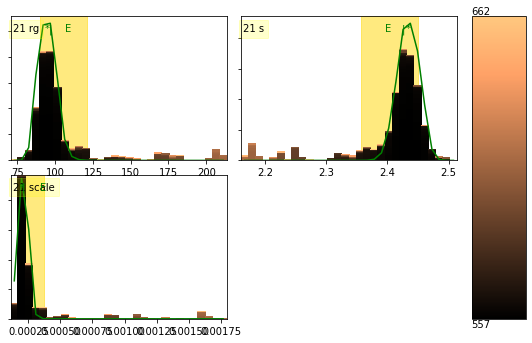

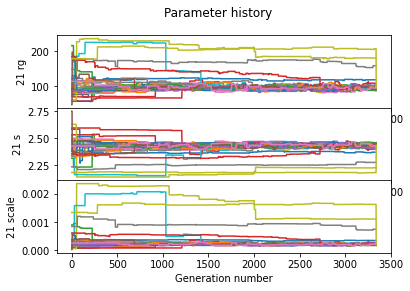

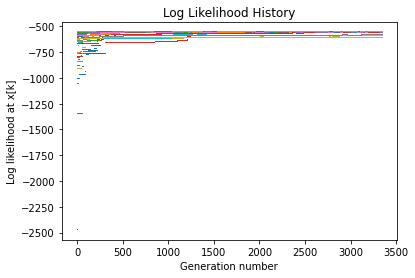

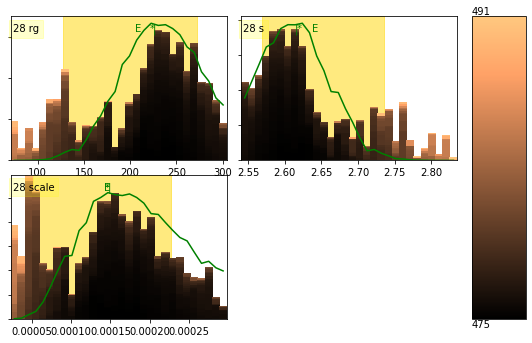

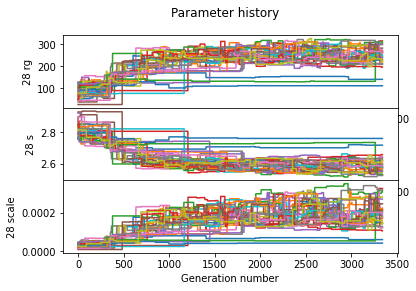

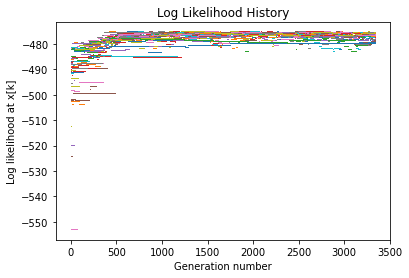

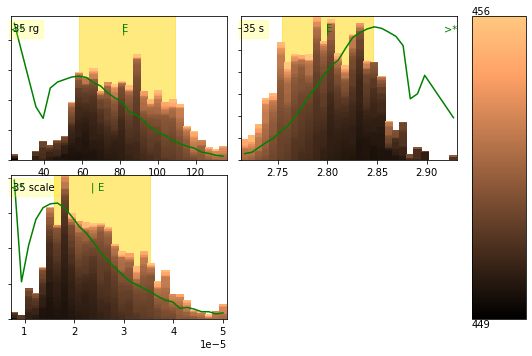

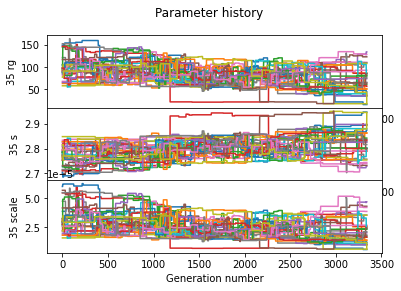

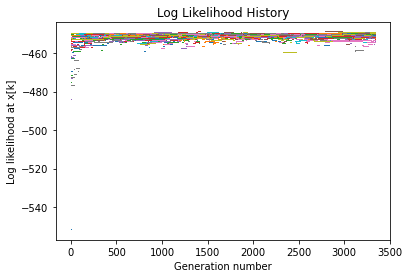

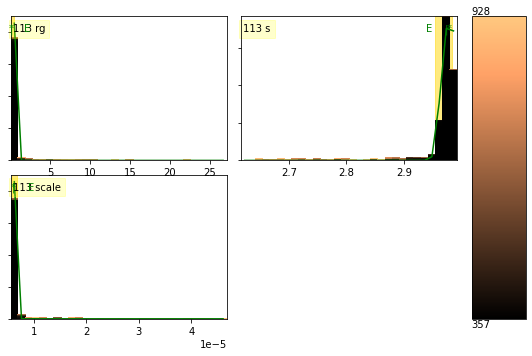

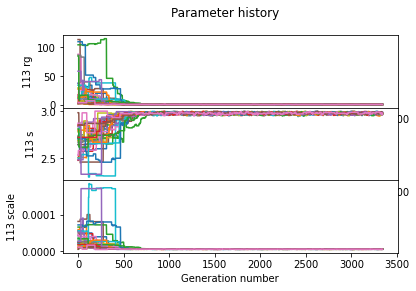

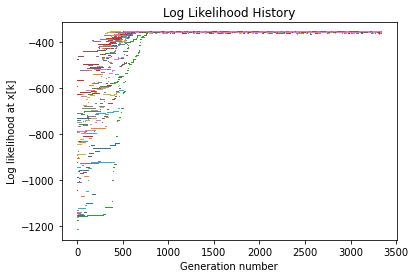

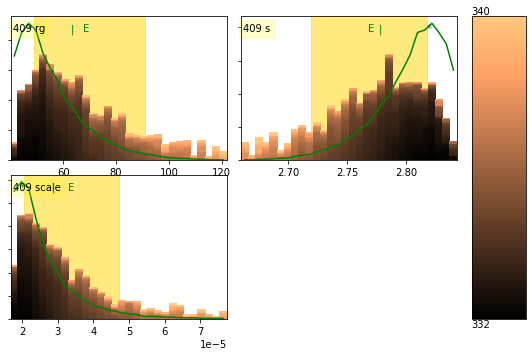

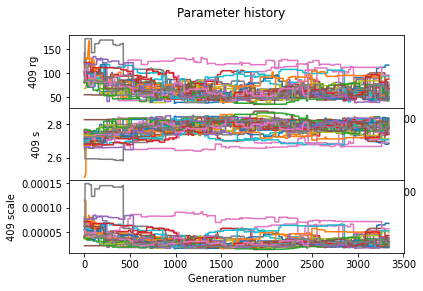

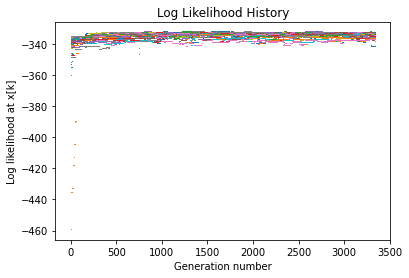

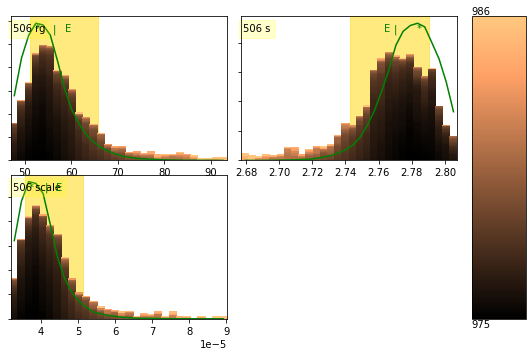

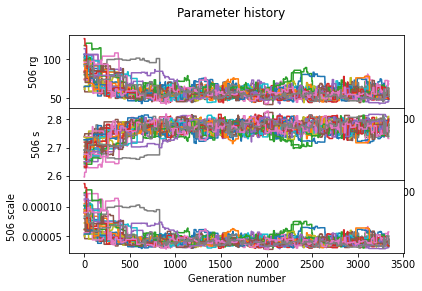

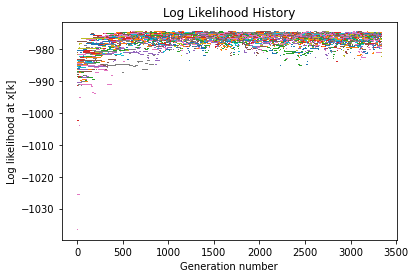

In [13]:
temp_results = {}
kernel=load_model("guinier_porod")

for key in ps_keys:
    
    # loading the data
    sans = sans_data[key][1]
    usans = sans_data[key][0]
    
    if usans is not None:
    
        # initial parameter values
        scale = Parameter(ps_scales[key], name = str(key) + ' scale')
        background = Parameter(ps_backgrounds[key], name = str(key) + ' background')
        porod_exp = Parameter(ps_porod_exp, name = 'ps porod_exp')
        s = Parameter(2.9, name = str(key) + ' s')
        rg = Parameter(100, name = str(key) + ' rg')
        
        # setting up the power_law model for fitting
        sans_model = Model(kernel, scale=scale, background=background,  porod_exp=porod_exp, s=s, rg=rg)
        usans_model = Model(kernel, scale=scale, background=background,  porod_exp=porod_exp, s=s, rg=rg)

        # setting parameter ranges as needed
        sans_model.scale.range(0,1)
        sans_model.s.range(2,3)
        sans_model.rg.range(0,1000)
        
        usans_model.scale.range(0,1)
        usans_model.s.range(2,3)
        usans_model.rg.range(0,1000)

        sans_experiment=Experiment(data=sans, model=sans_model)
        usans_experiment=Experiment(data=usans, model=usans_model)
        
        usans_smearing = sasmodels.resolution.Slit1D(usans.x, 0.117)
        usans_experiment.resolution = usans_smearing
    
        experiment = [sans_experiment, usans_experiment]

        problem=FitProblem(experiment)
        result=fit(problem,method='dream', samples=1e5, verbose=True)
        #result.state.show(figfile='../data/sans/PS_Fitting/ps_fit_results/guinier_porod_rg/CMW' + str(key) + '_rg')
        plt.close()
        #result=fit(problem,method='lm', verbose=True)
        
        temp_results[key] = problem


In [14]:
temp_rgs = {}
temp_s = {}
for key, value in temp_results.items():
    for val in value.models:
        temp_rgs[key] = val.fitness.model.state()['rg']
        temp_s[key] = val.fitness.model.state()['s']
        ps_scales[key] = val.fitness.model.state()['scale']

21


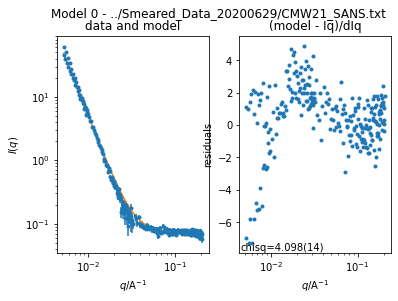

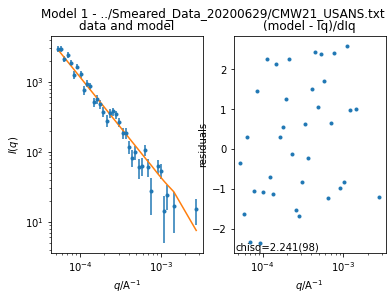

28


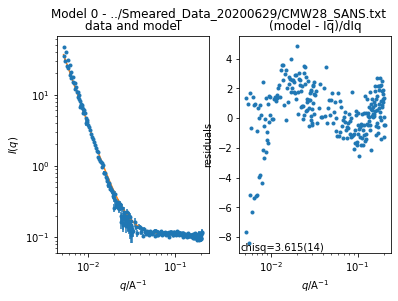

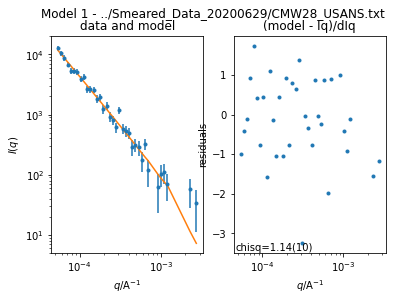

35


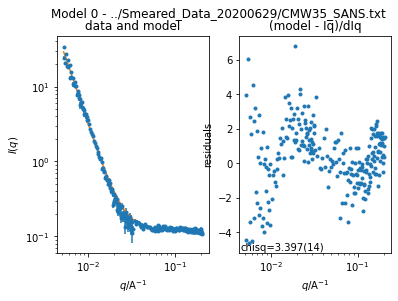

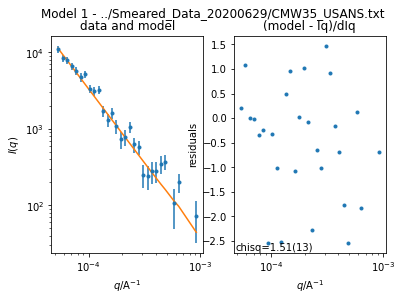

113


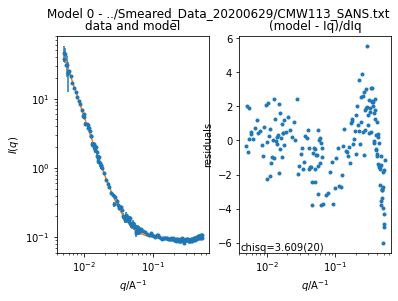

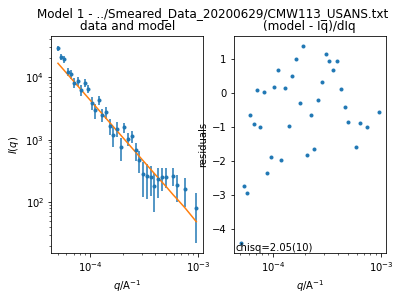

409


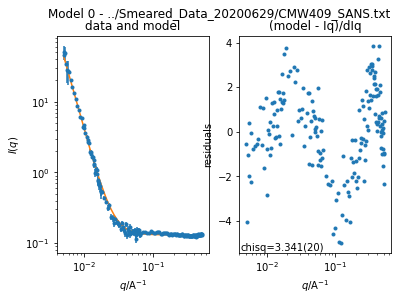

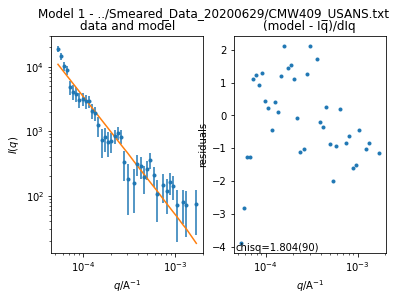

506


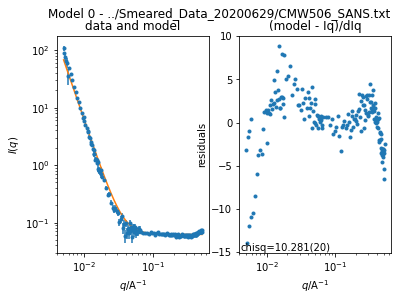

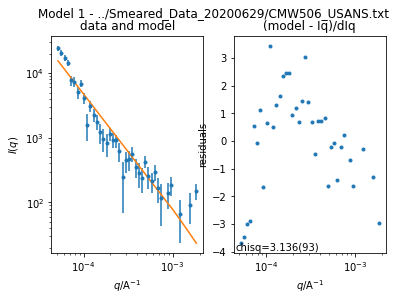

In [15]:
for key, problem in temp_results.items():
    print(key)
    problem.plot()
    plt.show()
    plt.close()

Re-fitting selected samples as they did not converge.

# steps: 33334, # draws: 1000020
step 1 cost 76.433(13)
                                   35 rg |.........     99.999 in (0,1000)
                                    35 s ........|.        2.9 in (2,3)
                                35 scale |......... 7.34218e-06 in (0,1)
step 46 cost 3.294(13)
step 91 cost 3.250(13)
step 136 cost 3.250(13)
step 170 cost 3.250(13)
step 192 cost 3.250(13)
step 236 cost 3.250(13)
step 275 cost 3.250(13)
step 321 cost 3.250(13)
step 367 cost 3.249(13)
step 410 cost 3.248(13)
step 454 cost 3.248(13)
step 496 cost 3.248(13)
step 538 cost 3.248(13)
step 579 cost 3.248(13)
step 619 cost 3.248(13)
step 658 cost 3.248(13)
step 698 cost 3.248(13)
step 735 cost 3.248(13)
step 777 cost 3.248(13)
step 822 cost 3.248(13)
step 863 cost 3.248(13)
step 902 cost 3.248(13)
step 945 cost 3.248(13)
step 988 cost 3.248(13)
step 1034 cost 3.248(13)
step 1080 cost 3.248(13)
step 1126 cost 3.248(13)
step 1172 cost 3.248(13)
step 1219 cost 3.248(13)
                         

step 11146 cost 3.238(13)
step 11171 cost 3.238(13)
step 11210 cost 3.238(13)
step 11244 cost 3.238(13)
step 11285 cost 3.238(13)
step 11331 cost 3.238(13)
step 11379 cost 3.238(13)
step 11427 cost 3.238(13)
step 11467 cost 3.238(13)
step 11516 cost 3.238(13)
step 11564 cost 3.238(13)
step 11612 cost 3.238(13)
step 11657 cost 3.238(13)
step 11701 cost 3.238(13)
step 11747 cost 3.238(13)
step 11787 cost 3.238(13)
step 11833 cost 3.234(13)
step 11881 cost 3.234(13)
step 11929 cost 3.234(13)
                                   35 rg |.........    17.5078 in (0,1000)
                                    35 s .........|    2.94686 in (2,3)
                                35 scale |......... 6.28586e-06 in (0,1)
step 11971 cost 3.234(13)
step 12011 cost 3.234(13)
step 12052 cost 3.234(13)
step 12097 cost 3.234(13)
step 12137 cost 3.234(13)
step 12162 cost 3.234(13)
step 12188 cost 3.234(13)
step 12210 cost 3.234(13)
step 12246 cost 3.234(13)
step 12290 cost 3.234(13)
step 12332 cost 3.234(13)


step 21704 cost 3.232(13)
step 21755 cost 3.232(13)
step 21805 cost 3.232(13)
step 21855 cost 3.232(13)
step 21904 cost 3.232(13)
step 21954 cost 3.232(13)
step 22003 cost 3.232(13)
step 22054 cost 3.232(13)
                                   35 rg |.........    16.2411 in (0,1000)
                                    35 s .........|    2.95242 in (2,3)
                                35 scale |......... 6.05391e-06 in (0,1)
step 22105 cost 3.232(13)
step 22156 cost 3.232(13)
step 22207 cost 3.232(13)
step 22257 cost 3.232(13)
step 22307 cost 3.232(13)
step 22356 cost 3.232(13)
step 22387 cost 3.232(13)
step 22419 cost 3.232(13)
step 22465 cost 3.232(13)
step 22499 cost 3.232(13)
step 22547 cost 3.232(13)
step 22597 cost 3.232(13)
step 22646 cost 3.232(13)
step 22687 cost 3.232(13)
step 22724 cost 3.232(13)
step 22767 cost 3.232(13)
step 22800 cost 3.232(13)
step 22825 cost 3.232(13)
step 22851 cost 3.232(13)
step 22878 cost 3.232(13)
step 22906 cost 3.232(13)
step 22931 cost 3.232(13)


step 31604 cost 3.232(13)
step 31647 cost 3.232(13)
step 31689 cost 3.232(13)
step 31731 cost 3.232(13)
step 31773 cost 3.232(13)
step 31815 cost 3.232(13)
step 31858 cost 3.232(13)
step 31900 cost 3.232(13)
step 31942 cost 3.232(13)
step 31984 cost 3.232(13)
step 32026 cost 3.232(13)
step 32068 cost 3.232(13)
step 32110 cost 3.232(13)
step 32152 cost 3.232(13)
step 32194 cost 3.232(13)
step 32236 cost 3.232(13)
step 32278 cost 3.232(13)
step 32321 cost 3.232(13)
step 32359 cost 3.232(13)
step 32400 cost 3.232(13)
step 32442 cost 3.232(13)
step 32485 cost 3.232(13)
step 32527 cost 3.232(13)
step 32569 cost 3.232(13)
step 32611 cost 3.232(13)
step 32653 cost 3.232(13)
step 32693 cost 3.232(13)
step 32735 cost 3.232(13)
step 32777 cost 3.232(13)
                                   35 rg |.........    16.2411 in (0,1000)
                                    35 s .........|    2.95242 in (2,3)
                                35 scale |......... 6.05391e-06 in (0,1)
step 32819 cost 3.232(13)


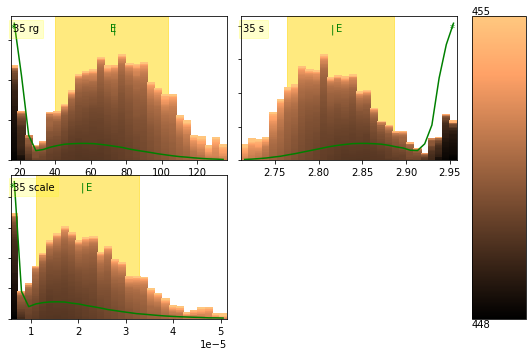

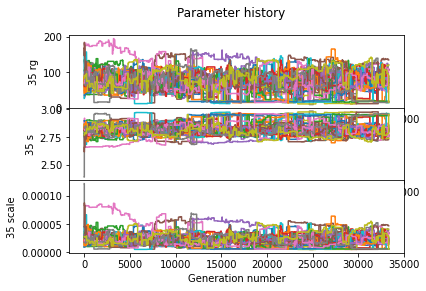

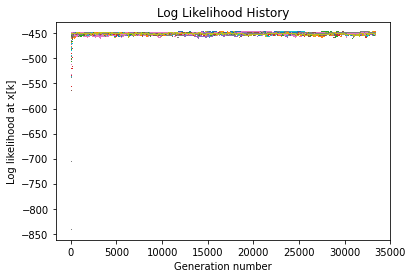

In [16]:
temp_results = {}
kernel=load_model("guinier_porod")

refit_keys = [35]
for key in refit_keys:
    
    # loading the data
    sans = sans_data[key][1]
    usans = sans_data[key][0]
    
    if usans is not None:
    
        # initial parameter values
        scale = Parameter(ps_scales[key], name = str(key) + ' scale')
        background = Parameter(ps_backgrounds[key], name = str(key) + ' background')
        porod_exp = Parameter(ps_porod_exp, name = 'ps porod_exp')
        s = Parameter(2.9, name = str(key) + ' s')
        rg = Parameter(100, name = str(key) + ' rg')
        
        # setting up the power_law model for fitting
        sans_model = Model(kernel, scale=scale, background=background,  porod_exp=porod_exp, s=s, rg=rg)
        usans_model = Model(kernel, scale=scale, background=background,  porod_exp=porod_exp, s=s, rg=rg)

        # setting parameter ranges as needed
        sans_model.scale.range(0,1)
        sans_model.s.range(2,3)
        sans_model.rg.range(0,1000)
        
        usans_model.scale.range(0,1)
        usans_model.s.range(2,3)
        usans_model.rg.range(0,1000)

        sans_experiment=Experiment(data=sans, model=sans_model)
        usans_experiment=Experiment(data=usans, model=usans_model)
        
        usans_smearing = sasmodels.resolution.Slit1D(usans.x, 0.117)
        usans_experiment.resolution = usans_smearing
    
        experiment = [sans_experiment, usans_experiment]

        problem=FitProblem(experiment)
        result=fit(problem,method='dream', samples=1e6, verbose=True)
        #result.state.show(figfile='../data/sans/PS_Fitting/ps_fit_results/guinier_porod_rg/CMW' + str(key) + '_rg')
        plt.close()
        #result=fit(problem,method='lm', verbose=True)
        
        temp_results[key] = problem


Fitting the guinier_porod model to determine final scales and overall common s parameter.

# steps: 46154, # draws: 6000020
step 1 cost 1213.8382(100)
                                   21 rg |.........    94.5231 in (0,1000)
                                    ps s ....|.....        2.5 in (2,3)
                                21 scale |......... 8.92965e-05 in (0,1)
                                   28 rg ..|.......    223.721 in (0,1000)
                                28 scale |......... 0.000274793 in (0,1)
                                   35 rg |.........    18.5198 in (0,1000)
                                35 scale |......... 0.000212731 in (0,1)
                                  113 rg |.........  0.0081531 in (0,1000)
                               113 scale |......... 4.89567e-05 in (0,1)
                                  409 rg |.........    47.1927 in (0,1000)
                               409 scale |......... 0.000197894 in (0,1)
                                  506 rg |.........    52.6439 in (0,1000)
                               506 scale |......... 0

step 349 cost 8.4182(100)
step 352 cost 8.4182(100)
step 355 cost 7.9767(100)
step 358 cost 7.9767(100)
step 361 cost 7.9767(100)
step 364 cost 7.9767(100)
step 366 cost 7.9767(100)
step 368 cost 7.9767(100)
step 370 cost 7.9767(100)
step 373 cost 7.9767(100)
step 376 cost 7.9767(100)
step 379 cost 6.4415(100)
step 382 cost 6.4415(100)
step 385 cost 6.4415(100)
step 388 cost 6.4415(100)
step 391 cost 6.4415(100)
step 394 cost 6.4415(100)
step 397 cost 6.4415(100)
step 400 cost 6.4415(100)
step 403 cost 6.4415(100)
step 406 cost 6.4415(100)
step 409 cost 6.4415(100)
step 412 cost 6.4415(100)
                                   21 rg ..|.......    275.897 in (0,1000)
                                    ps s .|........    2.17305 in (2,3)
                                21 scale |......... 0.00241664 in (0,1)
                                   28 rg .......|..     760.37 in (0,1000)
                                28 scale |......... 0.00693005 in (0,1)
                                   3

step 733 cost 6.2664(100)
step 736 cost 6.2664(100)
step 739 cost 6.2664(100)
step 742 cost 6.2664(100)
                                   21 rg ..|.......    263.972 in (0,1000)
                                    ps s .|........    2.17345 in (2,3)
                                21 scale |......... 0.00236223 in (0,1)
                                   28 rg .......|..    790.012 in (0,1000)
                                28 scale |......... 0.00727696 in (0,1)
                                   35 rg ..|.......    203.972 in (0,1000)
                                35 scale |......... 0.000977373 in (0,1)
                                  113 rg |.........    44.2299 in (0,1000)
                               113 scale |......... 0.00034053 in (0,1)
                                  409 rg ...|......    376.122 in (0,1000)
                               409 scale |......... 0.00284426 in (0,1)
                                  506 rg ...|......    321.997 in (0,1000)
             

step 1076 cost 6.1932(100)
step 1079 cost 6.1932(100)
step 1082 cost 6.1932(100)
step 1084 cost 6.1932(100)
step 1087 cost 6.1932(100)
step 1090 cost 6.1932(100)
step 1093 cost 6.1932(100)
step 1096 cost 6.1932(100)
step 1099 cost 6.1932(100)
step 1102 cost 6.1932(100)
step 1105 cost 6.1932(100)
step 1108 cost 6.1932(100)
step 1111 cost 6.1932(100)
step 1114 cost 6.1932(100)
step 1117 cost 6.1932(100)
step 1120 cost 6.1932(100)
step 1123 cost 6.1932(100)
step 1126 cost 6.1932(100)
step 1129 cost 6.1932(100)
step 1131 cost 6.1932(100)
step 1134 cost 6.1932(100)
step 1137 cost 6.1932(100)
                                   21 rg ..|.......    252.046 in (0,1000)
                                    ps s ..|.......    2.22632 in (2,3)
                                21 scale |......... 0.00171331 in (0,1)
                                   28 rg .......|..    733.697 in (0,1000)
                                28 scale |.........  0.0047125 in (0,1)
                                   35 rg

step 1447 cost 6.1422(100)
step 1450 cost 6.1422(100)
step 1453 cost 6.1422(100)
step 1456 cost 6.1422(100)
step 1459 cost 5.9225(100)
step 1462 cost 5.9225(100)
step 1465 cost 5.9225(100)
                                   21 rg ..|.......    220.298 in (0,1000)
                                    ps s ..|.......     2.2322 in (2,3)
                                21 scale |......... 0.00135458 in (0,1)
                                   28 rg .......|..     708.76 in (0,1000)
                                28 scale |......... 0.00453984 in (0,1)
                                   35 rg .|........    184.287 in (0,1000)
                                35 scale |......... 0.000669887 in (0,1)
                                  113 rg |.........    36.8294 in (0,1000)
                               113 scale |......... 0.000245605 in (0,1)
                                  409 rg ....|.....    435.934 in (0,1000)
                               409 scale |......... 0.00252066 in (0,1)
  

step 1803 cost 5.7276(100)
step 1806 cost 5.7276(100)
step 1809 cost 5.7276(100)
step 1812 cost 5.7276(100)
step 1815 cost 5.7276(100)
step 1818 cost 5.7276(100)
step 1821 cost 5.7276(100)
step 1824 cost 5.7276(100)
step 1827 cost 5.7276(100)
step 1830 cost 5.7276(100)
step 1833 cost 5.7276(100)
step 1836 cost 5.7276(100)
step 1839 cost 5.7276(100)
step 1842 cost 5.7276(100)
step 1845 cost 5.7276(100)
step 1848 cost 5.7276(100)
step 1851 cost 5.7276(100)
step 1853 cost 5.7276(100)
step 1856 cost 5.7276(100)
step 1859 cost 5.7276(100)
step 1862 cost 5.7276(100)
step 1865 cost 5.7276(100)
                                   21 rg .|........    183.098 in (0,1000)
                                    ps s ..|.......    2.24484 in (2,3)
                                21 scale |......... 0.00105927 in (0,1)
                                   28 rg ......|...    657.649 in (0,1000)
                                28 scale |......... 0.00359452 in (0,1)
                                   35 rg

step 2180 cost 5.6544(100)
step 2182 cost 5.6544(100)
step 2185 cost 5.6544(100)
step 2188 cost 5.6544(100)
step 2191 cost 5.6544(100)
step 2194 cost 5.6544(100)
step 2197 cost 5.6544(100)
step 2200 cost 5.6544(100)
                                   21 rg .|........     179.44 in (0,1000)
                                    ps s ..|.......    2.24932 in (2,3)
                                21 scale |......... 0.000992965 in (0,1)
                                   28 rg ......|...    654.348 in (0,1000)
                                28 scale |......... 0.00337467 in (0,1)
                                   35 rg .....|....    544.214 in (0,1000)
                                35 scale |......... 0.00231367 in (0,1)
                                  113 rg |.........    45.6195 in (0,1000)
                               113 scale |......... 0.000257744 in (0,1)
                                  409 rg .....|....    590.897 in (0,1000)
                               409 scale |.....

step 2535 cost 5.5492(100)
step 2538 cost 5.5492(100)
step 2541 cost 5.5492(100)
step 2544 cost 5.5492(100)
step 2547 cost 5.5492(100)
step 2550 cost 5.5492(100)
step 2553 cost 5.5492(100)
step 2556 cost 5.5492(100)
step 2559 cost 5.5492(100)
step 2562 cost 5.5492(100)
step 2565 cost 5.5492(100)
step 2568 cost 5.5492(100)
step 2571 cost 5.5492(100)
step 2574 cost 5.5492(100)
step 2577 cost 5.5492(100)
step 2580 cost 5.5492(100)
step 2583 cost 5.5492(100)
step 2586 cost 5.5492(100)
step 2589 cost 5.5492(100)
step 2592 cost 5.5492(100)
step 2595 cost 5.5492(100)
step 2598 cost 5.5492(100)
                                   21 rg .|........    191.464 in (0,1000)
                                    ps s ..|.......     2.2645 in (2,3)
                                21 scale |......... 0.000979121 in (0,1)
                                   28 rg ......|...    637.587 in (0,1000)
                                28 scale |.........  0.0031036 in (0,1)
                                   35 r

step 2849 cost 5.5492(100)
step 2851 cost 5.5492(100)
step 2853 cost 5.5492(100)
step 2856 cost 5.5492(100)
step 2859 cost 5.5492(100)
step 2862 cost 5.5492(100)
step 2865 cost 5.5492(100)
step 2868 cost 5.5492(100)
step 2871 cost 5.5492(100)
step 2874 cost 5.5492(100)
                                   21 rg .|........    191.464 in (0,1000)
                                    ps s ..|.......     2.2645 in (2,3)
                                21 scale |......... 0.000979121 in (0,1)
                                   28 rg ......|...    637.587 in (0,1000)
                                28 scale |.........  0.0031036 in (0,1)
                                   35 rg .....|....    502.716 in (0,1000)
                                35 scale |......... 0.00205313 in (0,1)
                                  113 rg |.........    55.6381 in (0,1000)
                               113 scale |......... 0.000272856 in (0,1)
                                  409 rg ......|...    611.301 in (0

step 3213 cost 5.5492(100)
step 3216 cost 5.5492(100)
step 3219 cost 5.5492(100)
step 3222 cost 5.5492(100)
step 3225 cost 5.5492(100)
step 3228 cost 5.5492(100)
step 3231 cost 5.5492(100)
step 3234 cost 5.5492(100)
step 3237 cost 5.5492(100)
step 3240 cost 5.5492(100)
step 3243 cost 5.5492(100)
step 3246 cost 5.5492(100)
step 3249 cost 5.5492(100)
step 3252 cost 5.5492(100)
step 3255 cost 5.5492(100)
step 3258 cost 5.5492(100)
step 3261 cost 5.5492(100)
step 3264 cost 5.5492(100)
step 3267 cost 5.5492(100)
step 3270 cost 5.5492(100)
step 3273 cost 5.5492(100)
step 3276 cost 5.5492(100)
step 3279 cost 5.5492(100)
                                   21 rg .|........    191.464 in (0,1000)
                                    ps s ..|.......     2.2645 in (2,3)
                                21 scale |......... 0.000979121 in (0,1)
                                   28 rg ......|...    637.587 in (0,1000)
                                28 scale |.........  0.0031036 in (0,1)
            

step 3584 cost 5.4987(100)
step 3587 cost 5.4987(100)
step 3590 cost 5.4987(100)
step 3593 cost 5.4987(100)
step 3596 cost 5.4987(100)
step 3599 cost 5.4987(100)
step 3602 cost 5.4987(100)
step 3605 cost 5.4987(100)
step 3608 cost 5.4987(100)
step 3611 cost 5.4987(100)
                                   21 rg .|........    191.674 in (0,1000)
                                    ps s ..|.......    2.26179 in (2,3)
                                21 scale |......... 0.000998928 in (0,1)
                                   28 rg ......|...    645.711 in (0,1000)
                                28 scale |......... 0.00327975 in (0,1)
                                   35 rg ....|.....    497.783 in (0,1000)
                                35 scale |......... 0.00204958 in (0,1)
                                  113 rg |.........    55.8952 in (0,1000)
                               113 scale |......... 0.000278488 in (0,1)
                                  409 rg ......|...    604.118 in (0

step 3956 cost 5.4987(100)
step 3959 cost 5.4987(100)
step 3962 cost 5.4987(100)
step 3965 cost 5.4987(100)
step 3968 cost 5.4987(100)
step 3971 cost 5.4987(100)
step 3974 cost 5.4987(100)
step 3977 cost 5.4987(100)
step 3980 cost 5.4987(100)
step 3983 cost 5.4987(100)
step 3986 cost 5.4987(100)
step 3989 cost 5.4987(100)
step 3992 cost 5.4987(100)
step 3995 cost 5.4987(100)
step 3998 cost 5.4987(100)
step 4001 cost 5.4987(100)
step 4004 cost 5.4987(100)
step 4007 cost 5.4987(100)
step 4010 cost 5.4987(100)
step 4012 cost 5.4987(100)
step 4015 cost 5.4987(100)
step 4018 cost 5.4987(100)
step 4021 cost 5.4987(100)
                                   21 rg .|........    191.674 in (0,1000)
                                    ps s ..|.......    2.26179 in (2,3)
                                21 scale |......... 0.000998928 in (0,1)
                                   28 rg ......|...    645.711 in (0,1000)
                                28 scale |......... 0.00327975 in (0,1)
            

step 4332 cost 5.4561(100)
step 4335 cost 5.4561(100)
step 4338 cost 5.4561(100)
step 4341 cost 5.4561(100)
step 4344 cost 5.4561(100)
step 4347 cost 5.4561(100)
step 4350 cost 5.4561(100)
step 4353 cost 5.4561(100)
step 4356 cost 5.4561(100)
step 4359 cost 5.4561(100)
step 4362 cost 5.4561(100)
step 4365 cost 5.4561(100)
                                   21 rg .|........    187.144 in (0,1000)
                                    ps s ..|.......    2.26196 in (2,3)
                                21 scale |......... 0.000968947 in (0,1)
                                   28 rg ......|...    650.747 in (0,1000)
                                28 scale |......... 0.00330051 in (0,1)
                                   35 rg .....|....     511.26 in (0,1000)
                                35 scale |......... 0.00209112 in (0,1)
                                  113 rg |.........    54.6704 in (0,1000)
                               113 scale |......... 0.00027307 in (0,1)
               

                                   21 rg .|........    187.144 in (0,1000)
                                    ps s ..|.......    2.26196 in (2,3)
                                21 scale |......... 0.000968947 in (0,1)
                                   28 rg ......|...    650.747 in (0,1000)
                                28 scale |......... 0.00330051 in (0,1)
                                   35 rg .....|....     511.26 in (0,1000)
                                35 scale |......... 0.00209112 in (0,1)
                                  113 rg |.........    54.6704 in (0,1000)
                               113 scale |......... 0.00027307 in (0,1)
                                  409 rg ......|...      606.2 in (0,1000)
                               409 scale |......... 0.00330193 in (0,1)
                                  506 rg ...|......    348.103 in (0,1000)
                               506 scale |......... 0.00252856 in (0,1)
step 4707 cost 5.4561(100)
step 4710 cost 5.4

step 5016 cost 5.4210(100)
step 5018 cost 5.4210(100)
step 5021 cost 5.4210(100)
step 5024 cost 5.4210(100)
step 5027 cost 5.4210(100)
step 5030 cost 5.4210(100)
step 5033 cost 5.4210(100)
step 5036 cost 5.4210(100)
step 5038 cost 5.4210(100)
step 5040 cost 5.4210(100)
step 5043 cost 5.4210(100)
step 5046 cost 5.4210(100)
step 5049 cost 5.4210(100)
step 5052 cost 5.4210(100)
step 5055 cost 5.4210(100)
step 5058 cost 5.4210(100)
step 5061 cost 5.4210(100)
step 5064 cost 5.4210(100)
step 5067 cost 5.4210(100)
step 5070 cost 5.4210(100)
step 5073 cost 5.4210(100)
step 5076 cost 5.4210(100)
step 5079 cost 5.4210(100)
                                   21 rg .|........    133.345 in (0,1000)
                                    ps s ...|......     2.3296 in (2,3)
                                21 scale |......... 0.00046521 in (0,1)
                                   28 rg ....|.....    445.827 in (0,1000)
                                28 scale |......... 0.00141661 in (0,1)
             

step 5393 cost 5.4210(100)
step 5396 cost 5.4210(100)
step 5399 cost 5.4210(100)
step 5402 cost 5.4210(100)
step 5405 cost 5.4210(100)
step 5408 cost 5.4210(100)
step 5411 cost 5.4210(100)
step 5414 cost 5.4210(100)
                                   21 rg .|........    133.345 in (0,1000)
                                    ps s ...|......     2.3296 in (2,3)
                                21 scale |......... 0.00046521 in (0,1)
                                   28 rg ....|.....    445.827 in (0,1000)
                                28 scale |......... 0.00141661 in (0,1)
                                   35 rg ...|......    381.966 in (0,1000)
                                35 scale |......... 0.00103666 in (0,1)
                                  113 rg |.........    42.1184 in (0,1000)
                               113 scale |......... 0.00017421 in (0,1)
                                  409 rg .....|....    516.315 in (0,1000)
                               409 scale |.......

step 5745 cost 5.4210(100)
step 5748 cost 5.4210(100)
step 5750 cost 5.4210(100)
step 5753 cost 5.4210(100)
step 5756 cost 5.4210(100)
step 5759 cost 5.4210(100)
step 5761 cost 5.4210(100)
step 5764 cost 5.4210(100)
step 5767 cost 5.4210(100)
step 5770 cost 5.4210(100)
step 5773 cost 5.4210(100)
step 5776 cost 5.4210(100)
step 5779 cost 5.4210(100)
step 5782 cost 5.4210(100)
step 5785 cost 5.4210(100)
step 5787 cost 5.4210(100)
step 5790 cost 5.4210(100)
step 5792 cost 5.4210(100)
step 5794 cost 5.4210(100)
step 5797 cost 5.4210(100)
step 5800 cost 5.4210(100)
step 5803 cost 5.4210(100)
step 5806 cost 5.4210(100)
                                   21 rg .|........    133.345 in (0,1000)
                                    ps s ...|......     2.3296 in (2,3)
                                21 scale |......... 0.00046521 in (0,1)
                                   28 rg ....|.....    445.827 in (0,1000)
                                28 scale |......... 0.00141661 in (0,1)
             

step 6115 cost 5.4210(100)
step 6118 cost 5.4210(100)
step 6121 cost 5.4210(100)
step 6124 cost 5.4210(100)
step 6127 cost 5.4210(100)
step 6130 cost 5.4210(100)
step 6133 cost 5.4210(100)
step 6136 cost 5.4210(100)
                                   21 rg .|........    133.345 in (0,1000)
                                    ps s ...|......     2.3296 in (2,3)
                                21 scale |......... 0.00046521 in (0,1)
                                   28 rg ....|.....    445.827 in (0,1000)
                                28 scale |......... 0.00141661 in (0,1)
                                   35 rg ...|......    381.966 in (0,1000)
                                35 scale |......... 0.00103666 in (0,1)
                                  113 rg |.........    42.1184 in (0,1000)
                               113 scale |......... 0.00017421 in (0,1)
                                  409 rg .....|....    516.315 in (0,1000)
                               409 scale |.......

step 6474 cost 5.4188(100)
step 6477 cost 5.4188(100)
step 6480 cost 5.4188(100)
step 6483 cost 5.4188(100)
step 6486 cost 5.4188(100)
step 6489 cost 5.4188(100)
step 6492 cost 5.4188(100)
step 6495 cost 5.4188(100)
step 6498 cost 5.4188(100)
step 6501 cost 5.4188(100)
step 6504 cost 5.4188(100)
step 6507 cost 5.4188(100)
step 6510 cost 5.4188(100)
step 6513 cost 5.4188(100)
step 6516 cost 5.4188(100)
step 6519 cost 5.4188(100)
step 6522 cost 5.4188(100)
step 6525 cost 5.4188(100)
step 6528 cost 5.4188(100)
step 6531 cost 5.4188(100)
step 6534 cost 5.4188(100)
step 6537 cost 5.4188(100)
                                   21 rg .|........    134.124 in (0,1000)
                                    ps s ...|......     2.3284 in (2,3)
                                21 scale |......... 0.000474916 in (0,1)
                                   28 rg ....|.....    448.988 in (0,1000)
                                28 scale |......... 0.00145982 in (0,1)
                                   35 r

step 6852 cost 5.4169(100)
step 6855 cost 5.4169(100)
step 6858 cost 5.4169(100)
step 6861 cost 5.4169(100)
step 6864 cost 5.4169(100)
step 6867 cost 5.4169(100)
step 6870 cost 5.4169(100)
step 6873 cost 5.4169(100)
                                   21 rg .|........    181.482 in (0,1000)
                                    ps s ..|.......    2.26797 in (2,3)
                                21 scale |......... 0.000907463 in (0,1)
                                   28 rg ......|...     667.26 in (0,1000)
                                28 scale |......... 0.00331299 in (0,1)
                                   35 rg .....|....    558.267 in (0,1000)
                                35 scale |.........  0.0022482 in (0,1)
                                  113 rg |.........    45.8722 in (0,1000)
                               113 scale |......... 0.000233287 in (0,1)
                                  409 rg ......|...    663.208 in (0,1000)
                               409 scale |.....

step 7209 cost 5.4159(100)
step 7212 cost 5.4159(100)
step 7215 cost 5.4159(100)
step 7218 cost 5.4159(100)
step 7221 cost 5.4159(100)
step 7224 cost 5.4159(100)
step 7227 cost 5.4159(100)
step 7230 cost 5.4159(100)
step 7233 cost 5.4159(100)
step 7236 cost 5.4159(100)
step 7239 cost 5.4159(100)
step 7242 cost 5.4159(100)
step 7245 cost 5.4159(100)
step 7247 cost 5.4159(100)
step 7250 cost 5.4159(100)
step 7252 cost 5.4159(100)
step 7255 cost 5.4159(100)
step 7258 cost 5.4159(100)
step 7261 cost 5.4159(100)
step 7264 cost 5.4159(100)
step 7266 cost 5.4159(100)
step 7268 cost 5.4159(100)
step 7269 cost 5.4159(100)
                                   21 rg .|........    180.209 in (0,1000)
                                    ps s ..|.......    2.26931 in (2,3)
                                21 scale |......... 0.000896043 in (0,1)
                                   28 rg ......|...    643.237 in (0,1000)
                                28 scale |......... 0.00316705 in (0,1)
            

step 7505 cost 5.3712(100)
step 7508 cost 5.3712(100)
step 7511 cost 5.3712(100)
step 7514 cost 5.3712(100)
step 7516 cost 5.3712(100)
step 7519 cost 5.3712(100)
step 7522 cost 5.3712(100)
step 7525 cost 5.3712(100)
step 7528 cost 5.3712(100)
step 7531 cost 5.3712(100)
step 7534 cost 5.3712(100)
step 7537 cost 5.3712(100)
step 7540 cost 5.3712(100)
step 7543 cost 5.3712(100)
step 7546 cost 5.3712(100)
step 7549 cost 5.3712(100)
step 7552 cost 5.3712(100)
step 7555 cost 5.3712(100)
                                   21 rg .|........     146.09 in (0,1000)
                                    ps s ...|......    2.32822 in (2,3)
                                21 scale |......... 0.000529714 in (0,1)
                                   28 rg ....|.....     497.06 in (0,1000)
                                28 scale |......... 0.00165996 in (0,1)
                                   35 rg ...|......    393.032 in (0,1000)
                                35 scale |......... 0.00106537 in (0,1)


step 7817 cost 5.3712(100)
step 7820 cost 5.3712(100)
step 7823 cost 5.3712(100)
step 7826 cost 5.3712(100)
step 7829 cost 5.3712(100)
step 7831 cost 5.3712(100)
                                   21 rg .|........     146.09 in (0,1000)
                                    ps s ...|......    2.32822 in (2,3)
                                21 scale |......... 0.000529714 in (0,1)
                                   28 rg ....|.....     497.06 in (0,1000)
                                28 scale |......... 0.00165996 in (0,1)
                                   35 rg ...|......    393.032 in (0,1000)
                                35 scale |......... 0.00106537 in (0,1)
                                  113 rg |.........    45.5967 in (0,1000)
                               113 scale |......... 0.000183764 in (0,1)
                                  409 rg .....|....    512.262 in (0,1000)
                               409 scale |......... 0.00179376 in (0,1)
                             

step 8154 cost 5.3627(100)
step 8157 cost 5.3627(100)
step 8160 cost 5.3627(100)
step 8163 cost 5.3627(100)
step 8166 cost 5.3627(100)
step 8169 cost 5.3627(100)
step 8172 cost 5.3627(100)
step 8175 cost 5.3627(100)
step 8178 cost 5.3627(100)
step 8181 cost 5.3627(100)
step 8184 cost 5.3627(100)
step 8187 cost 5.3627(100)
step 8190 cost 5.3627(100)
step 8193 cost 5.3627(100)
step 8196 cost 5.3627(100)
step 8199 cost 5.3627(100)
step 8202 cost 5.3627(100)
step 8205 cost 5.3627(100)
step 8208 cost 5.3627(100)
step 8211 cost 5.3627(100)
step 8214 cost 5.3627(100)
step 8217 cost 5.3627(100)
                                   21 rg .|........    145.576 in (0,1000)
                                    ps s ...|......    2.32894 in (2,3)
                                21 scale |......... 0.000524291 in (0,1)
                                   28 rg ....|.....    494.273 in (0,1000)
                                28 scale |......... 0.00163287 in (0,1)
                                   35 r

step 8532 cost 5.3627(100)
step 8535 cost 5.3627(100)
step 8538 cost 5.3627(100)
step 8541 cost 5.3627(100)
step 8544 cost 5.3627(100)
step 8547 cost 5.3627(100)
                                   21 rg .|........    145.576 in (0,1000)
                                    ps s ...|......    2.32894 in (2,3)
                                21 scale |......... 0.000524291 in (0,1)
                                   28 rg ....|.....    494.273 in (0,1000)
                                28 scale |......... 0.00163287 in (0,1)
                                   35 rg ...|......    392.256 in (0,1000)
                                35 scale |......... 0.00105672 in (0,1)
                                  113 rg |.........    45.6014 in (0,1000)
                               113 scale |......... 0.000183184 in (0,1)
                                  409 rg .....|....    511.862 in (0,1000)
                               409 scale |......... 0.00178184 in (0,1)
                             

step 8883 cost 5.3570(100)
step 8886 cost 5.3570(100)
step 8889 cost 5.3570(100)
step 8892 cost 5.3570(100)
step 8895 cost 5.3570(100)
step 8898 cost 5.3570(100)
step 8901 cost 5.3570(100)
step 8904 cost 5.3570(100)
step 8907 cost 5.3570(100)
step 8910 cost 5.3570(100)
step 8913 cost 5.3570(100)
step 8916 cost 5.3570(100)
step 8919 cost 5.3570(100)
step 8922 cost 5.3570(100)
step 8925 cost 5.3570(100)
step 8928 cost 5.3570(100)
step 8931 cost 5.2890(100)
step 8934 cost 5.2890(100)
step 8937 cost 5.2890(100)
step 8940 cost 5.2890(100)
step 8943 cost 5.2890(100)
step 8946 cost 5.2890(100)
                                   21 rg .|........    146.027 in (0,1000)
                                    ps s ...|......    2.30365 in (2,3)
                                21 scale |......... 0.00058364 in (0,1)
                                   28 rg .....|....    525.784 in (0,1000)
                                28 scale |......... 0.00199779 in (0,1)
                                   35 rg

step 9255 cost 5.2890(100)
step 9258 cost 5.2890(100)
step 9261 cost 5.2890(100)
step 9264 cost 5.2890(100)
step 9267 cost 5.2890(100)
step 9270 cost 5.2890(100)
step 9273 cost 5.2890(100)
                                   21 rg .|........    146.027 in (0,1000)
                                    ps s ...|......    2.30365 in (2,3)
                                21 scale |......... 0.00058364 in (0,1)
                                   28 rg .....|....    525.784 in (0,1000)
                                28 scale |......... 0.00199779 in (0,1)
                                   35 rg ....|.....    451.105 in (0,1000)
                                35 scale |......... 0.00140094 in (0,1)
                                  113 rg |.........    41.2541 in (0,1000)
                               113 scale |......... 0.000185165 in (0,1)
                                  409 rg .....|....    500.155 in (0,1000)
                               409 scale |......... 0.00203245 in (0,1)
   

step 9608 cost 5.2890(100)
step 9611 cost 5.2890(100)
step 9614 cost 5.2890(100)
step 9617 cost 5.2890(100)
step 9620 cost 5.2890(100)
step 9623 cost 5.2890(100)
step 9626 cost 5.2890(100)
step 9628 cost 5.2890(100)
step 9630 cost 5.2890(100)
step 9633 cost 5.2890(100)
step 9636 cost 5.2890(100)
step 9639 cost 5.2890(100)
step 9642 cost 5.2890(100)
step 9645 cost 5.2890(100)
step 9648 cost 5.2890(100)
step 9651 cost 5.2890(100)
step 9654 cost 5.2890(100)
step 9657 cost 5.2890(100)
step 9659 cost 5.2890(100)
step 9662 cost 5.2890(100)
step 9665 cost 5.2890(100)
step 9668 cost 5.2890(100)
                                   21 rg .|........    146.027 in (0,1000)
                                    ps s ...|......    2.30365 in (2,3)
                                21 scale |......... 0.00058364 in (0,1)
                                   28 rg .....|....    525.784 in (0,1000)
                                28 scale |......... 0.00199779 in (0,1)
                                   35 rg

step 9983 cost 5.2890(100)
step 9986 cost 5.2890(100)
step 9989 cost 5.2890(100)
step 9992 cost 5.2890(100)
step 9995 cost 5.2890(100)
step 9998 cost 5.2890(100)
step 10001 cost 5.2890(100)
step 10004 cost 5.2890(100)
                                   21 rg .|........    146.027 in (0,1000)
                                    ps s ...|......    2.30365 in (2,3)
                                21 scale |......... 0.00058364 in (0,1)
                                   28 rg .....|....    525.784 in (0,1000)
                                28 scale |......... 0.00199779 in (0,1)
                                   35 rg ....|.....    451.105 in (0,1000)
                                35 scale |......... 0.00140094 in (0,1)
                                  113 rg |.........    41.2541 in (0,1000)
                               113 scale |......... 0.000185165 in (0,1)
                                  409 rg .....|....    500.155 in (0,1000)
                               409 scale |....

step 10342 cost 5.2862(100)
step 10345 cost 5.2862(100)
step 10348 cost 5.2862(100)
step 10351 cost 5.2862(100)
step 10354 cost 5.2862(100)
step 10357 cost 5.2862(100)
step 10360 cost 5.2862(100)
step 10363 cost 5.2862(100)
step 10366 cost 5.2862(100)
step 10369 cost 5.2862(100)
step 10372 cost 5.2862(100)
step 10375 cost 5.2862(100)
step 10378 cost 5.2862(100)
step 10381 cost 5.2862(100)
step 10384 cost 5.2862(100)
step 10387 cost 5.2862(100)
step 10390 cost 5.2862(100)
step 10393 cost 5.2862(100)
step 10396 cost 5.2862(100)
step 10399 cost 5.2862(100)
step 10402 cost 5.2862(100)
step 10405 cost 5.2862(100)
                                   21 rg .|........    146.443 in (0,1000)
                                    ps s ...|......    2.30264 in (2,3)
                                21 scale |......... 0.000590284 in (0,1)
                                   28 rg .....|....    527.091 in (0,1000)
                                28 scale |......... 0.00202467 in (0,1)
                 

step 10707 cost 5.2862(100)
step 10710 cost 5.2862(100)
step 10713 cost 5.2862(100)
step 10716 cost 5.2862(100)
step 10719 cost 5.2862(100)
step 10721 cost 5.2862(100)
step 10724 cost 5.2862(100)
step 10727 cost 5.2862(100)
step 10730 cost 5.2862(100)
step 10733 cost 5.2862(100)
step 10736 cost 5.2862(100)
step 10739 cost 5.2862(100)
                                   21 rg .|........    146.443 in (0,1000)
                                    ps s ...|......    2.30264 in (2,3)
                                21 scale |......... 0.000590284 in (0,1)
                                   28 rg .....|....    527.091 in (0,1000)
                                28 scale |......... 0.00202467 in (0,1)
                                   35 rg ....|.....     451.86 in (0,1000)
                                35 scale |......... 0.00141683 in (0,1)
                                  113 rg |.........    41.3694 in (0,1000)
                               113 scale |......... 0.000186747 in (0,1)
  

step 11070 cost 5.2862(100)
step 11073 cost 5.2862(100)
                                   21 rg .|........    146.443 in (0,1000)
                                    ps s ...|......    2.30264 in (2,3)
                                21 scale |......... 0.000590284 in (0,1)
                                   28 rg .....|....    527.091 in (0,1000)
                                28 scale |......... 0.00202467 in (0,1)
                                   35 rg ....|.....     451.86 in (0,1000)
                                35 scale |......... 0.00141683 in (0,1)
                                  113 rg |.........    41.3694 in (0,1000)
                               113 scale |......... 0.000186747 in (0,1)
                                  409 rg ....|.....    498.825 in (0,1000)
                               409 scale |......... 0.00203735 in (0,1)
                                  506 rg ..|.......    284.914 in (0,1000)
                               506 scale |......... 0.001652

step 11409 cost 5.2862(100)
step 11412 cost 5.2862(100)
step 11415 cost 5.2862(100)
step 11418 cost 5.2862(100)
step 11421 cost 5.2862(100)
step 11424 cost 5.2862(100)
step 11427 cost 5.2862(100)
step 11430 cost 5.2862(100)
step 11433 cost 5.2862(100)
step 11436 cost 5.2862(100)
step 11439 cost 5.2862(100)
step 11442 cost 5.2862(100)
step 11445 cost 5.2862(100)
step 11448 cost 5.2862(100)
step 11451 cost 5.2862(100)
step 11454 cost 5.2862(100)
step 11457 cost 5.2862(100)
step 11460 cost 5.2862(100)
step 11463 cost 5.2862(100)
step 11466 cost 5.2862(100)
step 11469 cost 5.2862(100)
step 11472 cost 5.2862(100)
                                   21 rg .|........    146.443 in (0,1000)
                                    ps s ...|......    2.30264 in (2,3)
                                21 scale |......... 0.000590284 in (0,1)
                                   28 rg .....|....    527.091 in (0,1000)
                                28 scale |......... 0.00202467 in (0,1)
                 

step 11774 cost 5.2862(100)
step 11777 cost 5.2862(100)
step 11780 cost 5.2862(100)
step 11783 cost 5.2862(100)
step 11786 cost 5.2862(100)
step 11789 cost 5.2862(100)
step 11792 cost 5.2862(100)
step 11795 cost 5.2862(100)
step 11798 cost 5.2862(100)
step 11801 cost 5.2862(100)
step 11804 cost 5.2862(100)
                                   21 rg .|........    146.443 in (0,1000)
                                    ps s ...|......    2.30264 in (2,3)
                                21 scale |......... 0.000590284 in (0,1)
                                   28 rg .....|....    527.091 in (0,1000)
                                28 scale |......... 0.00202467 in (0,1)
                                   35 rg ....|.....     451.86 in (0,1000)
                                35 scale |......... 0.00141683 in (0,1)
                                  113 rg |.........    41.3694 in (0,1000)
                               113 scale |......... 0.000186747 in (0,1)
                              

step 12138 cost 5.2862(100)
                                   21 rg .|........    146.443 in (0,1000)
                                    ps s ...|......    2.30264 in (2,3)
                                21 scale |......... 0.000590284 in (0,1)
                                   28 rg .....|....    527.091 in (0,1000)
                                28 scale |......... 0.00202467 in (0,1)
                                   35 rg ....|.....     451.86 in (0,1000)
                                35 scale |......... 0.00141683 in (0,1)
                                  113 rg |.........    41.3694 in (0,1000)
                               113 scale |......... 0.000186747 in (0,1)
                                  409 rg ....|.....    498.825 in (0,1000)
                               409 scale |......... 0.00203735 in (0,1)
                                  506 rg ..|.......    284.914 in (0,1000)
                               506 scale |......... 0.00165237 in (0,1)
step 12141 cost 

step 12474 cost 5.2862(100)
step 12477 cost 5.2862(100)
step 12480 cost 5.2862(100)
step 12483 cost 5.2862(100)
step 12486 cost 5.2862(100)
step 12489 cost 5.2862(100)
step 12492 cost 5.2862(100)
step 12495 cost 5.2862(100)
step 12498 cost 5.2862(100)
step 12501 cost 5.2862(100)
step 12504 cost 5.2862(100)
step 12507 cost 5.2862(100)
step 12510 cost 5.2862(100)
step 12513 cost 5.2862(100)
step 12516 cost 5.2862(100)
step 12519 cost 5.2862(100)
step 12522 cost 5.2862(100)
step 12525 cost 5.2862(100)
step 12528 cost 5.2862(100)
step 12531 cost 5.2862(100)
step 12534 cost 5.2862(100)
step 12537 cost 5.2862(100)
                                   21 rg .|........    146.443 in (0,1000)
                                    ps s ...|......    2.30264 in (2,3)
                                21 scale |......... 0.000590284 in (0,1)
                                   28 rg .....|....    527.091 in (0,1000)
                                28 scale |......... 0.00202467 in (0,1)
                 

step 12839 cost 5.2862(100)
step 12842 cost 5.2862(100)
step 12845 cost 5.2862(100)
step 12848 cost 5.2862(100)
step 12851 cost 5.2862(100)
step 12854 cost 5.2862(100)
step 12857 cost 5.2862(100)
step 12860 cost 5.2862(100)
step 12863 cost 5.2862(100)
step 12866 cost 5.2862(100)
step 12869 cost 5.2862(100)
step 12872 cost 5.2862(100)
                                   21 rg .|........    146.443 in (0,1000)
                                    ps s ...|......    2.30264 in (2,3)
                                21 scale |......... 0.000590284 in (0,1)
                                   28 rg .....|....    527.091 in (0,1000)
                                28 scale |......... 0.00202467 in (0,1)
                                   35 rg ....|.....     451.86 in (0,1000)
                                35 scale |......... 0.00141683 in (0,1)
                                  113 rg |.........    41.3694 in (0,1000)
                               113 scale |......... 0.000186747 in (0,1)
  

step 13199 cost 5.2862(100)
step 13202 cost 5.2862(100)
step 13205 cost 5.2862(100)
                                   21 rg .|........    146.443 in (0,1000)
                                    ps s ...|......    2.30264 in (2,3)
                                21 scale |......... 0.000590284 in (0,1)
                                   28 rg .....|....    527.091 in (0,1000)
                                28 scale |......... 0.00202467 in (0,1)
                                   35 rg ....|.....     451.86 in (0,1000)
                                35 scale |......... 0.00141683 in (0,1)
                                  113 rg |.........    41.3694 in (0,1000)
                               113 scale |......... 0.000186747 in (0,1)
                                  409 rg ....|.....    498.825 in (0,1000)
                               409 scale |......... 0.00203735 in (0,1)
                                  506 rg ..|.......    284.914 in (0,1000)
                               5

step 13541 cost 5.2862(100)
step 13544 cost 5.2862(100)
step 13547 cost 5.2862(100)
step 13550 cost 5.2862(100)
step 13552 cost 5.2862(100)
step 13555 cost 5.2862(100)
step 13558 cost 5.2862(100)
step 13561 cost 5.2862(100)
step 13564 cost 5.2862(100)
step 13567 cost 5.2862(100)
step 13570 cost 5.2862(100)
step 13573 cost 5.2862(100)
step 13576 cost 5.2862(100)
step 13579 cost 5.2862(100)
step 13582 cost 5.2862(100)
step 13584 cost 5.2862(100)
step 13587 cost 5.2862(100)
step 13589 cost 5.2862(100)
step 13591 cost 5.2862(100)
step 13593 cost 5.2862(100)
step 13596 cost 5.2862(100)
step 13599 cost 5.2862(100)
step 13602 cost 5.2862(100)
step 13604 cost 5.2862(100)
                                   21 rg .|........    146.443 in (0,1000)
                                    ps s ...|......    2.30264 in (2,3)
                                21 scale |......... 0.000590284 in (0,1)
                                   28 rg .....|....    527.091 in (0,1000)
                                2

step 13894 cost 5.2862(100)
step 13897 cost 5.2862(100)
step 13900 cost 5.2862(100)
step 13903 cost 5.2862(100)
step 13906 cost 5.2862(100)
step 13909 cost 5.2862(100)
step 13912 cost 5.2862(100)
step 13915 cost 5.2862(100)
step 13918 cost 5.2862(100)
step 13921 cost 5.2862(100)
step 13924 cost 5.2862(100)
step 13927 cost 5.2862(100)
step 13930 cost 5.2862(100)
step 13933 cost 5.2862(100)
                                   21 rg .|........    146.443 in (0,1000)
                                    ps s ...|......    2.30264 in (2,3)
                                21 scale |......... 0.000590284 in (0,1)
                                   28 rg .....|....    527.091 in (0,1000)
                                28 scale |......... 0.00202467 in (0,1)
                                   35 rg ....|.....     451.86 in (0,1000)
                                35 scale |......... 0.00141683 in (0,1)
                                  113 rg |.........    41.3694 in (0,1000)
                   

step 14258 cost 5.2862(100)
step 14261 cost 5.2862(100)
step 14264 cost 5.2862(100)
step 14267 cost 5.2862(100)
                                   21 rg .|........    146.443 in (0,1000)
                                    ps s ...|......    2.30264 in (2,3)
                                21 scale |......... 0.000590284 in (0,1)
                                   28 rg .....|....    527.091 in (0,1000)
                                28 scale |......... 0.00202467 in (0,1)
                                   35 rg ....|.....     451.86 in (0,1000)
                                35 scale |......... 0.00141683 in (0,1)
                                  113 rg |.........    41.3694 in (0,1000)
                               113 scale |......... 0.000186747 in (0,1)
                                  409 rg ....|.....    498.825 in (0,1000)
                               409 scale |......... 0.00203735 in (0,1)
                                  506 rg ..|.......    284.914 in (0,1000)
    

step 14601 cost 5.2862(100)
step 14604 cost 5.2862(100)
step 14607 cost 5.2862(100)
step 14610 cost 5.2862(100)
step 14613 cost 5.2862(100)
step 14616 cost 5.2862(100)
step 14619 cost 5.2862(100)
step 14622 cost 5.2862(100)
step 14625 cost 5.2862(100)
step 14628 cost 5.2862(100)
step 14631 cost 5.2862(100)
step 14634 cost 5.2862(100)
step 14637 cost 5.2862(100)
step 14640 cost 5.2862(100)
step 14643 cost 5.2862(100)
step 14646 cost 5.2862(100)
step 14649 cost 5.2862(100)
step 14652 cost 5.2862(100)
step 14655 cost 5.2862(100)
step 14658 cost 5.2862(100)
step 14661 cost 5.2862(100)
step 14664 cost 5.2862(100)
step 14667 cost 5.2862(100)
                                   21 rg .|........    146.443 in (0,1000)
                                    ps s ...|......    2.30264 in (2,3)
                                21 scale |......... 0.000590284 in (0,1)
                                   28 rg .....|....    527.091 in (0,1000)
                                28 scale |......... 0.0020246

step 14962 cost 5.2862(100)
step 14965 cost 5.2862(100)
step 14968 cost 5.2862(100)
step 14971 cost 5.2862(100)
step 14974 cost 5.2862(100)
step 14977 cost 5.2862(100)
step 14980 cost 5.2862(100)
step 14983 cost 5.2862(100)
step 14986 cost 5.2862(100)
step 14989 cost 5.2862(100)
step 14992 cost 5.2862(100)
step 14995 cost 5.2862(100)
step 14998 cost 5.2862(100)
step 15001 cost 5.2862(100)
                                   21 rg .|........    146.443 in (0,1000)
                                    ps s ...|......    2.30264 in (2,3)
                                21 scale |......... 0.000590284 in (0,1)
                                   28 rg .....|....    527.091 in (0,1000)
                                28 scale |......... 0.00202467 in (0,1)
                                   35 rg ....|.....     451.86 in (0,1000)
                                35 scale |......... 0.00141683 in (0,1)
                                  113 rg |.........    41.3694 in (0,1000)
                   

step 15301 cost 5.2862(100)
step 15304 cost 5.2862(100)
step 15306 cost 5.2862(100)
step 15308 cost 5.2862(100)
step 15311 cost 5.2862(100)
step 15313 cost 5.2862(100)
step 15315 cost 5.2862(100)
                                   21 rg .|........    146.443 in (0,1000)
                                    ps s ...|......    2.30264 in (2,3)
                                21 scale |......... 0.000590284 in (0,1)
                                   28 rg .....|....    527.091 in (0,1000)
                                28 scale |......... 0.00202467 in (0,1)
                                   35 rg ....|.....     451.86 in (0,1000)
                                35 scale |......... 0.00141683 in (0,1)
                                  113 rg |.........    41.3694 in (0,1000)
                               113 scale |......... 0.000186747 in (0,1)
                                  409 rg ....|.....    498.825 in (0,1000)
                               409 scale |......... 0.00203735 in (

                                   21 rg .|........    168.312 in (0,1000)
                                    ps s ..|.......    2.27505 in (2,3)
                                21 scale |......... 0.000797089 in (0,1)
                                   28 rg .....|....    558.833 in (0,1000)
                                28 scale |......... 0.00255514 in (0,1)
                                   35 rg ......|...    604.012 in (0,1000)
                                35 scale |......... 0.00234537 in (0,1)
                                  113 rg |.........    41.6301 in (0,1000)
                               113 scale |......... 0.000213987 in (0,1)
                                  409 rg ...|......    398.296 in (0,1000)
                               409 scale |......... 0.00191293 in (0,1)
                                  506 rg ...|......    345.049 in (0,1000)
                               506 scale |......... 0.00240702 in (0,1)
step 15629 cost 5.2848(100)
step 15631 cost 

step 15918 cost 5.2824(100)
step 15920 cost 5.2824(100)
step 15921 cost 5.2824(100)
step 15923 cost 5.2824(100)
step 15926 cost 5.2824(100)
step 15929 cost 5.2824(100)
step 15932 cost 5.2824(100)
step 15935 cost 5.2824(100)
step 15938 cost 5.2824(100)
step 15940 cost 5.2824(100)
step 15941 cost 5.2824(100)
step 15943 cost 5.2824(100)
step 15946 cost 5.2824(100)
step 15949 cost 5.2824(100)
step 15951 cost 5.2824(100)
step 15953 cost 5.2824(100)
step 15956 cost 5.2824(100)
step 15959 cost 5.2824(100)
step 15961 cost 5.2824(100)
step 15964 cost 5.2824(100)
step 15967 cost 5.2824(100)
step 15970 cost 5.2824(100)
                                   21 rg .|........    144.744 in (0,1000)
                                    ps s ...|......    2.30413 in (2,3)
                                21 scale |......... 0.000576339 in (0,1)
                                   28 rg .....|....    542.764 in (0,1000)
                                28 scale |.........  0.0020782 in (0,1)
                 

step 16225 cost 5.2823(100)
step 16228 cost 5.2823(100)
step 16231 cost 5.2823(100)
step 16234 cost 5.2823(100)
step 16237 cost 5.2823(100)
step 16240 cost 5.2823(100)
step 16243 cost 5.2823(100)
step 16246 cost 5.2823(100)
step 16249 cost 5.2823(100)
step 16252 cost 5.2823(100)
step 16255 cost 5.2823(100)
step 16258 cost 5.2823(100)
step 16261 cost 5.2823(100)
step 16263 cost 5.2823(100)
step 16266 cost 5.2823(100)
step 16269 cost 5.2823(100)
step 16272 cost 5.2823(100)
                                   21 rg .|........    143.953 in (0,1000)
                                    ps s ...|......    2.30504 in (2,3)
                                21 scale |......... 0.000569053 in (0,1)
                                   28 rg .....|....    541.182 in (0,1000)
                                28 scale |......... 0.00205759 in (0,1)
                                   35 rg ....|.....    457.786 in (0,1000)
                                35 scale |......... 0.00142644 in (0,1)
          

step 16584 cost 5.2823(100)
step 16587 cost 5.2823(100)
step 16590 cost 5.2823(100)
step 16593 cost 5.2823(100)
step 16596 cost 5.2823(100)
step 16599 cost 5.2823(100)
                                   21 rg .|........    143.953 in (0,1000)
                                    ps s ...|......    2.30504 in (2,3)
                                21 scale |......... 0.000569053 in (0,1)
                                   28 rg .....|....    541.182 in (0,1000)
                                28 scale |......... 0.00205759 in (0,1)
                                   35 rg ....|.....    457.786 in (0,1000)
                                35 scale |......... 0.00142644 in (0,1)
                                  113 rg |.........    42.7179 in (0,1000)
                               113 scale |......... 0.00018913 in (0,1)
                                  409 rg .....|....    505.424 in (0,1000)
                               409 scale |......... 0.00204283 in (0,1)
                        

step 16921 cost 5.2720(100)
step 16924 cost 5.2720(100)
step 16927 cost 5.2720(100)
step 16930 cost 5.2720(100)
step 16933 cost 5.2720(100)
step 16936 cost 5.2720(100)
step 16939 cost 5.2720(100)
step 16942 cost 5.2720(100)
step 16945 cost 5.2720(100)
step 16948 cost 5.2720(100)
step 16951 cost 5.2720(100)
step 16954 cost 5.2720(100)
step 16957 cost 5.2720(100)
step 16960 cost 5.2720(100)
step 16963 cost 5.2720(100)
step 16966 cost 5.2720(100)
step 16969 cost 5.2720(100)
step 16972 cost 5.2720(100)
step 16975 cost 5.2720(100)
step 16978 cost 5.2720(100)
step 16981 cost 5.2720(100)
step 16984 cost 5.2720(100)
                                   21 rg .|........    167.254 in (0,1000)
                                    ps s ..|.......    2.28241 in (2,3)
                                21 scale |......... 0.000765242 in (0,1)
                                   28 rg .....|....    560.673 in (0,1000)
                                28 scale |......... 0.00245312 in (0,1)
                 

step 17285 cost 5.2476(100)
step 17288 cost 5.2476(100)
step 17291 cost 5.2476(100)
step 17294 cost 5.2476(100)
step 17297 cost 5.2476(100)
step 17300 cost 5.2476(100)
step 17303 cost 5.2476(100)
step 17306 cost 5.2476(100)
step 17309 cost 5.2476(100)
step 17312 cost 5.2476(100)
step 17314 cost 5.2476(100)
                                   21 rg .|........     160.47 in (0,1000)
                                    ps s ..|.......    2.29073 in (2,3)
                                21 scale |......... 0.000690123 in (0,1)
                                   28 rg .....|....     585.78 in (0,1000)
                                28 scale |......... 0.00244093 in (0,1)
                                   35 rg .....|....     562.17 in (0,1000)
                                35 scale |......... 0.00196149 in (0,1)
                                  113 rg |.........    42.3322 in (0,1000)
                               113 scale |......... 0.000200241 in (0,1)
                              

                                   21 rg .|........    164.242 in (0,1000)
                                    ps s ..|.......    2.28413 in (2,3)
                                21 scale |......... 0.000741416 in (0,1)
                                   28 rg .....|....    598.713 in (0,1000)
                                28 scale |.........  0.0026493 in (0,1)
                                   35 rg .....|....      565.8 in (0,1000)
                                35 scale |......... 0.00206932 in (0,1)
                                  113 rg |.........    42.5253 in (0,1000)
                               113 scale |......... 0.000206584 in (0,1)
                                  409 rg ....|.....    425.238 in (0,1000)
                               409 scale |......... 0.00191862 in (0,1)
                                  506 rg ...|......    342.911 in (0,1000)
                               506 scale |......... 0.00225609 in (0,1)
step 17644 cost 5.2466(100)
step 17647 cost 

step 17976 cost 5.2466(100)
step 17979 cost 5.2466(100)
step 17982 cost 5.2466(100)
step 17985 cost 5.2466(100)
step 17988 cost 5.2466(100)
step 17991 cost 5.2466(100)
step 17994 cost 5.2466(100)
step 17997 cost 5.2466(100)
step 18000 cost 5.2466(100)
step 18003 cost 5.2466(100)
step 18006 cost 5.2466(100)
step 18009 cost 5.2466(100)
step 18012 cost 5.2466(100)
step 18015 cost 5.2466(100)
step 18018 cost 5.2466(100)
step 18021 cost 5.2466(100)
step 18024 cost 5.2466(100)
step 18027 cost 5.2466(100)
step 18030 cost 5.2466(100)
step 18033 cost 5.2466(100)
step 18036 cost 5.2466(100)
step 18039 cost 5.2466(100)
                                   21 rg .|........    164.242 in (0,1000)
                                    ps s ..|.......    2.28413 in (2,3)
                                21 scale |......... 0.000741416 in (0,1)
                                   28 rg .....|....    598.713 in (0,1000)
                                28 scale |.........  0.0026493 in (0,1)
                 

step 18340 cost 5.2466(100)
step 18343 cost 5.2466(100)
step 18346 cost 5.2466(100)
step 18349 cost 5.2466(100)
step 18352 cost 5.2466(100)
step 18355 cost 5.2466(100)
step 18358 cost 5.2466(100)
step 18361 cost 5.2466(100)
step 18364 cost 5.2466(100)
step 18367 cost 5.2466(100)
step 18370 cost 5.2466(100)
                                   21 rg .|........    164.242 in (0,1000)
                                    ps s ..|.......    2.28413 in (2,3)
                                21 scale |......... 0.000741416 in (0,1)
                                   28 rg .....|....    598.713 in (0,1000)
                                28 scale |.........  0.0026493 in (0,1)
                                   35 rg .....|....      565.8 in (0,1000)
                                35 scale |......... 0.00206932 in (0,1)
                                  113 rg |.........    42.5253 in (0,1000)
                               113 scale |......... 0.000206584 in (0,1)
                              

                                   21 rg .|........    164.242 in (0,1000)
                                    ps s ..|.......    2.28413 in (2,3)
                                21 scale |......... 0.000741416 in (0,1)
                                   28 rg .....|....    598.713 in (0,1000)
                                28 scale |.........  0.0026493 in (0,1)
                                   35 rg .....|....      565.8 in (0,1000)
                                35 scale |......... 0.00206932 in (0,1)
                                  113 rg |.........    42.5253 in (0,1000)
                               113 scale |......... 0.000206584 in (0,1)
                                  409 rg ....|.....    425.238 in (0,1000)
                               409 scale |......... 0.00191862 in (0,1)
                                  506 rg ...|......    342.911 in (0,1000)
                               506 scale |......... 0.00225609 in (0,1)
step 18706 cost 5.2466(100)
step 18709 cost 

step 19035 cost 5.2466(100)
step 19038 cost 5.2466(100)
step 19041 cost 5.2466(100)
step 19044 cost 5.2466(100)
step 19047 cost 5.2466(100)
step 19050 cost 5.2466(100)
step 19053 cost 5.2466(100)
step 19056 cost 5.2466(100)
step 19059 cost 5.2466(100)
step 19062 cost 5.2466(100)
step 19065 cost 5.2466(100)
step 19068 cost 5.2466(100)
step 19071 cost 5.2466(100)
step 19074 cost 5.2466(100)
step 19077 cost 5.2466(100)
step 19080 cost 5.2466(100)
step 19083 cost 5.2466(100)
step 19086 cost 5.2466(100)
step 19089 cost 5.2466(100)
step 19092 cost 5.2466(100)
step 19095 cost 5.2466(100)
step 19098 cost 5.2466(100)
step 19101 cost 5.2466(100)
                                   21 rg .|........    164.242 in (0,1000)
                                    ps s ..|.......    2.28413 in (2,3)
                                21 scale |......... 0.000741416 in (0,1)
                                   28 rg .....|....    598.713 in (0,1000)
                                28 scale |.........  0.002649

step 19399 cost 5.2447(100)
step 19402 cost 5.2447(100)
step 19405 cost 5.2447(100)
step 19408 cost 5.2447(100)
step 19411 cost 5.2447(100)
step 19414 cost 5.2447(100)
step 19417 cost 5.2447(100)
step 19420 cost 5.2447(100)
step 19423 cost 5.2431(100)
step 19426 cost 5.2431(100)
step 19429 cost 5.2431(100)
step 19432 cost 5.2431(100)
                                   21 rg .|........    156.856 in (0,1000)
                                    ps s ..|.......    2.28996 in (2,3)
                                21 scale |......... 0.00068236 in (0,1)
                                   28 rg .....|....    579.295 in (0,1000)
                                28 scale |.........   0.002455 in (0,1)
                                   35 rg .....|....    559.676 in (0,1000)
                                35 scale |......... 0.00196235 in (0,1)
                                  113 rg |.........    44.2212 in (0,1000)
                               113 scale |......... 0.000203703 in (0,1)
   

step 19765 cost 5.2407(100)
step 19768 cost 5.2407(100)
step 19771 cost 5.2407(100)
step 19774 cost 5.2407(100)
step 19777 cost 5.2407(100)
step 19780 cost 5.2407(100)
step 19783 cost 5.2407(100)
step 19786 cost 5.2407(100)
step 19789 cost 5.2407(100)
step 19792 cost 5.2407(100)
step 19795 cost 5.2407(100)
step 19798 cost 5.2407(100)
step 19801 cost 5.2407(100)
step 19803 cost 5.2407(100)
step 19806 cost 5.2407(100)
step 19809 cost 5.2407(100)
step 19812 cost 5.2407(100)
step 19815 cost 5.2407(100)
step 19818 cost 5.2407(100)
step 19821 cost 5.2407(100)
step 19824 cost 5.2407(100)
step 19827 cost 5.2407(100)
step 19830 cost 5.2407(100)
                                   21 rg .|........    154.903 in (0,1000)
                                    ps s ..|.......    2.29799 in (2,3)
                                21 scale |......... 0.000644116 in (0,1)
                                   28 rg ......|...    631.343 in (0,1000)
                                28 scale |.........    0.0025

step 20127 cost 5.2303(100)
step 20130 cost 5.2303(100)
step 20133 cost 5.2303(100)
step 20136 cost 5.2303(100)
step 20139 cost 5.2303(100)
step 20142 cost 5.2303(100)
step 20145 cost 5.2303(100)
step 20148 cost 5.2303(100)
step 20151 cost 5.2303(100)
step 20154 cost 5.2303(100)
step 20157 cost 5.2303(100)
step 20160 cost 5.2303(100)
step 20163 cost 5.2303(100)
                                   21 rg .|........    144.462 in (0,1000)
                                    ps s ...|......    2.31029 in (2,3)
                                21 scale |......... 0.000558247 in (0,1)
                                   28 rg .....|....     581.43 in (0,1000)
                                28 scale |......... 0.00215953 in (0,1)
                                   35 rg .....|....     539.44 in (0,1000)
                                35 scale |......... 0.00165771 in (0,1)
                                  113 rg |.........     43.063 in (0,1000)
                               113 scale |.....

step 20493 cost 5.2303(100)
                                   21 rg .|........    144.462 in (0,1000)
                                    ps s ...|......    2.31029 in (2,3)
                                21 scale |......... 0.000558247 in (0,1)
                                   28 rg .....|....     581.43 in (0,1000)
                                28 scale |......... 0.00215953 in (0,1)
                                   35 rg .....|....     539.44 in (0,1000)
                                35 scale |......... 0.00165771 in (0,1)
                                  113 rg |.........     43.063 in (0,1000)
                               113 scale |......... 0.000191507 in (0,1)
                                  409 rg ....|.....    415.965 in (0,1000)
                               409 scale |......... 0.00159998 in (0,1)
                                  506 rg ..|.......    299.549 in (0,1000)
                               506 scale |......... 0.00166047 in (0,1)
step 20496 cost 

step 20828 cost 5.2303(100)
step 20831 cost 5.2303(100)
step 20834 cost 5.2303(100)
step 20837 cost 5.2303(100)
step 20840 cost 5.2303(100)
step 20843 cost 5.2303(100)
step 20846 cost 5.2303(100)
step 20849 cost 5.2303(100)
step 20852 cost 5.2303(100)
step 20855 cost 5.2303(100)
step 20857 cost 5.2303(100)
step 20860 cost 5.2303(100)
step 20863 cost 5.2303(100)
step 20866 cost 5.2303(100)
step 20869 cost 5.2303(100)
step 20872 cost 5.2303(100)
step 20875 cost 5.2303(100)
step 20878 cost 5.2303(100)
step 20881 cost 5.2303(100)
step 20884 cost 5.2303(100)
step 20887 cost 5.2303(100)
step 20890 cost 5.2303(100)
step 20893 cost 5.2303(100)
                                   21 rg .|........    144.462 in (0,1000)
                                    ps s ...|......    2.31029 in (2,3)
                                21 scale |......... 0.000558247 in (0,1)
                                   28 rg .....|....     581.43 in (0,1000)
                                28 scale |......... 0.0021595

step 21192 cost 5.2267(100)
step 21195 cost 5.2267(100)
step 21198 cost 5.2267(100)
step 21201 cost 5.2267(100)
step 21204 cost 5.2267(100)
step 21207 cost 5.2267(100)
step 21210 cost 5.2267(100)
step 21213 cost 5.2267(100)
step 21216 cost 5.2267(100)
step 21219 cost 5.2267(100)
step 21222 cost 5.2267(100)
step 21225 cost 5.2267(100)
                                   21 rg .|........    149.209 in (0,1000)
                                    ps s ...|......    2.30064 in (2,3)
                                21 scale |......... 0.000613162 in (0,1)
                                   28 rg ......|...    603.013 in (0,1000)
                                28 scale |......... 0.00239663 in (0,1)
                                   35 rg .....|....    585.063 in (0,1000)
                                35 scale |......... 0.00195009 in (0,1)
                                  113 rg |.........    41.6927 in (0,1000)
                               113 scale |......... 0.000186757 in (0,1)
  

                                   21 rg .|........     144.22 in (0,1000)
                                    ps s ...|......    2.30698 in (2,3)
                                21 scale |......... 0.000572991 in (0,1)
                                   28 rg .....|....    580.779 in (0,1000)
                                28 scale |......... 0.00223493 in (0,1)
                                   35 rg .....|....    535.031 in (0,1000)
                                35 scale |......... 0.00169332 in (0,1)
                                  113 rg |.........     43.852 in (0,1000)
                               113 scale |......... 0.000191103 in (0,1)
                                  409 rg ...|......    383.639 in (0,1000)
                               409 scale |......... 0.00148305 in (0,1)
                                  506 rg ...|......    335.834 in (0,1000)
                               506 scale |......... 0.00193674 in (0,1)
step 21541 cost 5.2129(100)
step 21544 cost 

step 21839 cost 5.2123(100)
step 21842 cost 5.2123(100)
step 21845 cost 5.2123(100)
step 21848 cost 5.2123(100)
step 21851 cost 5.2123(100)
step 21854 cost 5.2123(100)
step 21857 cost 5.2123(100)
step 21859 cost 5.2123(100)
step 21862 cost 5.2123(100)
step 21865 cost 5.2123(100)
step 21868 cost 5.2123(100)
step 21871 cost 5.2123(100)
step 21874 cost 5.2123(100)
step 21877 cost 5.2123(100)
step 21880 cost 5.2123(100)
step 21883 cost 5.2123(100)
step 21886 cost 5.2123(100)
step 21889 cost 5.2123(100)
step 21892 cost 5.2123(100)
step 21895 cost 5.2123(100)
step 21898 cost 5.2123(100)
step 21901 cost 5.2123(100)
                                   21 rg .|........    140.535 in (0,1000)
                                    ps s ...|......    2.32144 in (2,3)
                                21 scale |......... 0.000519408 in (0,1)
                                   28 rg .....|....    546.282 in (0,1000)
                                28 scale |......... 0.00191545 in (0,1)
                 

step 22197 cost 5.2079(100)
step 22200 cost 5.2079(100)
step 22203 cost 5.2079(100)
step 22206 cost 5.2079(100)
step 22209 cost 5.2079(100)
step 22212 cost 5.2079(100)
step 22215 cost 5.2079(100)
step 22218 cost 5.2079(100)
step 22221 cost 5.2079(100)
step 22224 cost 5.2070(100)
step 22227 cost 5.2070(100)
step 22229 cost 5.2070(100)
step 22232 cost 5.2070(100)
step 22235 cost 5.2070(100)
step 22238 cost 5.2070(100)
                                   21 rg .|........    138.361 in (0,1000)
                                    ps s ...|......    2.31934 in (2,3)
                                21 scale |......... 0.000512263 in (0,1)
                                   28 rg .....|....    560.336 in (0,1000)
                                28 scale |......... 0.00197244 in (0,1)
                                   35 rg .....|....    517.493 in (0,1000)
                                35 scale |......... 0.00149446 in (0,1)
                                  113 rg |.........    44.2037 in 

step 22552 cost 5.2019(100)
step 22555 cost 5.2019(100)
step 22558 cost 5.2019(100)
step 22561 cost 5.2019(100)
step 22564 cost 5.2019(100)
step 22567 cost 5.2019(100)
step 22570 cost 5.2019(100)
step 22573 cost 5.2019(100)
                                   21 rg .|........    141.907 in (0,1000)
                                    ps s ...|......    2.31536 in (2,3)
                                21 scale |......... 0.000536696 in (0,1)
                                   28 rg .....|....    578.214 in (0,1000)
                                28 scale |......... 0.00208893 in (0,1)
                                   35 rg .....|....    533.434 in (0,1000)
                                35 scale |......... 0.00159553 in (0,1)
                                  113 rg |.........    43.0937 in (0,1000)
                               113 scale |......... 0.00018305 in (0,1)
                                  409 rg ...|......    393.773 in (0,1000)
                               409 scale

step 22906 cost 5.1991(100)
                                   21 rg .|........     139.85 in (0,1000)
                                    ps s ...|......    2.31898 in (2,3)
                                21 scale |......... 0.000521571 in (0,1)
                                   28 rg .....|....    566.499 in (0,1000)
                                28 scale |......... 0.00198583 in (0,1)
                                   35 rg .....|....    528.024 in (0,1000)
                                35 scale |......... 0.00154409 in (0,1)
                                  113 rg |.........    42.7827 in (0,1000)
                               113 scale |......... 0.000179103 in (0,1)
                                  409 rg ...|......     382.07 in (0,1000)
                               409 scale |......... 0.00139901 in (0,1)
                                  506 rg ...|......    301.441 in (0,1000)
                               506 scale |......... 0.00160369 in (0,1)
step 22909 cost 

step 23261 cost 5.1934(100)
step 23264 cost 5.1934(100)
step 23267 cost 5.1934(100)
step 23270 cost 5.1934(100)
step 23273 cost 5.1934(100)
step 23276 cost 5.1934(100)
step 23279 cost 5.1934(100)
step 23282 cost 5.1934(100)
step 23285 cost 5.1934(100)
step 23288 cost 5.1934(100)
step 23291 cost 5.1934(100)
step 23294 cost 5.1934(100)
step 23297 cost 5.1934(100)
step 23300 cost 5.1934(100)
step 23303 cost 5.1934(100)
step 23306 cost 5.1934(100)
step 23309 cost 5.1934(100)
step 23312 cost 5.1909(100)
step 23315 cost 5.1909(100)
step 23318 cost 5.1909(100)
step 23321 cost 5.1909(100)
step 23324 cost 5.1909(100)
step 23326 cost 5.1909(100)
step 23328 cost 5.1909(100)
                                   21 rg .|........    139.469 in (0,1000)
                                    ps s ...|......    2.32127 in (2,3)
                                21 scale |......... 0.000513732 in (0,1)
                                   28 rg .....|....    574.893 in (0,1000)
                                2

step 23623 cost 5.1832(100)
step 23626 cost 5.1832(100)
step 23629 cost 5.1832(100)
step 23632 cost 5.1832(100)
step 23635 cost 5.1832(100)
step 23638 cost 5.1832(100)
step 23641 cost 5.1832(100)
step 23643 cost 5.1832(100)
step 23645 cost 5.1832(100)
step 23648 cost 5.1832(100)
step 23651 cost 5.1832(100)
step 23654 cost 5.1832(100)
step 23657 cost 5.1832(100)
step 23660 cost 5.1832(100)
step 23663 cost 5.1832(100)
step 23666 cost 5.1832(100)
step 23669 cost 5.1832(100)
step 23672 cost 5.1781(100)
                                   21 rg .|........    130.584 in (0,1000)
                                    ps s ...|......    2.33363 in (2,3)
                                21 scale |......... 0.000451898 in (0,1)
                                   28 rg .....|....    558.577 in (0,1000)
                                28 scale |......... 0.00179454 in (0,1)
                                   35 rg .....|....     534.44 in (0,1000)
                                35 scale |......... 0.

step 23985 cost 5.1749(100)
step 23988 cost 5.1749(100)
step 23991 cost 5.1749(100)
step 23994 cost 5.1749(100)
step 23997 cost 5.1749(100)
step 24000 cost 5.1749(100)
step 24003 cost 5.1749(100)
step 24006 cost 5.1749(100)
step 24009 cost 5.1749(100)
step 24012 cost 5.1749(100)
step 24015 cost 5.1749(100)
step 24018 cost 5.1749(100)
step 24021 cost 5.1749(100)
step 24024 cost 5.1749(100)
                                   21 rg .|........    133.805 in (0,1000)
                                    ps s ...|......    2.34462 in (2,3)
                                21 scale |......... 0.000440501 in (0,1)
                                   28 rg .....|....     540.98 in (0,1000)
                                28 scale |......... 0.00162678 in (0,1)
                                   35 rg .....|....    505.507 in (0,1000)
                                35 scale |......... 0.00126368 in (0,1)
                                  113 rg |.........    37.4557 in (0,1000)
                   

step 24354 cost 5.1704(100)
step 24357 cost 5.1704(100)
step 24360 cost 5.1704(100)
step 24363 cost 5.1704(100)
step 24366 cost 5.1704(100)
step 24369 cost 5.1704(100)
step 24372 cost 5.1704(100)
step 24375 cost 5.1704(100)
step 24378 cost 5.1704(100)
                                   21 rg .|........    130.297 in (0,1000)
                                    ps s ...|......    2.34305 in (2,3)
                                21 scale |......... 0.00042978 in (0,1)
                                   28 rg .....|....    557.354 in (0,1000)
                                28 scale |......... 0.00170073 in (0,1)
                                   35 rg .....|....    502.807 in (0,1000)
                                35 scale |......... 0.00127254 in (0,1)
                                  113 rg |.........    39.6621 in (0,1000)
                               113 scale |......... 0.000155333 in (0,1)
                                  409 rg ...|......    390.667 in (0,1000)
            

step 24720 cost 5.1636(100)
step 24723 cost 5.1636(100)
step 24726 cost 5.1636(100)
step 24729 cost 5.1636(100)
                                   21 rg .|........     129.26 in (0,1000)
                                    ps s ...|......    2.34394 in (2,3)
                                21 scale |......... 0.000421462 in (0,1)
                                   28 rg .....|....    540.997 in (0,1000)
                                28 scale |......... 0.00165305 in (0,1)
                                   35 rg .....|....    503.153 in (0,1000)
                                35 scale |......... 0.00125732 in (0,1)
                                  113 rg |.........     38.862 in (0,1000)
                               113 scale |......... 0.00015181 in (0,1)
                                  409 rg ...|......    354.595 in (0,1000)
                               409 scale |......... 0.00109272 in (0,1)
                                  506 rg ...|......    310.593 in (0,1000)
     

                                   21 rg .|........    123.405 in (0,1000)
                                    ps s ...|......    2.34629 in (2,3)
                                21 scale |......... 0.000400418 in (0,1)
                                   28 rg .....|....    546.094 in (0,1000)
                                28 scale |......... 0.00163212 in (0,1)
                                   35 rg ....|.....    482.528 in (0,1000)
                                35 scale |......... 0.00119269 in (0,1)
                                  113 rg |.........    37.8093 in (0,1000)
                               113 scale |......... 0.000147753 in (0,1)
                                  409 rg ...|......     385.31 in (0,1000)
                               409 scale |......... 0.00120777 in (0,1)
                                  506 rg ...|......    303.713 in (0,1000)
                               506 scale |......... 0.00140631 in (0,1)
step 25087 cost 5.1632(100)
step 25090 cost 

step 25443 cost 5.1596(100)
step 25446 cost 5.1596(100)
step 25449 cost 5.1596(100)
step 25452 cost 5.1596(100)
step 25455 cost 5.1596(100)
step 25458 cost 5.1596(100)
step 25461 cost 5.1596(100)
step 25464 cost 5.1596(100)
step 25467 cost 5.1596(100)
step 25470 cost 5.1596(100)
step 25473 cost 5.1557(100)
step 25476 cost 5.1557(100)
step 25479 cost 5.1557(100)
step 25482 cost 5.1557(100)
step 25485 cost 5.1557(100)
step 25488 cost 5.1557(100)
step 25491 cost 5.1557(100)
step 25494 cost 5.1557(100)
step 25497 cost 5.1557(100)
step 25500 cost 5.1557(100)
step 25503 cost 5.1557(100)
step 25506 cost 5.1557(100)
step 25509 cost 5.1557(100)
step 25512 cost 5.1557(100)
                                   21 rg .|........    119.184 in (0,1000)
                                    ps s ...|......    2.35439 in (2,3)
                                21 scale |......... 0.000368623 in (0,1)
                                   28 rg .....|....    529.038 in (0,1000)
                                2

step 25804 cost 5.1557(100)
step 25806 cost 5.1557(100)
step 25809 cost 5.1557(100)
step 25811 cost 5.1557(100)
step 25813 cost 5.1557(100)
step 25815 cost 5.1557(100)
step 25817 cost 5.1557(100)
step 25819 cost 5.1550(100)
step 25821 cost 5.1550(100)
step 25823 cost 5.1550(100)
step 25826 cost 5.1550(100)
step 25828 cost 5.1550(100)
step 25830 cost 5.1550(100)
step 25832 cost 5.1550(100)
step 25835 cost 5.1550(100)
step 25837 cost 5.1550(100)
step 25839 cost 5.1550(100)
step 25841 cost 5.1550(100)
step 25843 cost 5.1550(100)
                                   21 rg .|........    119.482 in (0,1000)
                                    ps s ...|......    2.35407 in (2,3)
                                21 scale |......... 0.000370285 in (0,1)
                                   28 rg .....|....    529.334 in (0,1000)
                                28 scale |......... 0.00151231 in (0,1)
                                   35 rg ....|.....    489.677 in (0,1000)
                          

step 26081 cost 5.1491(100)
step 26083 cost 5.1491(100)
step 26085 cost 5.1491(100)
step 26087 cost 5.1491(100)
step 26090 cost 5.1491(100)
step 26092 cost 5.1491(100)
step 26094 cost 5.1491(100)
step 26096 cost 5.1491(100)
step 26098 cost 5.1491(100)
step 26100 cost 5.1491(100)
step 26102 cost 5.1491(100)
step 26104 cost 5.1491(100)
step 26106 cost 5.1491(100)
step 26108 cost 5.1491(100)
step 26110 cost 5.1491(100)
step 26112 cost 5.1491(100)
step 26114 cost 5.1491(100)
step 26116 cost 5.1491(100)
step 26119 cost 5.1491(100)
step 26121 cost 5.1491(100)
step 26123 cost 5.1491(100)
step 26125 cost 5.1491(100)
                                   21 rg .|........    118.623 in (0,1000)
                                    ps s ...|......    2.35459 in (2,3)
                                21 scale |......... 0.00036674 in (0,1)
                                   28 rg .....|....    525.323 in (0,1000)
                                28 scale |......... 0.00149219 in (0,1)
                  

step 26357 cost 5.1405(100)
step 26360 cost 5.1405(100)
step 26362 cost 5.1405(100)
step 26364 cost 5.1405(100)
step 26366 cost 5.1405(100)
step 26369 cost 5.1405(100)
step 26372 cost 5.1405(100)
step 26374 cost 5.1405(100)
step 26376 cost 5.1405(100)
step 26378 cost 5.1405(100)
step 26380 cost 5.1405(100)
step 26382 cost 5.1405(100)
step 26384 cost 5.1405(100)
step 26386 cost 5.1405(100)
step 26388 cost 5.1405(100)
step 26390 cost 5.1405(100)
step 26393 cost 5.1405(100)
step 26396 cost 5.1405(100)
step 26398 cost 5.1405(100)
step 26400 cost 5.1405(100)
step 26402 cost 5.1405(100)
step 26404 cost 5.1405(100)
step 26406 cost 5.1405(100)
step 26408 cost 5.1405(100)
step 26410 cost 5.1405(100)
                                   21 rg .|........    119.063 in (0,1000)
                                    ps s ...|......    2.36803 in (2,3)
                                21 scale |......... 0.000346426 in (0,1)
                                   28 rg .....|....    537.615 in (0,1000)
     

step 26646 cost 5.1400(100)
step 26648 cost 5.1400(100)
step 26651 cost 5.1400(100)
step 26653 cost 5.1400(100)
step 26656 cost 5.1400(100)
step 26659 cost 5.1400(100)
step 26662 cost 5.1400(100)
step 26665 cost 5.1400(100)
step 26668 cost 5.1400(100)
step 26671 cost 5.1400(100)
step 26674 cost 5.1400(100)
step 26677 cost 5.1400(100)
step 26680 cost 5.1400(100)
step 26683 cost 5.1400(100)
step 26686 cost 5.1400(100)
step 26689 cost 5.1400(100)
step 26692 cost 5.1400(100)
step 26695 cost 5.1400(100)
step 26698 cost 5.1400(100)
step 26701 cost 5.1400(100)
step 26704 cost 5.1400(100)
step 26707 cost 5.1400(100)
                                   21 rg .|........    119.399 in (0,1000)
                                    ps s ...|......    2.36507 in (2,3)
                                21 scale |......... 0.000352342 in (0,1)
                                   28 rg .....|....    539.018 in (0,1000)
                                28 scale |......... 0.00143839 in (0,1)
                 

step 27005 cost 5.1400(100)
step 27008 cost 5.1386(100)
step 27011 cost 5.1386(100)
step 27014 cost 5.1386(100)
step 27016 cost 5.1386(100)
step 27019 cost 5.1386(100)
step 27022 cost 5.1386(100)
step 27025 cost 5.1386(100)
step 27028 cost 5.1386(100)
step 27031 cost 5.1386(100)
                                   21 rg .|........    118.737 in (0,1000)
                                    ps s ...|......    2.36184 in (2,3)
                                21 scale |......... 0.000357324 in (0,1)
                                   28 rg .....|....    523.345 in (0,1000)
                                28 scale |......... 0.00142789 in (0,1)
                                   35 rg ....|.....    494.553 in (0,1000)
                                35 scale |......... 0.00111037 in (0,1)
                                  113 rg |.........    36.2967 in (0,1000)
                               113 scale |......... 0.000135139 in (0,1)
                                  409 rg ...|......    362

step 27356 cost 5.1306(100)
step 27359 cost 5.1306(100)
step 27362 cost 5.1306(100)
step 27365 cost 5.1306(100)
step 27368 cost 5.1306(100)
step 27371 cost 5.1306(100)
step 27374 cost 5.1306(100)
step 27377 cost 5.1306(100)
step 27380 cost 5.1306(100)
step 27383 cost 5.1306(100)
step 27386 cost 5.1306(100)
step 27389 cost 5.1306(100)
step 27392 cost 5.1306(100)
step 27395 cost 5.1306(100)
step 27397 cost 5.1306(100)
step 27400 cost 5.1306(100)
step 27403 cost 5.1306(100)
step 27406 cost 5.1277(100)
step 27409 cost 5.1277(100)
step 27412 cost 5.1277(100)
step 27415 cost 5.1277(100)
step 27418 cost 5.1277(100)
                                   21 rg .|........     114.93 in (0,1000)
                                    ps s ...|......    2.38288 in (2,3)
                                21 scale |......... 0.000312706 in (0,1)
                                   28 rg .....|....    502.711 in (0,1000)
                                28 scale |......... 0.00122258 in (0,1)
                 

step 27719 cost 5.1094(100)
step 27722 cost 5.1094(100)
step 27725 cost 5.1094(100)
step 27728 cost 5.1094(100)
step 27731 cost 5.1094(100)
step 27734 cost 5.1094(100)
step 27737 cost 5.1094(100)
step 27740 cost 5.1094(100)
step 27743 cost 5.1094(100)
                                   21 rg .|........    109.662 in (0,1000)
                                    ps s ...|......    2.39591 in (2,3)
                                21 scale |......... 0.000279855 in (0,1)
                                   28 rg ....|.....    444.553 in (0,1000)
                                28 scale |......... 0.000961506 in (0,1)
                                   35 rg ....|.....    447.979 in (0,1000)
                                35 scale |......... 0.000814385 in (0,1)
                                  113 rg |.........    33.8875 in (0,1000)
                               113 scale |......... 0.000112879 in (0,1)
                                  409 rg ...|......    320.746 in (0,1000)
         

step 28074 cost 5.1046(100)
step 28077 cost 5.1046(100)
step 28080 cost 5.1046(100)
step 28083 cost 5.1046(100)
step 28086 cost 5.1046(100)
step 28089 cost 5.1034(100)
step 28092 cost 5.1034(100)
step 28095 cost 5.1034(100)
step 28098 cost 5.1034(100)
step 28101 cost 5.1034(100)
step 28104 cost 5.1034(100)
step 28106 cost 5.1034(100)
step 28109 cost 5.1034(100)
step 28112 cost 5.1034(100)
step 28115 cost 5.1034(100)
step 28118 cost 5.1034(100)
step 28121 cost 5.1034(100)
step 28124 cost 5.1034(100)
step 28127 cost 5.1034(100)
step 28130 cost 5.1034(100)
step 28133 cost 5.1034(100)
step 28136 cost 5.1034(100)
                                   21 rg .|........    111.057 in (0,1000)
                                    ps s ...|......     2.3917 in (2,3)
                                21 scale |......... 0.000290267 in (0,1)
                                   28 rg ....|.....    452.598 in (0,1000)
                                28 scale |.........  0.0010117 in (0,1)
                 

step 28437 cost 5.1012(100)
step 28440 cost 5.1012(100)
step 28443 cost 5.1012(100)
step 28446 cost 5.1012(100)
step 28449 cost 5.1012(100)
step 28452 cost 5.1012(100)
step 28455 cost 5.1012(100)
step 28458 cost 5.1012(100)
step 28461 cost 5.1012(100)
step 28464 cost 5.1012(100)
                                   21 rg .|........    112.417 in (0,1000)
                                    ps s ...|......    2.39211 in (2,3)
                                21 scale |......... 0.000292513 in (0,1)
                                   28 rg ....|.....    464.644 in (0,1000)
                                28 scale |......... 0.00104243 in (0,1)
                                   35 rg ....|.....    456.748 in (0,1000)
                                35 scale |......... 0.000856622 in (0,1)
                                  113 rg |.........    35.3561 in (0,1000)
                               113 scale |......... 0.000118396 in (0,1)
                                  409 rg ...|......    31

step 28796 cost 5.1012(100)
step 28799 cost 5.1012(100)
step 28802 cost 5.1012(100)
step 28805 cost 5.1012(100)
step 28808 cost 5.1012(100)
step 28811 cost 5.1012(100)
step 28814 cost 5.1012(100)
step 28817 cost 5.1012(100)
step 28820 cost 5.1012(100)
step 28823 cost 5.1012(100)
step 28826 cost 5.1012(100)
step 28829 cost 5.1012(100)
step 28832 cost 5.1012(100)
step 28835 cost 5.1012(100)
step 28838 cost 5.1012(100)
step 28841 cost 5.1012(100)
step 28844 cost 5.1012(100)
step 28847 cost 5.1012(100)
step 28850 cost 5.1012(100)
step 28853 cost 5.1012(100)
step 28856 cost 5.1012(100)
step 28859 cost 5.1012(100)
                                   21 rg .|........    112.417 in (0,1000)
                                    ps s ...|......    2.39211 in (2,3)
                                21 scale |......... 0.000292513 in (0,1)
                                   28 rg ....|.....    464.644 in (0,1000)
                                28 scale |......... 0.00104243 in (0,1)
                 

step 29162 cost 5.1012(100)
step 29165 cost 5.1012(100)
step 29168 cost 5.1012(100)
step 29171 cost 5.1012(100)
step 29174 cost 5.1012(100)
step 29177 cost 5.1012(100)
step 29180 cost 5.1012(100)
step 29183 cost 5.1012(100)
step 29186 cost 5.1012(100)
                                   21 rg .|........    112.417 in (0,1000)
                                    ps s ...|......    2.39211 in (2,3)
                                21 scale |......... 0.000292513 in (0,1)
                                   28 rg ....|.....    464.644 in (0,1000)
                                28 scale |......... 0.00104243 in (0,1)
                                   35 rg ....|.....    456.748 in (0,1000)
                                35 scale |......... 0.000856622 in (0,1)
                                  113 rg |.........    35.3561 in (0,1000)
                               113 scale |......... 0.000118396 in (0,1)
                                  409 rg ...|......    319.554 in (0,1000)
          

step 29516 cost 5.0950(100)
step 29519 cost 5.0950(100)
step 29522 cost 5.0950(100)
step 29525 cost 5.0950(100)
step 29528 cost 5.0950(100)
step 29531 cost 5.0950(100)
step 29534 cost 5.0950(100)
step 29537 cost 5.0950(100)
step 29540 cost 5.0950(100)
step 29543 cost 5.0950(100)
step 29546 cost 5.0950(100)
step 29549 cost 5.0950(100)
step 29552 cost 5.0934(100)
step 29555 cost 5.0934(100)
step 29558 cost 5.0934(100)
step 29561 cost 5.0934(100)
step 29564 cost 5.0934(100)
step 29567 cost 5.0934(100)
step 29570 cost 5.0934(100)
step 29573 cost 5.0934(100)
step 29576 cost 5.0934(100)
                                   21 rg .|........    106.947 in (0,1000)
                                    ps s ....|.....    2.40593 in (2,3)
                                21 scale |......... 0.000260701 in (0,1)
                                   28 rg ....|.....    463.062 in (0,1000)
                                28 scale |......... 0.000967763 in (0,1)
                                   35 rg ...

step 29880 cost 5.0915(100)
step 29883 cost 5.0915(100)
step 29886 cost 5.0915(100)
step 29889 cost 5.0915(100)
step 29892 cost 5.0915(100)
step 29895 cost 5.0915(100)
step 29898 cost 5.0915(100)
step 29901 cost 5.0915(100)
step 29904 cost 5.0915(100)
                                   21 rg .|........    106.164 in (0,1000)
                                    ps s ...|......    2.39661 in (2,3)
                                21 scale |......... 0.000268736 in (0,1)
                                   28 rg ....|.....    471.709 in (0,1000)
                                28 scale |......... 0.00103025 in (0,1)
                                   35 rg ....|.....     428.28 in (0,1000)
                                35 scale |......... 0.000770122 in (0,1)
                                  113 rg |.........    34.8903 in (0,1000)
                               113 scale |......... 0.00011494 in (0,1)
                                  409 rg ...|......    302.483 in (0,1000)
           

step 30208 cost 5.0790(100)
step 30211 cost 5.0790(100)
step 30214 cost 5.0790(100)
                                   21 rg .|........    105.887 in (0,1000)
                                    ps s ....|.....    2.41382 in (2,3)
                                21 scale |......... 0.000249818 in (0,1)
                                   28 rg ....|.....    448.073 in (0,1000)
                                28 scale |......... 0.000880899 in (0,1)
                                   35 rg ....|.....    410.407 in (0,1000)
                                35 scale |......... 0.000662364 in (0,1)
                                  113 rg |.........    32.5826 in (0,1000)
                               113 scale |......... 0.000103572 in (0,1)
                                  409 rg ..|.......    294.171 in (0,1000)
                               409 scale |......... 0.000612128 in (0,1)
                                  506 rg ..|.......    255.623 in (0,1000)
                             

step 30541 cost 5.0790(100)
step 30544 cost 5.0790(100)
step 30547 cost 5.0790(100)
step 30550 cost 5.0790(100)
step 30553 cost 5.0790(100)
step 30556 cost 5.0790(100)
step 30559 cost 5.0790(100)
step 30562 cost 5.0790(100)
step 30565 cost 5.0790(100)
step 30568 cost 5.0790(100)
step 30571 cost 5.0790(100)
step 30574 cost 5.0790(100)
step 30577 cost 5.0790(100)
step 30580 cost 5.0790(100)
step 30583 cost 5.0790(100)
step 30586 cost 5.0790(100)
step 30589 cost 5.0790(100)
step 30592 cost 5.0790(100)
step 30595 cost 5.0790(100)
step 30598 cost 5.0790(100)
step 30601 cost 5.0790(100)
                                   21 rg .|........    105.887 in (0,1000)
                                    ps s ....|.....    2.41382 in (2,3)
                                21 scale |......... 0.000249818 in (0,1)
                                   28 rg ....|.....    448.073 in (0,1000)
                                28 scale |......... 0.000880899 in (0,1)
                                   35 rg ...

step 30900 cost 5.0779(100)
step 30903 cost 5.0779(100)
step 30906 cost 5.0779(100)
step 30909 cost 5.0779(100)
step 30912 cost 5.0779(100)
step 30915 cost 5.0779(100)
step 30918 cost 5.0779(100)
step 30921 cost 5.0779(100)
                                   21 rg |.........    96.4026 in (0,1000)
                                    ps s ....|.....     2.4335 in (2,3)
                                21 scale |......... 0.000206881 in (0,1)
                                   28 rg ...|......    398.311 in (0,1000)
                                28 scale |......... 0.000693725 in (0,1)
                                   35 rg ....|.....    410.503 in (0,1000)
                                35 scale |......... 0.00059617 in (0,1)
                                  113 rg |.........    32.8063 in (0,1000)
                               113 scale |......... 9.80231e-05 in (0,1)
                                  409 rg ..|.......    271.637 in (0,1000)
                               409 sca

step 31251 cost 5.0714(100)
step 31254 cost 5.0714(100)
step 31257 cost 5.0714(100)
step 31260 cost 5.0714(100)
step 31262 cost 5.0714(100)
step 31265 cost 5.0714(100)
step 31268 cost 5.0714(100)
step 31271 cost 5.0714(100)
step 31274 cost 5.0714(100)
step 31277 cost 5.0714(100)
step 31280 cost 5.0714(100)
step 31283 cost 5.0714(100)
step 31286 cost 5.0714(100)
step 31289 cost 5.0714(100)
step 31292 cost 5.0714(100)
step 31295 cost 5.0714(100)
step 31298 cost 5.0714(100)
step 31301 cost 5.0714(100)
step 31304 cost 5.0714(100)
step 31307 cost 5.0714(100)
step 31310 cost 5.0714(100)
step 31313 cost 5.0714(100)
step 31316 cost 5.0714(100)
                                   21 rg |.........    97.9823 in (0,1000)
                                    ps s ....|.....    2.43538 in (2,3)
                                21 scale |......... 0.000207551 in (0,1)
                                   28 rg ...|......     399.47 in (0,1000)
                                28 scale |......... 0.0006890

step 31606 cost 5.0697(100)
step 31609 cost 5.0697(100)
step 31611 cost 5.0697(100)
step 31614 cost 5.0697(100)
step 31617 cost 5.0697(100)
step 31620 cost 5.0697(100)
step 31623 cost 5.0697(100)
step 31626 cost 5.0697(100)
step 31629 cost 5.0697(100)
step 31632 cost 5.0697(100)
step 31635 cost 5.0697(100)
step 31638 cost 5.0697(100)
step 31641 cost 5.0697(100)
step 31644 cost 5.0697(100)
                                   21 rg .|........    101.383 in (0,1000)
                                    ps s ....|.....      2.425 in (2,3)
                                21 scale |......... 0.000226098 in (0,1)
                                   28 rg ....|.....    474.503 in (0,1000)
                                28 scale |......... 0.000878708 in (0,1)
                                   35 rg ....|.....    411.327 in (0,1000)
                                35 scale |......... 0.000630345 in (0,1)
                                  113 rg |.........    31.3014 in (0,1000)
                 

step 31967 cost 5.0651(100)
step 31970 cost 5.0651(100)
step 31973 cost 5.0651(100)
                                   21 rg |.........    98.5042 in (0,1000)
                                    ps s ....|.....    2.42374 in (2,3)
                                21 scale |......... 0.000222282 in (0,1)
                                   28 rg ....|.....    455.199 in (0,1000)
                                28 scale |......... 0.000856716 in (0,1)
                                   35 rg ....|.....    421.448 in (0,1000)
                                35 scale |......... 0.00065213 in (0,1)
                                  113 rg |.........    33.4829 in (0,1000)
                               113 scale |......... 0.000101312 in (0,1)
                                  409 rg ..|.......    295.811 in (0,1000)
                               409 scale |......... 0.000590711 in (0,1)
                                  506 rg ..|.......    253.866 in (0,1000)
                              

step 32306 cost 5.0602(100)
step 32309 cost 5.0602(100)
step 32312 cost 5.0602(100)
step 32315 cost 5.0602(100)
step 32318 cost 5.0602(100)
step 32321 cost 5.0602(100)
step 32324 cost 5.0602(100)
step 32327 cost 5.0602(100)
step 32330 cost 5.0602(100)
step 32333 cost 5.0602(100)
step 32336 cost 5.0602(100)
step 32339 cost 5.0602(100)
step 32342 cost 5.0602(100)
step 32345 cost 5.0602(100)
step 32348 cost 5.0602(100)
step 32351 cost 5.0602(100)
step 32354 cost 5.0602(100)
step 32357 cost 5.0602(100)
step 32360 cost 5.0602(100)
step 32363 cost 5.0602(100)
step 32366 cost 5.0602(100)
                                   21 rg |.........    97.5643 in (0,1000)
                                    ps s ....|.....    2.42896 in (2,3)
                                21 scale |......... 0.000214456 in (0,1)
                                   28 rg ....|.....    423.793 in (0,1000)
                                28 scale |......... 0.000767671 in (0,1)
                                   35 rg ...

step 32671 cost 5.0467(100)
step 32674 cost 5.0467(100)
step 32677 cost 5.0467(100)
step 32680 cost 5.0467(100)
step 32683 cost 5.0467(100)
step 32686 cost 5.0467(100)
step 32689 cost 5.0467(100)
step 32692 cost 5.0467(100)
step 32695 cost 5.0467(100)
step 32698 cost 5.0467(100)
step 32701 cost 5.0467(100)
                                   21 rg |.........    88.6409 in (0,1000)
                                    ps s ....|.....    2.45087 in (2,3)
                                21 scale |......... 0.000175853 in (0,1)
                                   28 rg ....|.....    410.077 in (0,1000)
                                28 scale |......... 0.000648264 in (0,1)
                                   35 rg ...|......    346.303 in (0,1000)
                                35 scale |......... 0.000456851 in (0,1)
                                  113 rg |.........    27.4029 in (0,1000)
                               113 scale |......... 8.34267e-05 in (0,1)
                            

step 33033 cost 5.0450(100)
                                   21 rg |.........     88.641 in (0,1000)
                                    ps s ....|.....    2.45086 in (2,3)
                                21 scale |......... 0.000175853 in (0,1)
                                   28 rg ....|.....    410.077 in (0,1000)
                                28 scale |......... 0.000648264 in (0,1)
                                   35 rg ...|......    346.303 in (0,1000)
                                35 scale |......... 0.000456852 in (0,1)
                                  113 rg |.........    27.5423 in (0,1000)
                               113 scale |......... 8.15163e-05 in (0,1)
                                  409 rg ..|.......    282.106 in (0,1000)
                               409 scale |......... 0.000477342 in (0,1)
                                  506 rg ..|.......    248.475 in (0,1000)
                               506 scale |......... 0.000644914 in (0,1)
step 33036 c

step 33367 cost 5.0441(100)
step 33370 cost 5.0441(100)
step 33373 cost 5.0441(100)
step 33376 cost 5.0441(100)
step 33379 cost 5.0441(100)
step 33382 cost 5.0441(100)
step 33385 cost 5.0441(100)
step 33388 cost 5.0441(100)
step 33391 cost 5.0441(100)
step 33394 cost 5.0441(100)
step 33397 cost 5.0441(100)
step 33400 cost 5.0441(100)
step 33403 cost 5.0441(100)
step 33406 cost 5.0441(100)
step 33409 cost 5.0441(100)
step 33412 cost 5.0441(100)
step 33415 cost 5.0441(100)
step 33418 cost 5.0441(100)
step 33421 cost 5.0441(100)
step 33424 cost 5.0441(100)
step 33427 cost 5.0441(100)
step 33430 cost 5.0441(100)
step 33433 cost 5.0441(100)
                                   21 rg |.........    88.9657 in (0,1000)
                                    ps s ....|.....    2.44675 in (2,3)
                                21 scale |......... 0.000179695 in (0,1)
                                   28 rg ....|.....    410.673 in (0,1000)
                                28 scale |......... 0.0006651

step 33731 cost 5.0424(100)
step 33734 cost 5.0424(100)
step 33737 cost 5.0424(100)
step 33740 cost 5.0424(100)
step 33743 cost 5.0424(100)
step 33746 cost 5.0424(100)
step 33749 cost 5.0424(100)
step 33752 cost 5.0424(100)
step 33755 cost 5.0424(100)
step 33758 cost 5.0424(100)
step 33761 cost 5.0424(100)
                                   21 rg |.........    95.0203 in (0,1000)
                                    ps s ....|.....    2.44001 in (2,3)
                                21 scale |......... 0.000199511 in (0,1)
                                   28 rg ....|.....    417.368 in (0,1000)
                                28 scale |......... 0.000707457 in (0,1)
                                   35 rg ...|......    376.808 in (0,1000)
                                35 scale |......... 0.000527109 in (0,1)
                                  113 rg |.........    30.2157 in (0,1000)
                               113 scale |......... 9.02534e-05 in (0,1)
                            

step 34096 cost 5.0379(100)
                                   21 rg |.........    90.2779 in (0,1000)
                                    ps s ....|.....    2.44867 in (2,3)
                                21 scale |......... 0.000180747 in (0,1)
                                   28 rg ....|.....    420.779 in (0,1000)
                                28 scale |......... 0.000675971 in (0,1)
                                   35 rg ...|......    360.239 in (0,1000)
                                35 scale |......... 0.000480544 in (0,1)
                                  113 rg |.........    29.1594 in (0,1000)
                               113 scale |......... 8.61513e-05 in (0,1)
                                  409 rg ..|.......    271.615 in (0,1000)
                               409 scale |......... 0.000468292 in (0,1)
                                  506 rg ..|.......     216.67 in (0,1000)
                               506 scale |......... 0.000576225 in (0,1)
step 34099 c

step 34426 cost 5.0348(100)
step 34429 cost 5.0348(100)
step 34432 cost 5.0348(100)
step 34435 cost 5.0348(100)
step 34438 cost 5.0348(100)
step 34441 cost 5.0348(100)
step 34444 cost 5.0348(100)
step 34447 cost 5.0348(100)
step 34450 cost 5.0348(100)
step 34453 cost 5.0348(100)
step 34456 cost 5.0348(100)
step 34459 cost 5.0348(100)
step 34462 cost 5.0348(100)
step 34465 cost 5.0348(100)
step 34468 cost 5.0348(100)
step 34471 cost 5.0348(100)
step 34474 cost 5.0348(100)
step 34477 cost 5.0348(100)
step 34480 cost 5.0348(100)
step 34483 cost 5.0272(100)
step 34486 cost 5.0272(100)
step 34489 cost 5.0272(100)
                                   21 rg |.........     85.081 in (0,1000)
                                    ps s ....|.....    2.46065 in (2,3)
                                21 scale |......... 0.000161786 in (0,1)
                                   28 rg ...|......    380.528 in (0,1000)
                                28 scale |......... 0.000565768 in (0,1)
                

step 34750 cost 5.0228(100)
step 34752 cost 5.0228(100)
step 34755 cost 5.0228(100)
step 34758 cost 5.0228(100)
step 34761 cost 5.0228(100)
step 34764 cost 5.0228(100)
step 34767 cost 5.0228(100)
step 34770 cost 5.0228(100)
step 34773 cost 5.0228(100)
step 34776 cost 5.0228(100)
step 34779 cost 5.0228(100)
step 34782 cost 5.0228(100)
step 34785 cost 5.0228(100)
step 34788 cost 5.0228(100)
step 34791 cost 5.0228(100)
step 34794 cost 5.0228(100)
step 34797 cost 5.0228(100)
                                   21 rg |.........    86.5483 in (0,1000)
                                    ps s ....|.....    2.46212 in (2,3)
                                21 scale |......... 0.000164856 in (0,1)
                                   28 rg ...|......    391.641 in (0,1000)
                                28 scale |......... 0.000580695 in (0,1)
                                   35 rg ...|......    376.641 in (0,1000)
                                35 scale |......... 0.000465689 in (0,1)
        

step 35115 cost 5.0223(100)
step 35118 cost 5.0223(100)
step 35121 cost 5.0223(100)
step 35124 cost 5.0223(100)
step 35127 cost 5.0223(100)
step 35130 cost 5.0223(100)
step 35133 cost 5.0223(100)
step 35136 cost 5.0223(100)
step 35139 cost 5.0223(100)
step 35142 cost 5.0223(100)
step 35145 cost 5.0223(100)
step 35148 cost 5.0223(100)
                                   21 rg |.........    86.6793 in (0,1000)
                                    ps s ....|.....    2.46182 in (2,3)
                                21 scale |......... 0.000165367 in (0,1)
                                   28 rg ...|......    392.389 in (0,1000)
                                28 scale |......... 0.00058299 in (0,1)
                                   35 rg ...|......    376.262 in (0,1000)
                                35 scale |......... 0.000466285 in (0,1)
                                  113 rg |.........    26.5083 in (0,1000)
                               113 scale |......... 7.75706e-05 in (0,1)
 

step 35477 cost 5.0204(100)
step 35480 cost 5.0204(100)
step 35483 cost 5.0204(100)
step 35486 cost 5.0204(100)
step 35489 cost 5.0204(100)
step 35492 cost 5.0204(100)
step 35495 cost 5.0204(100)
step 35498 cost 5.0204(100)
step 35501 cost 5.0204(100)
                                   21 rg |.........    85.6643 in (0,1000)
                                    ps s ....|.....    2.47311 in (2,3)
                                21 scale |......... 0.000155672 in (0,1)
                                   28 rg ....|.....    406.083 in (0,1000)
                                28 scale |......... 0.000564491 in (0,1)
                                   35 rg ...|......    358.508 in (0,1000)
                                35 scale |......... 0.00042127 in (0,1)
                                  113 rg |.........    26.6321 in (0,1000)
                               113 scale |......... 7.46098e-05 in (0,1)
                                  409 rg ..|.......     221.58 in (0,1000)
          

step 35837 cost 5.0204(100)
step 35840 cost 5.0204(100)
step 35843 cost 5.0204(100)
step 35846 cost 5.0204(100)
step 35849 cost 5.0204(100)
                                   21 rg |.........    85.6643 in (0,1000)
                                    ps s ....|.....    2.47311 in (2,3)
                                21 scale |......... 0.000155672 in (0,1)
                                   28 rg ....|.....    406.083 in (0,1000)
                                28 scale |......... 0.000564491 in (0,1)
                                   35 rg ...|......    358.508 in (0,1000)
                                35 scale |......... 0.00042127 in (0,1)
                                  113 rg |.........    26.6321 in (0,1000)
                               113 scale |......... 7.46098e-05 in (0,1)
                                  409 rg ..|.......     221.58 in (0,1000)
                               409 scale |......... 0.000333327 in (0,1)
                                  506 rg ..|.....

                                   21 rg |.........    83.2196 in (0,1000)
                                    ps s ....|.....    2.46729 in (2,3)
                                21 scale |......... 0.000155577 in (0,1)
                                   28 rg ...|......    370.414 in (0,1000)
                                28 scale |......... 0.000530719 in (0,1)
                                   35 rg ...|......    357.938 in (0,1000)
                                35 scale |......... 0.000427524 in (0,1)
                                  113 rg |.........    28.4908 in (0,1000)
                               113 scale |......... 7.83391e-05 in (0,1)
                                  409 rg ..|.......     249.58 in (0,1000)
                               409 scale |......... 0.000392071 in (0,1)
                                  506 rg ..|.......    214.661 in (0,1000)
                               506 scale |......... 0.000507597 in (0,1)
step 36203 cost 5.0148(100)
step 36206 c

step 36556 cost 5.0145(100)
step 36559 cost 5.0145(100)
step 36562 cost 5.0145(100)
step 36565 cost 5.0145(100)
step 36568 cost 5.0145(100)
step 36571 cost 5.0145(100)
step 36574 cost 5.0145(100)
step 36577 cost 5.0145(100)
step 36580 cost 5.0145(100)
step 36583 cost 5.0145(100)
step 36586 cost 5.0145(100)
step 36589 cost 5.0145(100)
step 36592 cost 5.0145(100)
step 36595 cost 5.0145(100)
step 36598 cost 5.0145(100)
step 36601 cost 5.0145(100)
step 36604 cost 5.0145(100)
step 36607 cost 5.0145(100)
step 36610 cost 5.0145(100)
step 36613 cost 5.0145(100)
step 36616 cost 5.0145(100)
step 36619 cost 5.0145(100)
step 36622 cost 5.0145(100)
                                   21 rg |.........    83.9411 in (0,1000)
                                    ps s ....|.....    2.46601 in (2,3)
                                21 scale |......... 0.000157833 in (0,1)
                                   28 rg ...|......    373.044 in (0,1000)
                                28 scale |......... 0.0005392

step 36920 cost 5.0073(100)
step 36923 cost 5.0073(100)
step 36926 cost 5.0073(100)
step 36929 cost 5.0073(100)
step 36932 cost 5.0073(100)
step 36935 cost 5.0073(100)
step 36938 cost 5.0073(100)
step 36941 cost 5.0073(100)
step 36944 cost 5.0073(100)
step 36947 cost 5.0073(100)
step 36950 cost 5.0073(100)
step 36953 cost 5.0073(100)
step 36956 cost 5.0073(100)
step 36959 cost 5.0073(100)
step 36962 cost 5.0073(100)
step 36965 cost 5.0073(100)
step 36968 cost 5.0073(100)
step 36971 cost 5.0073(100)
step 36974 cost 5.0073(100)
                                   21 rg |.........    83.7879 in (0,1000)
                                    ps s ....|.....    2.47456 in (2,3)
                                21 scale |......... 0.000151268 in (0,1)
                                   28 rg ...|......    393.295 in (0,1000)
                                28 scale |......... 0.000550811 in (0,1)
                                   35 rg ...|......    350.872 in (0,1000)
                         

step 37281 cost 5.0073(100)
step 37284 cost 5.0073(100)
step 37287 cost 5.0073(100)
step 37290 cost 5.0073(100)
step 37293 cost 5.0073(100)
step 37296 cost 5.0073(100)
step 37299 cost 5.0073(100)
step 37302 cost 5.0073(100)
step 37305 cost 5.0073(100)
step 37308 cost 5.0073(100)
step 37311 cost 5.0073(100)
step 37314 cost 5.0073(100)
step 37317 cost 5.0073(100)
step 37320 cost 5.0073(100)
                                   21 rg |.........    83.7879 in (0,1000)
                                    ps s ....|.....    2.47456 in (2,3)
                                21 scale |......... 0.000151268 in (0,1)
                                   28 rg ...|......    393.295 in (0,1000)
                                28 scale |......... 0.000550811 in (0,1)
                                   35 rg ...|......    350.872 in (0,1000)
                                35 scale |......... 0.000404643 in (0,1)
                                  113 rg |.........    27.7017 in (0,1000)
                 

step 37647 cost 5.0073(100)
step 37650 cost 5.0073(100)
step 37653 cost 5.0073(100)
step 37656 cost 5.0073(100)
step 37659 cost 5.0073(100)
step 37662 cost 5.0073(100)
step 37665 cost 5.0073(100)
step 37668 cost 5.0073(100)
step 37671 cost 5.0073(100)
step 37674 cost 5.0073(100)
                                   21 rg |.........    83.7879 in (0,1000)
                                    ps s ....|.....    2.47456 in (2,3)
                                21 scale |......... 0.000151268 in (0,1)
                                   28 rg ...|......    393.295 in (0,1000)
                                28 scale |......... 0.000550811 in (0,1)
                                   35 rg ...|......    350.872 in (0,1000)
                                35 scale |......... 0.000404643 in (0,1)
                                  113 rg |.........    27.7017 in (0,1000)
                               113 scale |......... 7.43042e-05 in (0,1)
                                  409 rg ..|.......    2

step 38012 cost 5.0047(100)
step 38015 cost 5.0047(100)
step 38018 cost 5.0047(100)
step 38021 cost 5.0047(100)
step 38024 cost 5.0047(100)
step 38027 cost 5.0047(100)
                                   21 rg |.........    80.6482 in (0,1000)
                                    ps s ....|.....    2.48045 in (2,3)
                                21 scale |......... 0.000141683 in (0,1)
                                   28 rg ...|......    359.111 in (0,1000)
                                28 scale |......... 0.000485902 in (0,1)
                                   35 rg ...|......    339.434 in (0,1000)
                                35 scale |......... 0.000377067 in (0,1)
                                  113 rg |.........    28.7698 in (0,1000)
                               113 scale |......... 7.43673e-05 in (0,1)
                                  409 rg ..|.......    258.783 in (0,1000)
                               409 scale |......... 0.000382282 in (0,1)
                    

step 38373 cost 5.0013(100)
step 38374 cost 5.0013(100)
                                   21 rg |.........    83.4682 in (0,1000)
                                    ps s ....|.....    2.47695 in (2,3)
                                21 scale |......... 0.000148354 in (0,1)
                                   28 rg ...|......    371.407 in (0,1000)
                                28 scale |......... 0.000510425 in (0,1)
                                   35 rg ...|......    353.835 in (0,1000)
                                35 scale |......... 0.000401797 in (0,1)
                                  113 rg |.........    27.9252 in (0,1000)
                               113 scale |......... 7.43672e-05 in (0,1)
                                  409 rg ..|.......    236.631 in (0,1000)
                               409 scale |......... 0.000353645 in (0,1)
                                  506 rg ..|.......    203.979 in (0,1000)
                               506 scale |......... 0.000

step 38699 cost 4.9978(100)
step 38702 cost 4.9978(100)
step 38705 cost 4.9978(100)
step 38708 cost 4.9978(100)
step 38711 cost 4.9978(100)
step 38714 cost 4.9978(100)
step 38717 cost 4.9978(100)
step 38720 cost 4.9978(100)
step 38723 cost 4.9978(100)
step 38726 cost 4.9978(100)
step 38729 cost 4.9978(100)
step 38732 cost 4.9978(100)
step 38735 cost 4.9978(100)
step 38738 cost 4.9978(100)
step 38741 cost 4.9978(100)
step 38744 cost 4.9978(100)
step 38747 cost 4.9978(100)
step 38750 cost 4.9978(100)
step 38753 cost 4.9978(100)
step 38756 cost 4.9978(100)
step 38759 cost 4.9978(100)
step 38762 cost 4.9978(100)
                                   21 rg |.........    79.5751 in (0,1000)
                                    ps s ....|.....    2.48362 in (2,3)
                                21 scale |......... 0.000137675 in (0,1)
                                   28 rg ...|......    365.673 in (0,1000)
                                28 scale |......... 0.000483621 in (0,1)
                

step 39054 cost 4.9963(100)
step 39057 cost 4.9963(100)
step 39060 cost 4.9963(100)
step 39063 cost 4.9963(100)
step 39066 cost 4.9963(100)
step 39069 cost 4.9963(100)
step 39072 cost 4.9963(100)
step 39075 cost 4.9963(100)
step 39078 cost 4.9963(100)
step 39081 cost 4.9963(100)
step 39084 cost 4.9963(100)
step 39087 cost 4.9963(100)
step 39090 cost 4.9963(100)
                                   21 rg |.........    77.0405 in (0,1000)
                                    ps s ....|.....    2.49999 in (2,3)
                                21 scale |......... 0.000124152 in (0,1)
                                   28 rg ...|......    345.864 in (0,1000)
                                28 scale |......... 0.000413278 in (0,1)
                                   35 rg ...|......    339.256 in (0,1000)
                                35 scale |......... 0.00033934 in (0,1)
                                  113 rg |.........    24.4271 in (0,1000)
                               113 scale |....

step 39415 cost 4.9963(100)
step 39418 cost 4.9963(100)
                                   21 rg |.........    77.0405 in (0,1000)
                                    ps s ....|.....    2.49999 in (2,3)
                                21 scale |......... 0.000124152 in (0,1)
                                   28 rg ...|......    345.864 in (0,1000)
                                28 scale |......... 0.000413278 in (0,1)
                                   35 rg ...|......    339.256 in (0,1000)
                                35 scale |......... 0.00033934 in (0,1)
                                  113 rg |.........    24.4271 in (0,1000)
                               113 scale |......... 6.30823e-05 in (0,1)
                                  409 rg ..|.......    233.061 in (0,1000)
                               409 scale |......... 0.000312973 in (0,1)
                                  506 rg .|........    189.509 in (0,1000)
                               506 scale |......... 0.0003

step 39751 cost 4.9911(100)
step 39753 cost 4.9911(100)
step 39756 cost 4.9911(100)
step 39759 cost 4.9911(100)
step 39762 cost 4.9911(100)
step 39765 cost 4.9911(100)
step 39768 cost 4.9911(100)
step 39771 cost 4.9911(100)
step 39774 cost 4.9911(100)
step 39777 cost 4.9911(100)
step 39780 cost 4.9911(100)
step 39783 cost 4.9911(100)
step 39786 cost 4.9911(100)
step 39789 cost 4.9902(100)
step 39792 cost 4.9902(100)
step 39795 cost 4.9902(100)
step 39798 cost 4.9902(100)
step 39801 cost 4.9902(100)
step 39804 cost 4.9902(100)
step 39807 cost 4.9902(100)
step 39810 cost 4.9902(100)
step 39813 cost 4.9902(100)
                                   21 rg |.........    75.6775 in (0,1000)
                                    ps s ....|.....    2.49623 in (2,3)
                                21 scale |......... 0.000124793 in (0,1)
                                   28 rg ...|......    347.623 in (0,1000)
                                28 scale |......... 0.000431123 in (0,1)
                

step 40114 cost 4.9898(100)
step 40117 cost 4.9898(100)
step 40120 cost 4.9898(100)
step 40123 cost 4.9898(100)
step 40126 cost 4.9898(100)
step 40129 cost 4.9898(100)
step 40132 cost 4.9898(100)
step 40135 cost 4.9898(100)
step 40138 cost 4.9898(100)
step 40141 cost 4.9898(100)
step 40144 cost 4.9898(100)
                                   21 rg |.........    75.5596 in (0,1000)
                                    ps s ....|.....    2.49661 in (2,3)
                                21 scale |......... 0.000124361 in (0,1)
                                   28 rg ...|......    345.037 in (0,1000)
                                28 scale |......... 0.000427184 in (0,1)
                                   35 rg ...|......    333.677 in (0,1000)
                                35 scale |......... 0.000342151 in (0,1)
                                  113 rg |.........    25.0677 in (0,1000)
                               113 scale |......... 6.54895e-05 in (0,1)
                            

step 40475 cost 4.9866(100)
                                   21 rg |.........     77.359 in (0,1000)
                                    ps s .....|....    2.50028 in (2,3)
                                21 scale |......... 0.000125489 in (0,1)
                                   28 rg ...|......    335.673 in (0,1000)
                                28 scale |......... 0.000402265 in (0,1)
                                   35 rg ...|......     326.12 in (0,1000)
                                35 scale |......... 0.000327402 in (0,1)
                                  113 rg |.........    24.1457 in (0,1000)
                               113 scale |......... 6.34813e-05 in (0,1)
                                  409 rg ..|.......    218.186 in (0,1000)
                               409 scale |......... 0.000288693 in (0,1)
                                  506 rg .|........     176.22 in (0,1000)
                               506 scale |......... 0.000358157 in (0,1)
step 40478 c

step 40813 cost 4.9839(100)
step 40816 cost 4.9839(100)
step 40819 cost 4.9839(100)
step 40822 cost 4.9839(100)
step 40825 cost 4.9839(100)
step 40828 cost 4.9839(100)
step 40831 cost 4.9839(100)
step 40834 cost 4.9839(100)
step 40837 cost 4.9839(100)
step 40840 cost 4.9839(100)
step 40843 cost 4.9839(100)
step 40846 cost 4.9839(100)
step 40849 cost 4.9839(100)
step 40852 cost 4.9839(100)
step 40855 cost 4.9839(100)
step 40858 cost 4.9839(100)
step 40861 cost 4.9839(100)
step 40864 cost 4.9839(100)
step 40867 cost 4.9839(100)
step 40870 cost 4.9839(100)
step 40873 cost 4.9839(100)
step 40876 cost 4.9839(100)
                                   21 rg |.........    77.1792 in (0,1000)
                                    ps s .....|....    2.50717 in (2,3)
                                21 scale |......... 0.000121583 in (0,1)
                                   28 rg ...|......    335.243 in (0,1000)
                                28 scale |......... 0.000390132 in (0,1)
                

step 41176 cost 4.9839(100)
step 41179 cost 4.9839(100)
step 41182 cost 4.9839(100)
step 41185 cost 4.9839(100)
step 41188 cost 4.9839(100)
step 41191 cost 4.9839(100)
step 41194 cost 4.9839(100)
step 41197 cost 4.9839(100)
step 41200 cost 4.9839(100)
step 41203 cost 4.9839(100)
step 41206 cost 4.9839(100)
                                   21 rg |.........    77.1792 in (0,1000)
                                    ps s .....|....    2.50717 in (2,3)
                                21 scale |......... 0.000121583 in (0,1)
                                   28 rg ...|......    335.243 in (0,1000)
                                28 scale |......... 0.000390132 in (0,1)
                                   35 rg ...|......    320.138 in (0,1000)
                                35 scale |......... 0.000309822 in (0,1)
                                  113 rg |.........    24.5459 in (0,1000)
                               113 scale |......... 6.28052e-05 in (0,1)
                            

step 41538 cost 4.9839(100)
                                   21 rg |.........    77.1792 in (0,1000)
                                    ps s .....|....    2.50717 in (2,3)
                                21 scale |......... 0.000121583 in (0,1)
                                   28 rg ...|......    335.243 in (0,1000)
                                28 scale |......... 0.000390132 in (0,1)
                                   35 rg ...|......    320.138 in (0,1000)
                                35 scale |......... 0.000309822 in (0,1)
                                  113 rg |.........    24.5459 in (0,1000)
                               113 scale |......... 6.28052e-05 in (0,1)
                                  409 rg ..|.......    212.962 in (0,1000)
                               409 scale |......... 0.000270344 in (0,1)
                                  506 rg .|........     185.53 in (0,1000)
                               506 scale |......... 0.000358542 in (0,1)
step 41541 c

step 41875 cost 4.9839(100)
step 41878 cost 4.9839(100)
step 41881 cost 4.9839(100)
step 41884 cost 4.9839(100)
step 41887 cost 4.9839(100)
step 41890 cost 4.9839(100)
step 41893 cost 4.9839(100)
step 41896 cost 4.9839(100)
step 41899 cost 4.9839(100)
step 41902 cost 4.9839(100)
step 41905 cost 4.9839(100)
step 41908 cost 4.9839(100)
step 41911 cost 4.9839(100)
step 41914 cost 4.9839(100)
step 41917 cost 4.9839(100)
step 41920 cost 4.9839(100)
step 41923 cost 4.9839(100)
step 41926 cost 4.9839(100)
step 41929 cost 4.9839(100)
step 41932 cost 4.9839(100)
step 41935 cost 4.9839(100)
step 41937 cost 4.9839(100)
                                   21 rg |.........    77.1792 in (0,1000)
                                    ps s .....|....    2.50717 in (2,3)
                                21 scale |......... 0.000121583 in (0,1)
                                   28 rg ...|......    335.243 in (0,1000)
                                28 scale |......... 0.000390132 in (0,1)
                

step 42239 cost 4.9826(100)
step 42242 cost 4.9826(100)
step 42245 cost 4.9826(100)
step 42248 cost 4.9826(100)
step 42251 cost 4.9826(100)
step 42254 cost 4.9826(100)
step 42257 cost 4.9826(100)
step 42260 cost 4.9826(100)
step 42263 cost 4.9826(100)
step 42266 cost 4.9826(100)
step 42269 cost 4.9826(100)
                                   21 rg |.........    74.7582 in (0,1000)
                                    ps s .....|....    2.51287 in (2,3)
                                21 scale |......... 0.000115279 in (0,1)
                                   28 rg ...|......    343.395 in (0,1000)
                                28 scale |......... 0.000380758 in (0,1)
                                   35 rg ...|......     307.57 in (0,1000)
                                35 scale |......... 0.000288178 in (0,1)
                                  113 rg |.........    23.0124 in (0,1000)
                               113 scale |......... 5.96468e-05 in (0,1)
                            

step 42601 cost 4.9815(100)
                                   21 rg |.........     74.543 in (0,1000)
                                    ps s .....|....    2.50738 in (2,3)
                                21 scale |......... 0.000118263 in (0,1)
                                   28 rg ...|......     321.75 in (0,1000)
                                28 scale |.........  0.0003723 in (0,1)
                                   35 rg ...|......    321.438 in (0,1000)
                                35 scale |......... 0.000310679 in (0,1)
                                  113 rg |.........    24.1017 in (0,1000)
                               113 scale |......... 6.20448e-05 in (0,1)
                                  409 rg ..|.......    229.933 in (0,1000)
                               409 scale |......... 0.000292227 in (0,1)
                                  506 rg .|........      185.8 in (0,1000)
                               506 scale |......... 0.00036161 in (0,1)
step 42604 cos

step 42937 cost 4.9807(100)
step 42940 cost 4.9807(100)
step 42943 cost 4.9807(100)
step 42946 cost 4.9807(100)
step 42949 cost 4.9807(100)
step 42952 cost 4.9807(100)
step 42955 cost 4.9807(100)
step 42958 cost 4.9807(100)
step 42961 cost 4.9807(100)
step 42964 cost 4.9807(100)
step 42967 cost 4.9807(100)
step 42970 cost 4.9807(100)
step 42973 cost 4.9807(100)
step 42976 cost 4.9807(100)
step 42979 cost 4.9807(100)
step 42982 cost 4.9807(100)
step 42985 cost 4.9807(100)
step 42988 cost 4.9807(100)
step 42991 cost 4.9807(100)
step 42994 cost 4.9807(100)
step 42997 cost 4.9807(100)
step 43000 cost 4.9807(100)
                                   21 rg |.........    75.7637 in (0,1000)
                                    ps s .....|....     2.5091 in (2,3)
                                21 scale |......... 0.000118476 in (0,1)
                                   28 rg ...|......    322.516 in (0,1000)
                                28 scale |......... 0.000367859 in (0,1)
                

step 43301 cost 4.9784(100)
step 43304 cost 4.9784(100)
step 43307 cost 4.9784(100)
step 43310 cost 4.9784(100)
step 43313 cost 4.9784(100)
step 43316 cost 4.9784(100)
step 43319 cost 4.9784(100)
step 43322 cost 4.9784(100)
step 43325 cost 4.9784(100)
step 43327 cost 4.9784(100)
step 43330 cost 4.9784(100)
step 43333 cost 4.9784(100)
                                   21 rg |.........    70.2607 in (0,1000)
                                    ps s .....|....    2.51796 in (2,3)
                                21 scale |......... 0.000106333 in (0,1)
                                   28 rg ...|......    323.284 in (0,1000)
                                28 scale |......... 0.000352107 in (0,1)
                                   35 rg ...|......    300.738 in (0,1000)
                                35 scale |......... 0.00027386 in (0,1)
                                  113 rg |.........    21.7085 in (0,1000)
                               113 scale |......... 5.76406e-05 in (0,1)
 

step 43661 cost 4.9766(100)
step 43664 cost 4.9766(100)
                                   21 rg |.........    72.6434 in (0,1000)
                                    ps s .....|....    2.51662 in (2,3)
                                21 scale |......... 0.000110373 in (0,1)
                                   28 rg ...|......    332.448 in (0,1000)
                                28 scale |......... 0.000364922 in (0,1)
                                   35 rg ..|.......    294.949 in (0,1000)
                                35 scale |......... 0.00026911 in (0,1)
                                  113 rg |.........    23.8598 in (0,1000)
                               113 scale |......... 5.93078e-05 in (0,1)
                                  409 rg ..|.......    226.502 in (0,1000)
                               409 scale |......... 0.000273551 in (0,1)
                                  506 rg .|........    183.233 in (0,1000)
                               506 scale |......... 0.0003

step 43998 cost 4.9732(100)
step 44001 cost 4.9732(100)
step 44004 cost 4.9732(100)
step 44007 cost 4.9732(100)
step 44010 cost 4.9732(100)
step 44013 cost 4.9732(100)
step 44016 cost 4.9732(100)
step 44019 cost 4.9732(100)
step 44022 cost 4.9732(100)
step 44025 cost 4.9732(100)
step 44028 cost 4.9732(100)
step 44031 cost 4.9732(100)
step 44034 cost 4.9732(100)
step 44037 cost 4.9732(100)
step 44040 cost 4.9732(100)
step 44042 cost 4.9732(100)
step 44045 cost 4.9732(100)
step 44048 cost 4.9732(100)
step 44051 cost 4.9732(100)
step 44054 cost 4.9732(100)
step 44057 cost 4.9732(100)
step 44060 cost 4.9732(100)
                                   21 rg |.........    72.5683 in (0,1000)
                                    ps s .....|....    2.51763 in (2,3)
                                21 scale |......... 0.000109931 in (0,1)
                                   28 rg ...|......    336.492 in (0,1000)
                                28 scale |......... 0.000366008 in (0,1)
                

step 44360 cost 4.9732(100)
step 44363 cost 4.9732(100)
step 44366 cost 4.9732(100)
step 44369 cost 4.9732(100)
step 44372 cost 4.9732(100)
step 44375 cost 4.9732(100)
step 44378 cost 4.9732(100)
step 44381 cost 4.9732(100)
step 44384 cost 4.9732(100)
step 44387 cost 4.9732(100)
step 44390 cost 4.9732(100)
step 44393 cost 4.9732(100)
step 44396 cost 4.9732(100)
                                   21 rg |.........    72.5683 in (0,1000)
                                    ps s .....|....    2.51763 in (2,3)
                                21 scale |......... 0.000109931 in (0,1)
                                   28 rg ...|......    336.492 in (0,1000)
                                28 scale |......... 0.000366008 in (0,1)
                                   35 rg ..|.......    299.014 in (0,1000)
                                35 scale |......... 0.000271644 in (0,1)
                                  113 rg |.........    24.2118 in (0,1000)
                               113 scale |...

step 44724 cost 4.9731(100)
step 44727 cost 4.9731(100)
                                   21 rg |.........    70.7752 in (0,1000)
                                    ps s .....|....     2.5202 in (2,3)
                                21 scale |......... 0.000106341 in (0,1)
                                   28 rg ...|......    328.647 in (0,1000)
                                28 scale |......... 0.000353833 in (0,1)
                                   35 rg ...|......    309.827 in (0,1000)
                                35 scale |......... 0.000278567 in (0,1)
                                  113 rg |.........    24.6679 in (0,1000)
                               113 scale |......... 5.91018e-05 in (0,1)
                                  409 rg ..|.......    204.577 in (0,1000)
                               409 scale |......... 0.000246829 in (0,1)
                                  506 rg .|........    169.582 in (0,1000)
                               506 scale |......... 0.000

step 45063 cost 4.9728(100)
step 45066 cost 4.9728(100)
step 45069 cost 4.9728(100)
step 45072 cost 4.9728(100)
step 45075 cost 4.9728(100)
step 45078 cost 4.9728(100)
step 45081 cost 4.9728(100)
step 45084 cost 4.9728(100)
step 45087 cost 4.9728(100)
step 45090 cost 4.9728(100)
step 45093 cost 4.9728(100)
step 45096 cost 4.9728(100)
step 45099 cost 4.9728(100)
step 45102 cost 4.9728(100)
step 45105 cost 4.9728(100)
step 45108 cost 4.9728(100)
step 45111 cost 4.9728(100)
step 45114 cost 4.9728(100)
step 45117 cost 4.9728(100)
step 45120 cost 4.9728(100)
step 45123 cost 4.9728(100)
step 45126 cost 4.9728(100)
                                   21 rg |.........    68.7467 in (0,1000)
                                    ps s .....|....    2.52877 in (2,3)
                                21 scale |......... 9.91701e-05 in (0,1)
                                   28 rg ...|......     304.91 in (0,1000)
                                28 scale |......... 0.000314056 in (0,1)
                

step 45429 cost 4.9718(100)
step 45432 cost 4.9718(100)
step 45435 cost 4.9718(100)
step 45438 cost 4.9718(100)
step 45441 cost 4.9718(100)
step 45444 cost 4.9718(100)
step 45447 cost 4.9718(100)
step 45450 cost 4.9718(100)
step 45453 cost 4.9718(100)
step 45456 cost 4.9718(100)
step 45459 cost 4.9718(100)
                                   21 rg |.........    69.4388 in (0,1000)
                                    ps s .....|....    2.52551 in (2,3)
                                21 scale |......... 0.000102395 in (0,1)
                                   28 rg ...|......    308.342 in (0,1000)
                                28 scale |......... 0.000323265 in (0,1)
                                   35 rg ..|.......    292.112 in (0,1000)
                                35 scale |......... 0.000255805 in (0,1)
                                  113 rg |.........    22.6496 in (0,1000)
                               113 scale |......... 5.61321e-05 in (0,1)
                            

                                   21 rg |.........    69.7406 in (0,1000)
                                    ps s .....|....    2.52797 in (2,3)
                                21 scale |......... 0.000101886 in (0,1)
                                   28 rg ...|......    319.048 in (0,1000)
                                28 scale |......... 0.000329038 in (0,1)
                                   35 rg ..|.......    292.291 in (0,1000)
                                35 scale |......... 0.000252268 in (0,1)
                                  113 rg |.........    21.5864 in (0,1000)
                               113 scale |......... 5.49792e-05 in (0,1)
                                  409 rg ..|.......    208.679 in (0,1000)
                               409 scale |......... 0.000241638 in (0,1)
                                  506 rg .|........    169.136 in (0,1000)
                               506 scale |......... 0.000297164 in (0,1)
step 45794 cost 4.9714(100)
step 45797 c

step 46077 cost 4.9714(100)
step 46079 cost 4.9714(100)
step 46082 cost 4.9714(100)
step 46085 cost 4.9714(100)
step 46088 cost 4.9714(100)
step 46091 cost 4.9714(100)
step 46094 cost 4.9714(100)
step 46097 cost 4.9714(100)
step 46100 cost 4.9714(100)
step 46103 cost 4.9714(100)
step 46106 cost 4.9714(100)
step 46109 cost 4.9714(100)
step 46112 cost 4.9714(100)
step 46115 cost 4.9714(100)
step 46117 cost 4.9714(100)
step 46119 cost 4.9714(100)
step 46121 cost 4.9714(100)
step 46123 cost 4.9714(100)
step 46125 cost 4.9714(100)
step 46127 cost 4.9714(100)
step 46129 cost 4.9714(100)
step 46131 cost 4.9714(100)
step 46133 cost 4.9714(100)
step 46135 cost 4.9714(100)
                                   21 rg |.........    69.7406 in (0,1000)
                                    ps s .....|....    2.52797 in (2,3)
                                21 scale |......... 0.000101886 in (0,1)
                                   28 rg ...|......    319.048 in (0,1000)
                                2

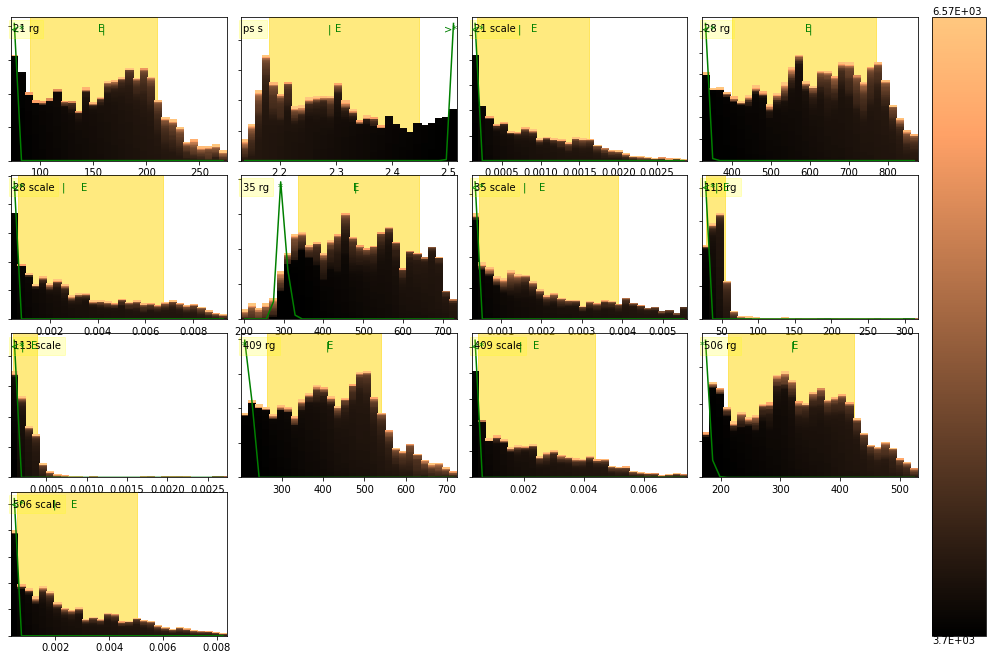

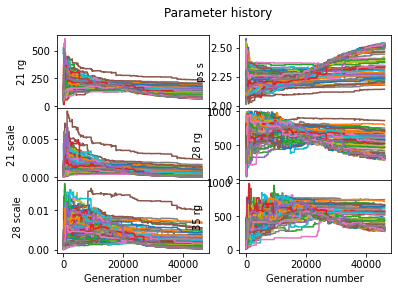

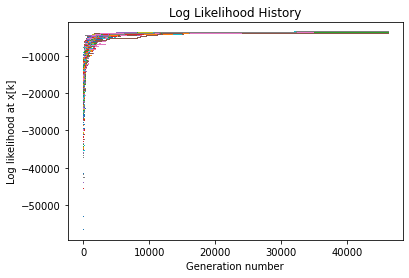

In [28]:
kernel=load_model("guinier_porod")

s = Parameter(2.5, name = 'ps s')
porod_exp = Parameter(ps_porod_exp, name = 'ps porod_exp')
temp_scales = {}

exp_list = []

for key in ps_keys:

    # loading the data
    sans = sans_data[key][1]
    usans = sans_data[key][0]
    
    if usans is not None:
    
        # initial parameter values
        scale = Parameter(ps_scales[key], name= str(key) + ' scale')
        background = Parameter(ps_backgrounds[key], name = str(key) + ' background')
        rg = Parameter(temp_rgs[key], name = str(key) + ' rg')
        
        temp_scales[key] = scale
        
        # setting up the power_law model for fitting
        sans_model = Model(kernel, scale=scale, background=background,  porod_exp=porod_exp, s=s, rg=rg)
        usans_model = Model(kernel, scale=scale, background=background,  porod_exp=porod_exp, s=s, rg=rg)

        # setting parameter ranges as needed
        sans_model.scale.range(0,1)
        sans_model.s.range(2,3)
        sans_model.rg.range(0,1000)
        
        usans_model.scale.range(0,1)
        usans_model.s.range(2,3)
        usans_model.rg.range(0,1000)

        sans_experiment=Experiment(data=sans, model=sans_model)
        usans_experiment=Experiment(data=usans, model=usans_model)
        
        usans_smearing = sasmodels.resolution.Slit1D(usans.x, 0.117)
        usans_experiment.resolution = usans_smearing
    
        experiment = [sans_experiment, usans_experiment]
        
        exp_list.extend(experiment)

problem=FitProblem(exp_list)
result=fit(problem,method='dream', samples=6e6, verbose=True)
#result.state.show(figfile='../data/sans/PS_Fitting/ps_fit_results/guinier_porod_s_scale/PS_s_scale')
plt.close()
#result=fit(problem,method='lm', verbose=True)


In [18]:
for key, value in temp_scales.items():
    ps_scales[key] = value.value

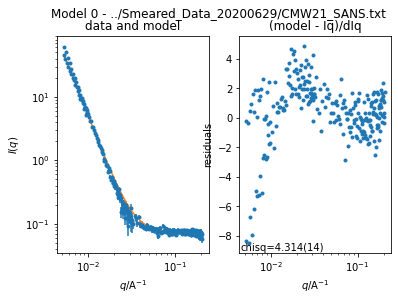

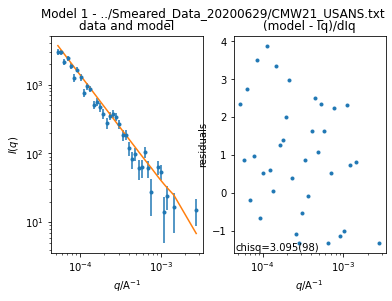

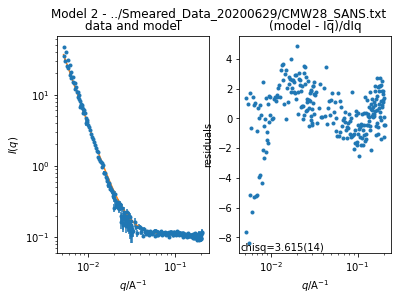

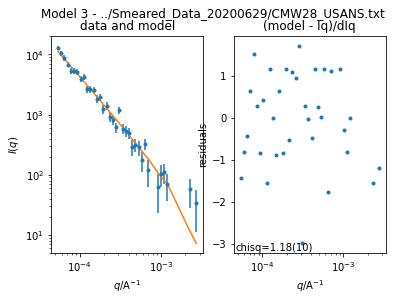

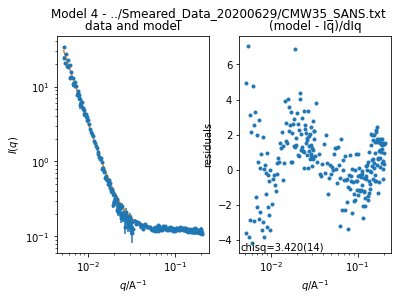

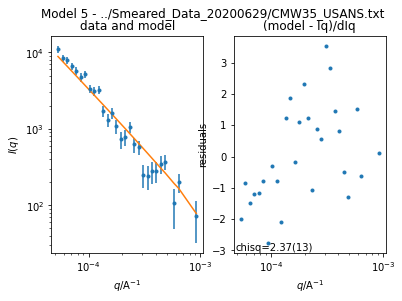

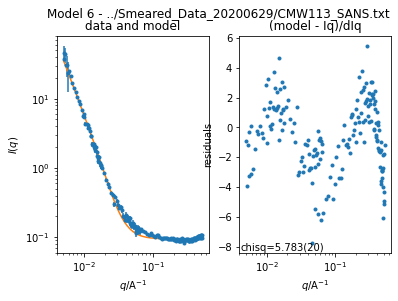

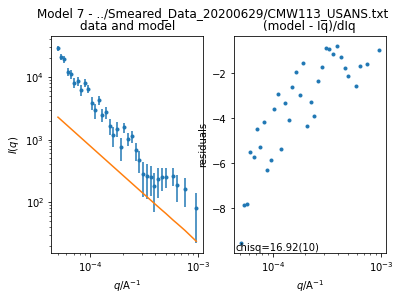

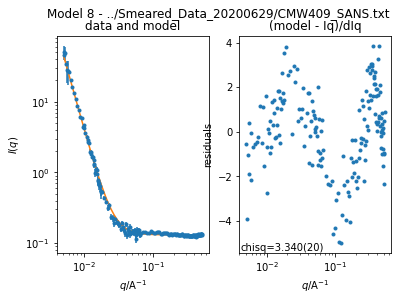

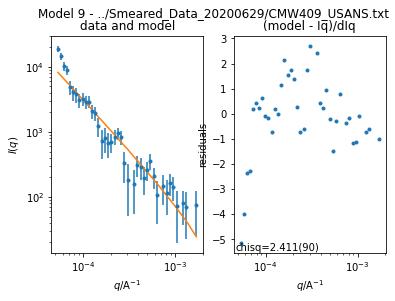

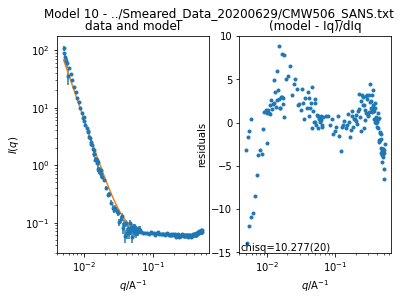

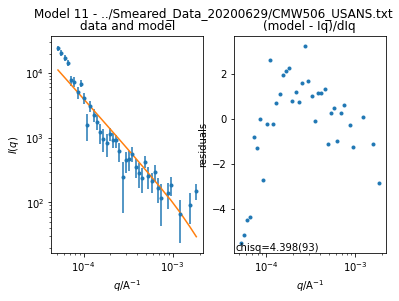

In [19]:
problem.plot()

In [20]:
ps_s = s.value
ps_s

2.5478719438863675

In [21]:
ps_scales

{21: 8.839301102613223e-05,
 28: 0.0002742909009649249,
 35: 0.00021364798241645488,
 113: 4.9943587878746266e-05,
 114: 5.352586241417386e-07,
 309: 4.0279338031398564e-07,
 310: 3.3001841354027536e-07,
 409: 0.00019888937037492233,
 506: 0.00025421991528644107}

In [23]:
ps_backgrounds

{21: 0.0723258348447717,
 28: 0.10801638709035005,
 35: 0.12203061534330917,
 113: 0.09466516703979709,
 114: 0.08035943800060784,
 309: 0.11569254091216376,
 310: 0.12491045479023981,
 409: 0.13074153185909693,
 506: 0.06192500321747012}

In [24]:
ps_porod_exp

3.5

In [25]:
ps_rgs = {}

rg_list = []
for final_model in problem.models:
    rg_list.append(final_model.fitness.model.state()['rg'])
rg_list = np.array(rg_list)[np.arange(0,int(len(rg_list)/2))*2]
    
i = 0
for key in ps_keys:
    
    ps_rgs[key] = None

    # loading the data
    usans = sans_data[key][0]
    
    if usans is not None: 
        ps_rgs[key] = rg_list[i]
        i += 1

In [26]:
ps_rgs

{21: 65.6086407180472,
 28: 294.9169766688777,
 35: 274.719466864087,
 113: 21.31747207757813,
 114: None,
 309: None,
 310: None,
 409: 190.51665390095292,
 506: 158.52837240810595}